1. Exploring Data
2. Data Cleaning
3. EDA
4. Data Modeling
5. Model Evaluation
6. Summary

### 1. Exploring Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# Other sklearn packages
import sklearn.metrics as metrics
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

## Libraries for KMeans clustering ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.svm import SVC


In [2]:
#Looking into the Dataset

telecom_df = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c43/train.csv')

telecom_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [3]:
#Observing number of rows and columns
telecom_df.shape

(69999, 172)

In [4]:
#Lets check how the data is distributed
telecom_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

### 2. Data Cleaning

In [5]:
# Converting the date columns to date time-dataframe

date_column= [column for column in telecom_df.columns if 'date' in column]

for i in telecom_df[date_column]:
    telecom_df[i] = pd.to_datetime(telecom_df[i])


In [6]:
# While all other columns have utilised the integers "6,7,8,9" to indicate month name, certain columns representing volume-based users have month specified in their names.
alphabetic_month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']
telecom_df = telecom_df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6'})

Columns with a single unique value for each client have no practical meaning. Consequently, we eliminated columns with 0 variance from our dataset.

In [7]:
# Dropping columns with unique values.
columns = []
for i in telecom_df.columns:
    if telecom_df[i].nunique() ==1:
        columns.append(i)
telecom_df = telecom_df.drop(columns,1)
telecom_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [8]:
telecom_df.shape

(69999, 159)

Let's see whether our dataset has any category columns. We may verify it by identifying any columns that only contain the numbers 1 and 0.

In [9]:
# Let us create a seperate category for categorical columns
categorical_columns = []

for i in telecom_df.columns:
    if telecom_df[i].nunique()==2:
        categorical_columns.append(i)
categorical_columns 

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

### 3. Deriving New Features

In [10]:
#Deriving a new column which will be a combination of 2 existing columns

telecom_df['total_data_rech_6'] = telecom_df['av_rech_amt_data_6']* telecom_df['total_rech_data_6']
telecom_df['total_data_rech_7'] = telecom_df['av_rech_amt_data_7']* telecom_df['total_rech_data_7']
telecom_df['total_data_rech_8'] = telecom_df['av_rech_amt_data_8']* telecom_df['total_rech_data_8']


#### Total recharge amount spent historically

In [11]:
telecom_df['total_amt_6'] = telecom_df[['total_rech_amt_6', 'total_data_rech_6']].sum(axis=1)
telecom_df['total_amt_7'] = telecom_df[['total_rech_amt_7', 'total_data_rech_7']].sum(axis=1)
telecom_df['total_amt_8'] = telecom_df[['total_rech_amt_8', 'total_data_rech_8']].sum(axis=1)

#### Defining total average recharge amount for the historic data

In [12]:
telecom_df['rech_amt_good_yr'] = telecom_df[['total_amt_6', 'total_amt_7']].sum(axis=1)
telecom_df['avg_rech_amt_good_yr'] = round(telecom_df['rech_amt_good_yr']/2,2)

In [13]:
telecom_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [14]:
percentage = telecom_df['avg_rech_amt_good_yr'].dropna().quantile(0.7)
percentage

477.5

In [15]:
# Segregating high value customers
high_val_customers = telecom_df.loc[telecom_df['avg_rech_amt_good_yr'] >= percentage]
high_val_customers.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
4    4   240.708  128.191  101.565        21.28         4.83         6.13   
15  15   580.549  377.294  338.286        10.43        24.99       194.43   
23  23  1130.948  905.506  479.762       859.53       372.71         0.89   
24  24   371.974  352.069  240.449        93.18        38.29        29.86   
27  27   390.489  350.985  421.300         8.58        11.48        12.68   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4          56.99         38.11          9.63          53.64            0.0   
15        317.11        341.79        197.09           0.00            0.0   
23        293.46        450.11        386.91           0.00            0.0   
24        531.19        507.76        222.03           0.00            0.0   
27        133.16        158.73        182.83           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4             0.0          15.73            0.0            0.0   
15            0.0           0.00            0.0            0.0   
23            0.0           0.00            0.0            0.0   
24            0.0           0.00            0.0            0.0   
27            0.0           0.00            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4              10.16              4.83              6.13             36.74   
15             10.43             24.99            194.43            313.76   
23            859.53            372.71              0.89             79.79   
24             93.18             38.29             29.86            159.29   
27              8.58             11.48             12.68             96.91   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4              19.88              4.61             11.99              1.23   
15            330.88            185.88              3.26             10.91   
23            424.63            378.01             11.58             25.43   
24            219.44             99.86              0.00              0.00   
27            149.44            157.23             33.71              9.28   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
4               5.01               0.0              9.85              0.00   
15              4.94               0.0              0.00              0.00   
23              8.88               0.0              0.00              0.00   
24              0.00               0.0              0.00              0.36   
27             25.59               0.0              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
4          58.91         25.94         15.76               0.0   
15        327.46        366.79        385.26               0.0   
23        950.91        822.78        387.79               0.0   
24        252.48        257.74        129.73               0.0   
27        139.21        170.21        195.51               0.0   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
4                0.0               0.0              4.35              0.00   
15               0.0               0.0              0.00              0.00   
23               0.0               0.0            202.08              0.00   
24               0.0               0.0            371.89            288.31   
27               0.0               0.0              2.53              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
4               0.00               0.0               0.0              0.00   
15              0.00               0.0               0.0              6.26   
23              0.00               0.0               0.0              0.00   
24            121.79               0.0               0.0              0.00   
27          

In [16]:
del_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8"]

high_val_customers = high_val_customers.drop(del_col,1)

## We can also drop the the average recharge amount of the good phase
high_val_customers = high_val_customers.drop('avg_rech_amt_good_yr',1) 

In [17]:
high_val_customers.shape

(21013, 160)

#### **Assigning 0's and 1's and Creating Target Variable** 

In the churn phase, those who have not placed any calls (incoming or outgoing) OR accessed mobile internet even once.


In [18]:
# let us filter churned customers based on the third month

high_val_customers['churn'] = high_val_customers.apply(lambda x: 1 if (x.total_ic_mou_8 == 0 and x.total_og_mou_8 == 0 and x.vol_2g_mb_8 ==0 and x.vol_3g_mb_8==0) else 0, axis=1)
high_val_customers['churn'] = high_val_customers['churn'].astype("str")
high_val_customers.shape

(21013, 161)

In [19]:
# Let us see the number of churned customer
# 0 - Non_Churned and 1 - Churned Customers

high_val_customers['churn'].value_counts()

0    19893
1     1120
Name: churn, dtype: int64

In [20]:

print("The Percentage of churned customers is:" , round(100*(high_val_customers.churn.astype("int").sum()/len(high_val_customers)),2))

The Percentage of churned customers is: 5.33


After tagging churners, let us remove all the attributes corresponding to the churn phase (all attributes having ‘ _8’, etc. in their names)

In [21]:
columns_8 = [i for i in high_val_customers.columns if '8' in i]
high_val_customers = high_val_customers.drop(columns_8,1)
high_val_customers.shape

(21013, 109)

In [22]:
# let us update our categorical column list

categorical_columns = [ele for ele in categorical_columns if ele not in columns_8]


In [23]:
#Convert AON to Months
high_val_customers['aon_yr'] = round((high_val_customers['aon']/365),1)

In [24]:
high_val_customers.drop('aon', axis=1, inplace=True)
high_val_customers.head()

id    arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
4    4   240.708  128.191        21.28         4.83         56.99   
15  15   580.549  377.294        10.43        24.99        317.11   
23  23  1130.948  905.506       859.53       372.71        293.46   
24  24   371.974  352.069        93.18        38.29        531.19   
27  27   390.489  350.985         8.58        11.48        133.16   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4          38.11          53.64            0.0          15.73            0.0   
15        341.79           0.00            0.0           0.00            0.0   
23        450.11           0.00            0.0           0.00            0.0   
24        507.76           0.00            0.0           0.00            0.0   
27        158.73           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16              4.83             36.74             19.88   
15             10.43             24.99            313.76            330.88   
23            859.53            372.71             79.79            424.63   
24             93.18             38.29            159.29            219.44   
27              8.58             11.48             96.91            149.44   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4              11.99              1.23               0.0              9.85   
15              3.26             10.91               0.0              0.00   
23             11.58             25.43               0.0              0.00   
24              0.00              0.00               0.0              0.00   
27             33.71              9.28               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94               0.0               0.0   
15        327.46        366.79               0.0               0.0   
23        950.91        822.78               0.0               0.0   
24        252.48        257.74               0.0               0.0   
27        139.21        170.21               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
15              0.00              0.00               0.0               0.0   
23            202.08              0.00               0.0               0.0   
24            371.89            288.31               0.0               0.0   
27              2.53              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  \
4           4.35          0.00           0.0           0.0          0.00   
15          0.00          0.00           0.0           0.0          0.08   
23        202.08          0.00           0.0           0.0          0.00   
24        371.89        288.31           0.0           0.0          0.00   
27          2.53          0.00           0.0           0.0          0.00   

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4          17.00          0.0          0.0           63.26           42.94   
15          0.00          0.1          0.0          327.64          366.79   
23          0.05          0.0          0.0         1152.99          822.83   
24          0.00          0.0          0.0          624.38          546.06   
27          0.00          0.0          0.0          141.74          170.21   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4               5.44              1.39             10.58              4.33   
15             13.86             20.18            219.31            754.24   
23            233.28            117.63            123.78            278.49   
24             52.49             37.84    

Lets create bins for our customers based on the number of years they are with network.

In [25]:
age_range = [ 0,  2,  4,  6,  8, 10, 12]
age_bin = [ 1, 2, 3, 4, 5, 6]
high_val_customers['age_group'] = pd.cut(high_val_customers['aon_yr'], age_range, labels=age_bin)
high_val_customers['age_group'] = high_val_customers['age_group'].astype(str)
high_val_customers['age_group'].head()

4     1
15    1
23    1
24    2
27    1
Name: age_group, dtype: object

In [26]:
# let us append our age group column to categorical column list

categorical_columns.append('age_group')
categorical_columns

['night_pck_user_6',
 'night_pck_user_7',
 'fb_user_6',
 'fb_user_7',
 'churn_probability',
 'age_group']

####  Handling Missing values

a) Checking missing values

In [27]:
# Now Checking Null values
null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

fb_user_6                   44.39
max_rech_data_6             44.39
night_pck_user_6            44.39
arpu_2g_6                   44.39
total_data_rech_6           44.39
arpu_3g_6                   44.39
count_rech_3g_6             44.39
date_of_last_rech_data_6    44.39
count_rech_2g_6             44.39
total_data_rech_7           43.28
fb_user_7                   43.28
date_of_last_rech_data_7    43.28
night_pck_user_7            43.28
max_rech_data_7             43.28
count_rech_3g_7             43.28
arpu_3g_7                   43.28
arpu_2g_7                   43.28
count_rech_2g_7             43.28
std_ic_t2t_mou_6             1.89
loc_ic_t2t_mou_6             1.89
loc_ic_t2m_mou_6             1.89
loc_ic_t2f_mou_6             1.89
loc_ic_mou_6                 1.89
std_ic_mou_6                 1.89
std_ic_t2m_mou_6             1.89
std_ic_t2f_mou_6             1.89
isd_ic_mou_6                 1.89
ic_others_6                  1.89
spl_og_mou_6                 1.89
og_others_6   

Imputation of missing values

In [28]:
# Let us observe missing values in recharge columns 
rech_col = [i for i in high_val_customers.columns if 'rech' in i]
rech_6_col = [i for i in rech_col if '6' in i]
rech_7_col = [i for i in rech_col if '7' in i]


Recharge columns for month- 6(June)

In [29]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_6 = pd.DataFrame(high_val_customers[rech_6_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = high_val_customers[["vol_2g_mb_6",'vol_3g_mb_6']]

rech_6 = pd.concat([rech_6,vol_col], axis = 1) 
rech_6.head(10)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
4                 13               290              50          2014-06-25   
15                 5               654             250          2014-06-27   
23                26              1420             110          2014-06-30   
24                 7               440             110          2014-06-24   
27                13               565             154          2014-06-29   
33                 1               505             505          2014-06-08   
39                 4               448             154          2014-06-29   
45                24              1768             150          2014-06-30   
49                24               446              50          2014-06-30   
52                10               504             128          2014-06-30   

   date_of_last_rech_data_6  max_rech_data_6  count_rech_2g_6  \
4                2014-06-25             25.0              7.0   
15               2014-06-16            154.0              1.0   
23                      NaT              NaN              NaN   
24               2014-06-19             23.0              1.0   
27               2014-06-17            154.0              4.0   
33               2014-06-08            505.0              0.0   
39               2014-06-27            154.0              2.0   
45               2014-06-22             41.0              0.0   
49                      NaT              NaN              NaN   
52                      NaT              NaN              NaN   

    count_rech_3g_6  total_data_rech_6  vol_2g_mb_6  vol_3g_mb_6  
4               0.0             1225.0       390.80         0.00  
15              0.0              154.0       260.42         0.00  
23              NaN                NaN         0.00         0.00  
24              0.0               23.0         0.04         0.00  
27              0.0              820.0         5.99       374.70  
33              1.0              505.0         0.00       756.47  
39              0.0              616.0      1884.40         0.00  
45              3.0              369.0        54.48       308.49  
49              NaN                NaN         0.00         0.00  
52              NaN                NaN         0.00         0.00

As shown in the above table, anytime the date of the most recent recharge is absent, the values for max rech, count rech 2g, and 3g are also all missing. The preceding table shows that there is no mobile internet consumption (2G or 3G data) associated with these numbers. Let's therefore assume that the consumer did not perform any recharges and replace these missing numbers with zero.

`Recharge columns for month- 7(July)`

In [30]:
# Similarly Let's look at the July missing data in the recharge columns (7)

rech_7_col

['total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'total_data_rech_7']

In [31]:
rech_7 = pd.DataFrame( high_val_customers[rech_7_col])

# adding some other columns describing data usage of customer in july
vol_col =  high_val_customers[["vol_2g_mb_7",'vol_3g_mb_7']]

rech_7 = pd.concat([rech_7,vol_col], axis = 1) 
rech_7.head(10)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7  \
4                 10               136              41          2014-07-26   
15                 3               400             250          2014-07-25   
23                19               990             110          2014-07-31   
24                 7               427             110          2014-07-25   
27                 8               572             200          2014-07-20   
33                 3                 0               0          2014-07-27   
39                14               716             154          2014-07-29   
45                29              2076             250          2014-07-30   
49                50               776              36          2014-07-31   
52                11               506             120          2014-07-26   

   date_of_last_rech_data_7  max_rech_data_7  count_rech_2g_7  \
4                2014-07-23             41.0              6.0   
15                      NaT              NaN              NaN   
23                      NaT              NaN              NaN   
24               2014-07-25             23.0              2.0   
27               2014-07-17            152.0              1.0   
33                      NaT              NaN              NaN   
39               2014-07-12            154.0              1.0   
45               2014-07-28             46.0              1.0   
49                      NaT              NaN              NaN   
52                      NaT              NaN              NaN   

    count_rech_3g_7  total_data_rech_7  vol_2g_mb_7  vol_3g_mb_7  
4               1.0             1337.0       308.89         0.00  
15              NaN                NaN         0.00         0.00  
23              NaN                NaN         0.00         0.00  
24              0.0               92.0         0.00         0.00  
27              1.0              608.0        92.93       275.38  
33              NaN                NaN         0.00         0.00  
39              0.0              154.0      1312.21         0.00  
45              4.0             1050.0       106.61       478.02  
49              NaN                NaN         0.00         0.00  
52              NaN                NaN         0.00         0.00

The numbers for the maximum recharge, count recharge, and recharge amounts of 2g and 3g are all lacking if the date of the most recent recharge is missing, as indicated in the table above. The chart above demonstrates that these figures do not include any usage of mobile internet (2G or 3G data). Since the customer hasn't recharged, let's replace these missing numbers with 0. This is consistent with the pattern that was evident throughout June.

In [32]:
## Let's replace the empty values in these recharge columns with zeros.

impute_0 = [ 'date_of_last_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','total_data_rech_6',
           'date_of_last_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','total_data_rech_7']

high_val_customers[impute_0] =  high_val_customers[impute_0].apply(lambda x: x.fillna(0))

In [33]:
# Now Checking Null values
null = round(100*( high_val_customers.isnull().sum()/len( high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

arpu_3g_6              44.39
arpu_2g_6              44.39
night_pck_user_6       44.39
fb_user_6              44.39
arpu_3g_7              43.28
arpu_2g_7              43.28
night_pck_user_7       43.28
fb_user_7              43.28
std_og_mou_6            1.89
isd_og_mou_6            1.89
spl_og_mou_6            1.89
og_others_6             1.89
loc_ic_t2t_mou_6        1.89
loc_ic_t2m_mou_6        1.89
std_ic_t2f_mou_6        1.89
loc_ic_mou_6            1.89
std_ic_t2t_mou_6        1.89
std_ic_t2m_mou_6        1.89
std_og_t2m_mou_6        1.89
std_ic_mou_6            1.89
isd_ic_mou_6            1.89
ic_others_6             1.89
std_og_t2f_mou_6        1.89
spl_ic_mou_6            1.89
loc_ic_t2f_mou_6        1.89
onnet_mou_6             1.89
std_og_t2t_mou_6        1.89
loc_og_t2m_mou_6        1.89
offnet_mou_6            1.89
loc_og_t2t_mou_6        1.89
loc_og_mou_6            1.89
roam_ic_mou_6           1.89
loc_og_t2f_mou_6        1.89
roam_og_mou_6           1.89
loc_og_t2c_mou

- Imputing Categorical columns

In [34]:
# Let us impute the missing values in categorical columns by (-1). 
high_val_customers[categorical_columns] =  high_val_customers[categorical_columns].apply(lambda x: x.fillna(-1)) 
high_val_customers[categorical_columns] =  high_val_customers[categorical_columns].astype('str')
high_val_customers[categorical_columns].head()

night_pck_user_6 night_pck_user_7 fb_user_6 fb_user_7 churn_probability  \
4               0.0              0.0       1.0       1.0                 0   
15              0.0             -1.0       1.0      -1.0                 0   
23             -1.0             -1.0      -1.0      -1.0                 0   
24              0.0              0.0       0.0       0.0                 0   
27              0.0              0.0       1.0       1.0                 0   

   age_group  
4          1  
15         1  
23         1  
24         2  
27         1

In [35]:
# Now Checking Null values
null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

arpu_3g_6              44.39
arpu_2g_6              44.39
arpu_3g_7              43.28
arpu_2g_7              43.28
std_og_t2f_mou_6        1.89
std_og_mou_6            1.89
isd_og_mou_6            1.89
spl_og_mou_6            1.89
og_others_6             1.89
loc_ic_t2t_mou_6        1.89
loc_ic_t2m_mou_6        1.89
loc_ic_mou_6            1.89
std_og_t2t_mou_6        1.89
std_ic_t2t_mou_6        1.89
std_ic_t2m_mou_6        1.89
std_ic_t2f_mou_6        1.89
std_ic_mou_6            1.89
isd_ic_mou_6            1.89
ic_others_6             1.89
std_og_t2m_mou_6        1.89
spl_ic_mou_6            1.89
loc_ic_t2f_mou_6        1.89
roam_ic_mou_6           1.89
loc_og_mou_6            1.89
onnet_mou_6             1.89
loc_og_t2t_mou_6        1.89
roam_og_mou_6           1.89
loc_og_t2c_mou_6        1.89
offnet_mou_6            1.89
loc_og_t2f_mou_6        1.89
loc_og_t2m_mou_6        1.89
std_ic_t2t_mou_7        1.87
roam_ic_mou_7           1.87
std_ic_t2m_mou_7        1.87
std_ic_mou_7  

Columns with more than 40% of their values missing should be removed

In both the good and action phases, more than 40% of the data for the average revenue per user is missing. The focus of our research is on identifying customers who are likely to churn by only taking usage-based churn into account, thus we can safely eliminate these columns without having any harmful consequences on our study.

In [36]:
miss = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False) 

# Let us not delete data from 8th month
miss = pd.DataFrame(miss[miss >= 40])
threshold_col = miss.index

high_val_customers = high_val_customers.drop(threshold_col,1)

In [37]:
high_val_customers.shape

(21013, 106)

Let's track the number of minutes used for local, standard, special, and other purposes.

Month-june(6)`

In [38]:
# Based on our knowledge of the business domain, we are aware that the total outgoing column represents the entire number of outgoing calls, including local, standard, special,  other calls.
og_call_6 = ['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6']
total_og_6 = high_val_customers[og_call_6]
# filtering only those clients who have made no outgoing calls
total_og_6.loc[total_og_6['total_og_mou_6']==0].head()

loc_og_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  \
33            NaN           NaN           NaN           NaN          NaN   
78            0.0           0.0           0.0           0.0          0.0   
137           0.0           0.0           0.0           0.0          0.0   
158           0.0           0.0           0.0           0.0          0.0   
208           0.0           0.0           0.0           0.0          0.0   

     total_og_mou_6  
33              0.0  
78              0.0  
137             0.0  
158             0.0  
208             0.0

As a result, we may infer from the business domain knowledge and the table above that if the number of outgoing calls is 0 for a given month, no outbound calls have been made. We may add 0 to the columns of local outgoing calls, regular outgoing calls, special outgoing calls, and other outgoing calls to fill in the missing data.

In [39]:
#Let's check to see if our assumption is correct by comparing the sum of all incoming calls to the number tota og mou 6.

telecom_df['outgoing_total_6'] = telecom_df['loc_og_mou_6']+ telecom_df['std_og_mou_6']+telecom_df['isd_og_mou_6']+telecom_df['spl_og_mou_6']+telecom_df['og_others_6']
telecom_df[['outgoing_total_6','total_og_mou_6']].dropna().corr()

outgoing_total_6  total_og_mou_6
outgoing_total_6               1.0             1.0
total_og_mou_6                 1.0             1.0

As you can see from the chart above, these two factors are interrelated; as a result, if the number of outgoing calls is 0 for a given month, no outbound calls have been made. Local outgoing calls, regular outgoing calls, special outgoing calls, and other outgoing calls all have missing values that can be imputed by 0.

In [40]:
# Imputing by '0'
high_val_customers[og_call_6] = high_val_customers[og_call_6].fillna(0)

From the dataset, it is evident that local outgoing calls in any month are equal to the sum of all the types of local outgoing calls i.e. (T2T,T2M,T2F & T2C)

In [41]:
og_loc_6 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6']
loc_og_6 = high_val_customers[og_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_og_6.loc[loc_og_6 ['loc_og_mou_6']==0].head()

loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
33                NaN               NaN               NaN               NaN   
78                0.0               0.0               0.0             35.88   
137               0.0               0.0               0.0              0.00   
158               0.0               0.0               0.0              3.80   
208               0.0               0.0               0.0              0.00   

     loc_og_mou_6  
33            0.0  
78            0.0  
137           0.0  
158           0.0  
208           0.0

If there were no T2T, T2M, T2F, or T2C local calls made in any given month, the total number of local outgoing calls was zero. We can enter "0" in place of the missing values that correspond to them.

In [42]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_6"

telecom_df['loc_outgoing_total_6'] = telecom_df['loc_og_t2t_mou_6']+ telecom_df['loc_og_t2m_mou_6']+telecom_df['loc_og_t2f_mou_6']+telecom_df['loc_og_t2c_mou_6']
telecom_df[['loc_outgoing_total_6','loc_og_mou_6']].dropna().corr().round()

loc_outgoing_total_6  loc_og_mou_6
loc_outgoing_total_6                   1.0           1.0
loc_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [43]:
# Imputing by '0'
high_val_customers[og_loc_6] = high_val_customers[og_loc_6].fillna(0)

From the dataset, it is evident that std outgoing calls in any month are equal to the sum of all the types of std outgoing calls i.e. (T2T,T2M,T2F & T2C)

In [44]:
og_std_6 = ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']
std_og_6 = high_val_customers[og_std_6]
std_og_6.head()

std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6
4                0.0              4.35               0.0          4.35
15               0.0              0.00               0.0          0.00
23               0.0            202.08               0.0        202.08
24               0.0            371.89               0.0        371.89
27               0.0              2.53               0.0          2.53

If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [45]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_6"

telecom_df['std_outgoing_total_6'] = telecom_df['std_og_t2t_mou_6']+ telecom_df['std_og_t2m_mou_6']+telecom_df['std_og_t2f_mou_6']
telecom_df[['std_outgoing_total_6','std_og_mou_6']].dropna().corr().round()

std_outgoing_total_6  std_og_mou_6
std_outgoing_total_6                   1.0           1.0
std_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [46]:
# Imputing by '0'
high_val_customers[og_std_6] = high_val_customers[og_std_6].fillna(0)

month-july(7)

In [47]:
#We know that the total_og column is the addition of local, standard, special, and other outgoing calls from our knowledge of the business domain.
og_call_7 = ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7']
total_og_7 = high_val_customers[og_call_7]
# filtering only those clients who have made no outgoing calls
total_og_7.loc[total_og_7['total_og_mou_7']==0].head()

loc_og_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
33            NaN           NaN           NaN           NaN          NaN   
54            NaN           NaN           NaN           NaN          NaN   
230           NaN           NaN           NaN           NaN          NaN   
284           0.0           0.0           0.0           0.0          0.0   
313           0.0           0.0           0.0           0.0          0.0   

     total_og_mou_7  
33              0.0  
54              0.0  
230             0.0  
284             0.0  
313             0.0

As a result, we may conclude from the preceding table and the understanding of the business area that if the number of outgoing calls is zero, then there have been no outgoing calls made throughout the month. The missing values in the columns for local outgoing calls, common outgoing calls, unique outgoing calls, and other outgoing calls can be imputed by 0.

In [48]:
#Let's check to see if our assumption is correct by comparing the tota_og_mou_7 to the sum of all incoming calls.
telecom_df['outgoing_total_7'] = telecom_df['loc_og_mou_7']+ telecom_df['std_og_mou_7']+telecom_df['isd_og_mou_7']+telecom_df['spl_og_mou_7']+telecom_df['og_others_7']
telecom_df[['outgoing_total_7','total_og_mou_7']].dropna().corr()

outgoing_total_7  total_og_mou_7
outgoing_total_7               1.0             1.0
total_og_mou_7                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by 0.

In [49]:
# Imputing by '0'
high_val_customers[og_call_7] = high_val_customers[og_call_7].fillna(0)

From the dataset, it is evident that local outgoing calls in any month are equal to the sum of all the types of local outgoing calls i.e. (T2T,T2M,T2F & T2C)

In [50]:
og_loc_7 = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7']
loc_og_7 = high_val_customers[og_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_og_7.loc[loc_og_7 ['loc_og_mou_7']==0].head()

loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  \
33                NaN               NaN               NaN               NaN   
54                NaN               NaN               NaN               NaN   
230               NaN               NaN               NaN               NaN   
265               0.0               0.0               0.0              0.13   
284               0.0               0.0               0.0              0.00   

     loc_og_mou_7  
33            0.0  
54            0.0  
230           0.0  
265           0.0  
284           0.0

If the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [51]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_7"

telecom_df['loc_outgoing_total_7'] = telecom_df['loc_og_t2t_mou_7']+ telecom_df['loc_og_t2m_mou_7']+telecom_df['loc_og_t2f_mou_7']+telecom_df['loc_og_t2c_mou_7']
telecom_df[['loc_outgoing_total_7','loc_og_mou_7']].dropna().corr().round()

loc_outgoing_total_7  loc_og_mou_7
loc_outgoing_total_7                   1.0           1.0
loc_og_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [52]:
# Imputing by '0'
high_val_customers[og_loc_7] = high_val_customers[og_loc_7].fillna(0)

From the dataset, it is evident that std outgoing calls in any month are equal to the sum of all the types of std outgoing calls i.e. (T2T,T2M,T2F & T2C)

In [53]:
og_std_7 = ['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7']
std_og_7 = high_val_customers[og_std_7]
std_og_7.head()

std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  std_og_mou_7
4                0.0              0.00               0.0          0.00
15               0.0              0.00               0.0          0.00
23               0.0              0.00               0.0          0.00
24               0.0            288.31               0.0        288.31
27               0.0              0.00               0.0          0.00

If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [54]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_7"

telecom_df['std_outgoing_total_7'] = telecom_df['std_og_t2t_mou_7']+ telecom_df['std_og_t2m_mou_7']+telecom_df['std_og_t2f_mou_7']
telecom_df[['std_outgoing_total_7','std_og_mou_7']].dropna().corr()

std_outgoing_total_7  std_og_mou_7
std_outgoing_total_7                   1.0           1.0
std_og_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [55]:
# Imputing by '0'
high_val_customers[og_std_7] = high_val_customers[og_std_7].fillna(0)

- Let's monitor incoming usage minutes for local, standard, special, and other services.

`month-june(6)`

In [56]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6']
total_ic_6 = high_val_customers[ic_call_6]
# filtering only those clients who have made no outgoing calls
total_ic_6 .loc[total_ic_6 ['total_ic_mou_6']==0].head()

loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  spl_ic_mou_6  ic_others_6  \
33            NaN           NaN           NaN           NaN          NaN   
78            0.0           0.0           0.0           0.0          0.0   
208           0.0           0.0           0.0           0.0          0.0   
230           NaN           NaN           NaN           NaN          NaN   
348           0.0           0.0           0.0           0.0          0.0   

     total_ic_mou_6  
33              0.0  
78              0.0  
208             0.0  
230             0.0  
348             0.0

As a result, we may infer from the preceding table and the business domain information that if the number of incoming calls is zero, then no incoming calls were received during that month. In the columns for local incoming calls, regular incoming calls, special incoming calls, and other incoming calls, we can impute the missing values by 0.

In [57]:
#Let's check to see whether our assumption is correct; the total of all incoming calls equals the tota ic mou 6.

telecom_df['incoming_total_6'] = telecom_df['loc_ic_mou_6']+ telecom_df['std_ic_mou_6']+ telecom_df['isd_ic_mou_6']+telecom_df['spl_ic_mou_6']+ telecom_df['ic_others_6']
telecom_df[['incoming_total_6','total_ic_mou_6']].dropna().corr()

incoming_total_6  total_ic_mou_6
incoming_total_6               1.0             1.0
total_ic_mou_6                 1.0             1.0

Since these are correlated, as is evident from the graph above, when the sum of incoming calls is zero, no outgoing calls have occurred in that month. We can add 0 to the columns for local outgoing calls, typical outgoing calls, special incoming calls, and other outgoing calls to fill in the missing values.

From the dataset, it is evident that local incoming calls in any month are equal to the sum of all the types of local incoming calls i.e. (T2T,T2M,T2F & T2C)

In [58]:
ic_loc_6 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']
loc_ic_6= high_val_customers[ic_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_ic_6.loc[loc_ic_6['loc_ic_mou_6']==0].head()

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6
78                0.0               0.0               0.0           0.0
208               0.0               0.0               0.0           0.0
285               0.0               0.0               0.0           0.0
348               0.0               0.0               0.0           0.0
464               0.0               0.0               0.0           0.0

If the total local incomingcalls made in any month are zero, then it means that no type of local calls were recieved i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [59]:
#Let's check to see if our assumption is correct: the sum of all local outgoing calls equals the total number of outgoing local calls.
#"loc_ic_mou_6"

telecom_df['loc_incoming_total_6'] = telecom_df['loc_ic_t2t_mou_6']+ telecom_df['loc_ic_t2m_mou_6']+telecom_df['loc_ic_t2f_mou_6']
telecom_df[['loc_incoming_total_6','loc_ic_mou_6']].dropna().corr()

loc_incoming_total_6  loc_ic_mou_6
loc_incoming_total_6                   1.0           1.0
loc_ic_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [60]:
# Imputing by '0'
high_val_customers[ic_loc_6] = high_val_customers[ic_loc_6].fillna(0)

From the dataset, it is evident that std incoming calls in any month are equal to the sum of all the types of std incoming calls i.e. (T2T,T2M,T2F & T2C)

In [61]:
ic_std_6 = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']
std_ic_6 = high_val_customers[ic_std_6]
std_ic_6.head()

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6
4                0.0              0.00              0.00          0.00
15               0.0              0.00              0.00          0.00
23               0.0            207.03              0.00        207.03
24               0.0              6.96              0.00          6.96
27               0.0              0.00             15.43         15.43

If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [62]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_ic_mou_6"

telecom_df['std_incoming_total_6'] = telecom_df['std_ic_t2t_mou_6']+ telecom_df['std_ic_t2m_mou_6']+telecom_df['std_ic_t2f_mou_6']
telecom_df[['std_incoming_total_6','std_ic_mou_6']].dropna().corr()

std_incoming_total_6  std_ic_mou_6
std_incoming_total_6                   1.0           1.0
std_ic_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [63]:
# Imputing by '0'
high_val_customers[ic_std_6] = high_val_customers[ic_std_6].fillna(0)

`month-july(7)`

In [64]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7']
total_ic_7 = high_val_customers[ic_call_7]
# filtering only those clients who have made no outgoing calls
total_ic_7 .loc[total_ic_7 ['total_ic_mou_7']==0].head()

loc_ic_mou_7  std_ic_mou_7  isd_ic_mou_7  spl_ic_mou_7  ic_others_7  \
33            NaN           NaN           NaN           NaN          NaN   
54            NaN           NaN           NaN           NaN          NaN   
230           NaN           NaN           NaN           NaN          NaN   
265           0.0           0.0           0.0           0.0          0.0   
466           NaN           NaN           NaN           NaN          NaN   

     total_ic_mou_7  
33              0.0  
54              0.0  
230             0.0  
265             0.0  
466             0.0

The preceding data and the business domain information allow us to deduce that no incoming calls were received in a given month when the total incoming call count was zero. In the columns for local incoming calls, normal incoming calls, special incoming calls, and other incoming calls, we can impute the missing values by 0.

In [65]:
#Let's check to see whether our presumption is correct: the sum of all local incoming calls equals the total number of local incoming calls.
#"loc_ic_mou_7"

telecom_df['loc_incoming_total_7'] = telecom_df['loc_ic_mou_7']+ telecom_df['std_ic_mou_7']+telecom_df['isd_ic_mou_7']+telecom_df['spl_ic_mou_7']+telecom_df['ic_others_7']
telecom_df[['loc_incoming_total_7','total_ic_mou_7']].dropna().corr()

loc_incoming_total_7  total_ic_mou_7
loc_incoming_total_7                   1.0             1.0
total_ic_mou_7                         1.0             1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [66]:
# Imputing by '0'
high_val_customers[ic_call_7] = high_val_customers[ic_call_7].fillna(0)

From the dataset, it is evident that local incoming calls in any month are equal to the sum of all the types of local incoming calls i.e. (T2T,T2M,T2F & T2C)

In [67]:
ic_loc_7 = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7']
loc_ic_7= high_val_customers[ic_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_ic_7.loc[loc_ic_7['loc_ic_mou_7']==0].head()

loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7
33                NaN               NaN               NaN           0.0
54                NaN               NaN               NaN           0.0
230               NaN               NaN               NaN           0.0
265               0.0               0.0               0.0           0.0
466               NaN               NaN               NaN           0.0

If the total local incomingcalls made in any month are zero, then it means that no type of local calls were recieved i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [68]:
#Checking whether our presumption that the sum of all local incoming calls equals the total number of local incoming calls is correct.
#"loc_ic_mou_7"

telecom_df['loc_incoming_total_7'] = telecom_df['loc_ic_t2t_mou_7']+ telecom_df['loc_ic_t2m_mou_7']+telecom_df['loc_ic_t2f_mou_7']
telecom_df[['loc_incoming_total_7','loc_ic_mou_7']].dropna().corr()

loc_incoming_total_7  loc_ic_mou_7
loc_incoming_total_7                   1.0           1.0
loc_ic_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [69]:
# Imputing by '0'
high_val_customers[ic_loc_7] = high_val_customers[ic_loc_7].fillna(0)

From the dataset, it is evident that std incoming calls in any month are equal to the sum of all the types of std incoming calls i.e. (T2T,T2M,T2F & T2C)

In [70]:
ic_std_7 = ['std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7']
std_ic_7 = high_val_customers[ic_std_7]
std_ic_7.head()

std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_mou_7
4                0.0              0.00              0.00          0.00
15               0.0              0.00              1.03          1.03
23               0.0              0.00              0.00          0.00
24               0.0              9.54              0.00          9.54
27               0.0              0.00              0.00          0.00

If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C . We can replace the missing values corresponding to them by '0'

In [71]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_7"

telecom_df['std_incoming_total_7'] = telecom_df['std_ic_t2t_mou_7']+ telecom_df['std_ic_t2m_mou_7']+telecom_df['std_ic_t2f_mou_7']
telecom_df[['std_incoming_total_7','std_ic_mou_7']].dropna().corr()

std_incoming_total_7  std_ic_mou_7
std_incoming_total_7                   1.0           1.0
std_ic_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [72]:
# Imputing by '0'
high_val_customers[ic_std_7] = high_val_customers[ic_std_7].fillna(0)

 #### Drop Rows with all Null Values

In [73]:
high_val_customers = high_val_customers.dropna(how='all',axis=0) 

In [74]:
high_val_customers.shape

(21013, 106)

In [75]:
# Now Checking Null values
null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

isd_ic_mou_6           1.89
offnet_mou_6           1.89
roam_og_mou_6          1.89
roam_ic_mou_6          1.89
spl_ic_mou_6           1.89
onnet_mou_6            1.89
ic_others_6            1.89
onnet_mou_7            1.87
roam_ic_mou_7          1.87
roam_og_mou_7          1.87
offnet_mou_7           1.87
date_of_last_rech_7    0.32
date_of_last_rech_6    0.25
dtype: float64

### Dropping date columns

In [76]:
# Since the date columns don't imply anything, let's remove them.
del_date = [i for i in high_val_customers.columns if 'date' in i]
high_val_customers= high_val_customers.drop(del_date,1)

In [77]:
high_val_customers.shape

(21013, 102)

In [78]:
# Now Checking Null values
null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

spl_ic_mou_6     1.89
isd_ic_mou_6     1.89
onnet_mou_6      1.89
offnet_mou_6     1.89
roam_ic_mou_6    1.89
roam_og_mou_6    1.89
ic_others_6      1.89
roam_og_mou_7    1.87
onnet_mou_7      1.87
offnet_mou_7     1.87
roam_ic_mou_7    1.87
dtype: float64

 #### Replacing the remaining missing values

For all other columns with missing value percentages less than 4%, let's replace NaN values with mean. The analysis won't be affected by replacing the remaining values with means because the majority of the data is clean.

In [79]:
high_val_customers[null.index].describe()

spl_ic_mou_6  isd_ic_mou_6   onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
count  20616.000000  20616.000000  20616.000000  20616.000000   20616.000000   
mean       0.062951     10.670263    267.608302    383.555628      16.394606   
std        0.200092     77.421440    467.507595    483.143765      78.170396   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000     19.260000     79.370000       0.000000   
50%        0.000000      0.000000     88.850000    232.135000       0.000000   
75%        0.000000      0.000000    296.755000    500.160000       0.000000   
max       19.760000   6789.410000   7376.710000   8362.360000    2613.310000   

       roam_og_mou_6   ic_others_6  roam_og_mou_7   onnet_mou_7  offnet_mou_7  \
count   20616.000000  20616.000000   20620.000000  20620.000000  20620.000000   
mean       27.809920      1.225104      20.709859    273.059126    384.994315   
std       121.045019     16.117683      97.295896    489.301571    493.761689   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%         0.000000      0.000000       0.000000     18.040000     76.560000   
50%         0.000000      0.000000       0.000000     86.810000    227.340000   
75%         0.000000      0.050000       0.000000    295.380000    505.065000   
max      3775.110000   1344.140000    2812.040000   8157.780000   7043.980000   

       roam_ic_mou_7  
count   20620.000000  
mean       13.066103  
std        78.444781  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max      3813.290000

In [80]:
miss_col = null.index
for i in miss_col:
    high_val_customers[i] = high_val_customers[i].fillna(high_val_customers[i].mean())

In [81]:
## Check the percentage of null values now.

null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

Series([], dtype: float64)

There are no misssing values present in our dataset

In [82]:
high_val_customers.shape

(21013, 102)

In [83]:
high_val_customers.head()

id    arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
4    4   240.708  128.191        21.28         4.83         56.99   
15  15   580.549  377.294        10.43        24.99        317.11   
23  23  1130.948  905.506       859.53       372.71        293.46   
24  24   371.974  352.069        93.18        38.29        531.19   
27  27   390.489  350.985         8.58        11.48        133.16   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4          38.11          53.64            0.0          15.73            0.0   
15        341.79           0.00            0.0           0.00            0.0   
23        450.11           0.00            0.0           0.00            0.0   
24        507.76           0.00            0.0           0.00            0.0   
27        158.73           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16              4.83             36.74             19.88   
15             10.43             24.99            313.76            330.88   
23            859.53            372.71             79.79            424.63   
24             93.18             38.29            159.29            219.44   
27              8.58             11.48             96.91            149.44   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4              11.99              1.23               0.0              9.85   
15              3.26             10.91               0.0              0.00   
23             11.58             25.43               0.0              0.00   
24              0.00              0.00               0.0              0.00   
27             33.71              9.28               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94               0.0               0.0   
15        327.46        366.79               0.0               0.0   
23        950.91        822.78               0.0               0.0   
24        252.48        257.74               0.0               0.0   
27        139.21        170.21               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
15              0.00              0.00               0.0               0.0   
23            202.08              0.00               0.0               0.0   
24            371.89            288.31               0.0               0.0   
27              2.53              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  \
4           4.35          0.00           0.0           0.0          0.00   
15          0.00          0.00           0.0           0.0          0.08   
23        202.08          0.00           0.0           0.0          0.00   
24        371.89        288.31           0.0           0.0          0.00   
27          2.53          0.00           0.0           0.0          0.00   

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4          17.00          0.0          0.0           63.26           42.94   
15          0.00          0.1          0.0          327.64          366.79   
23          0.05          0.0          0.0         1152.99          822.83   
24          0.00          0.0          0.0          624.38          546.06   
27          0.00          0.0          0.0          141.74          170.21   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4               5.44              1.39             10.58              4.33   
15             13.86             20.18            219.31            754.24   
23            233.28            117.63            123.78            278.49   
24             52.49             37.84    

##  3. EDA

### Univariate Analysis

It is crucial to examine the dataset for skewness since biassed results might be produced by skewed data.

In [84]:
df =pd.DataFrame(high_val_customers.drop('id',1).skew().sort_values(ascending = False))
df.columns = ['Skewness']
df


Skewness
og_others_7         115.043918
og_others_6         103.449442
isd_og_mou_6         79.941523
isd_og_mou_7         78.826689
ic_others_6          55.515549
spl_ic_mou_7         51.921064
spl_ic_mou_6         47.874522
ic_others_7          43.976042
isd_ic_mou_6         39.983274
std_ic_t2f_mou_6     32.000773
std_ic_t2f_mou_7     28.939620
std_ic_t2t_mou_7     28.033280
loc_og_t2c_mou_7     27.801773
isd_ic_mou_7         21.768574
spl_og_mou_7         21.047914
arpu_7               20.921912
std_ic_t2t_mou_6     19.736819
std_og_t2f_mou_6     18.907649
total_rech_amt_7     18.792428
std_og_t2f_mou_7     18.774782
roam_ic_mou_7        18.266133
spl_og_mou_6         16.441332
total_rech_amt_6     15.001866
arpu_6               14.150565
std_ic_mou_7         13.895059
loc_og_t2c_mou_6     13.865319
total_data_rech_6    13.534205
std_ic_t2m_mou_7     12.928316
roam_ic_mou_6        12.544043
std_ic_t2m_mou_6     12.347477
total_amt_6          11.916555
loc_ic_t2f_mou_7     11.648693
vol_3g_mb_6          11.553671
sachet_3g_6          11.377037
total_data_rech_7    11.223191
loc_og_t2f_mou_7     11.073927
sachet_3g_7          11.051978
loc_ic_t2t_mou_7     10.839758
loc_ic_t2t_mou_6     10.827355
loc_og_t2t_mou_7     10.664513
total_amt_7          10.426261
loc_og_t2f_mou_6     10.394396
std_ic_mou_6         10.055448
loc_og_t2t_mou_6      9.744952
roam_og_mou_6         9.629186
loc_ic_t2f_mou_6      9.446385
roam_og_mou_7         9.433036
rech_amt_good_yr      9.358156
vol_3g_mb_7           8.251081
count_rech_3g_7       7.752801
count_rech_3g_6       7.672068
last_day_rch_amt_6    6.900782
vol_2g_mb_6           6.600408
3g_vbc_6              6.001258
max_rech_amt_6        5.822319
vol_2g_mb_7           5.687529
last_day_rch_amt_7    5.570269
monthly_3g_7          5.234758
3g_vbc_7              5.170573
loc_ic_t2m_mou_6      4.985878
std_og_t2t_mou_7      4.925138
max_rech_amt_7        4.762655
loc_og_mou_6          4.758156
std_og_t2t_mou_6      4.669863
loc_ic_t2m_mou_7      4.661620
loc_ic_mou_6          4.539455
std_og_t2m_mou_6      4.502211
std_og_t2m_mou_7      4.497177
loc_og_mou_7          4.467480
onnet_mou_7           4.402894
loc_og_t2m_mou_6      4.338747
loc_ic_mou_7          4.244303
monthly_3g_6          4.228525
total_ic_mou_7        4.164088
total_ic_mou_6        4.144391
onnet_mou_6           4.071102
churn                 3.977457
loc_og_t2m_mou_7      3.742637
sachet_2g_6           3.677758
sachet_2g_7           3.629328
count_rech_2g_6       3.551001
count_rech_2g_7       3.533110
offnet_mou_7          3.385489
offnet_mou_6          3.306822
std_og_mou_7          3.126931
churn_probability     3.029012
std_og_mou_6          3.023261
max_rech_data_6       2.933930
total_rech_num_6      2.928632
max_rech_data_7       2.893702
total_rech_num_7      2.734686
monthly_2g_6          2.658113
monthly_2g_7          2.605629
total_og_mou_7        2.551359
total_og_mou_6        2.505692
aon_yr                0.985725
age_group             0.930760
night_pck_user_6      0.000520
night_pck_user_7     -0.044689
fb_user_6            -0.145546
fb_user_7            -0.182612

In [85]:
# let us filter those columns which have lot of skewness.  
# Let us select 40 as a threshold to eliminate maximum skewness.

skew = df['Skewness'].loc[lambda x: x>=40].index
skew

Index(['og_others_7', 'og_others_6', 'isd_og_mou_6', 'isd_og_mou_7',
       'ic_others_6', 'spl_ic_mou_7', 'spl_ic_mou_6', 'ic_others_7'],
      dtype='object')

In [86]:
# Let us drop these columns 
high_val_customers.drop(skew,1,inplace=True)
high_val_customers.shape

(21013, 94)

 b)  Visualising the spread of data

In [87]:
rech_call_data =  high_val_customers.columns[high_val_customers.columns.str.contains('rech_amt|rech_data')]
rech_call_data

Index(['total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_data_6', 'max_rech_data_7',
       'rech_amt_good_yr'],
      dtype='object')

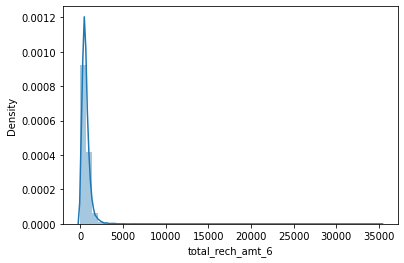

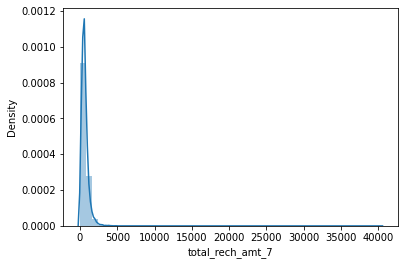

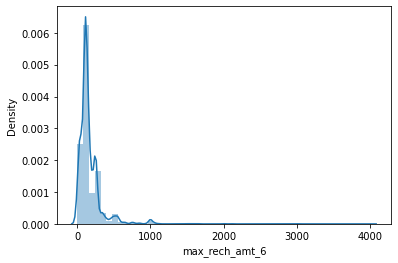

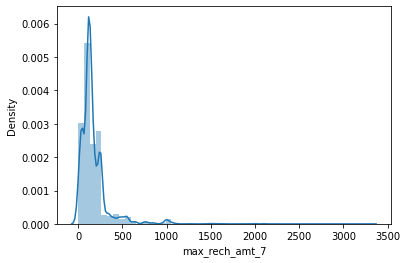

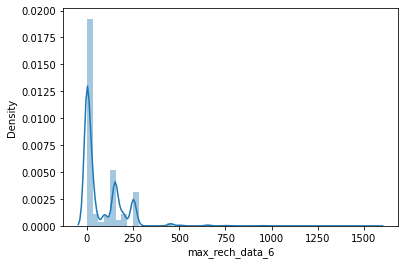

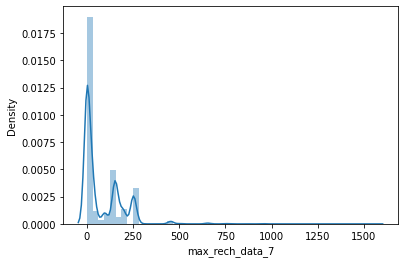

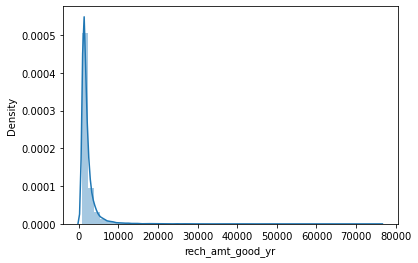

In [88]:
for cols in rech_call_data:
    sns.distplot(high_val_customers[cols], label = cols)
    plt.show()

Columns show all call kinds for good and action phase both inside the same operator network and outside the network.

In [89]:
onnet_offnet_data =  high_val_customers.columns[high_val_customers.columns.str.contains('onnet|offnet')]
onnet_offnet_data

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7'], dtype='object')

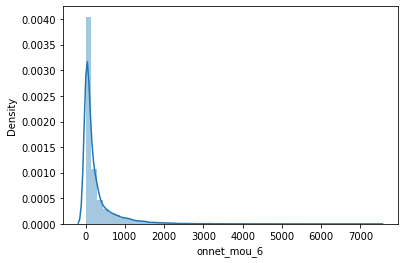

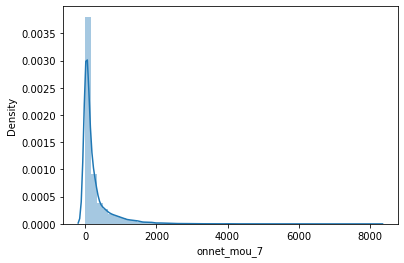

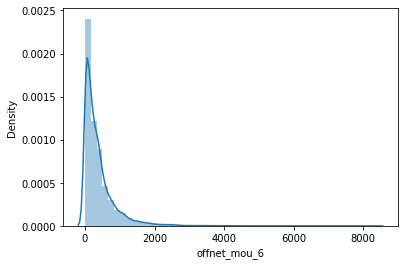

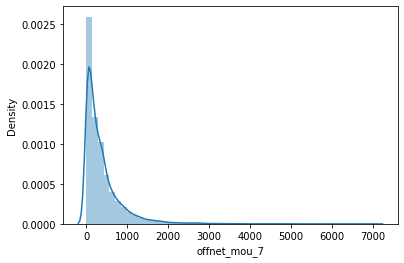

In [90]:
for cols in onnet_offnet_data:
    sns.distplot(high_val_customers[cols], label = cols)
    plt.show()

`columns for overall and roaming outgoing calls for the positive and action phases`

In [91]:
og_data =  high_val_customers.columns[high_val_customers.columns.str.contains('total_og|roam_og')]
og_data

Index(['roam_og_mou_6', 'roam_og_mou_7', 'total_og_mou_6', 'total_og_mou_7'], dtype='object')

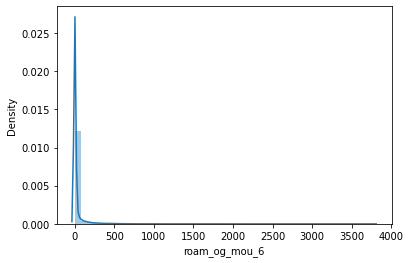

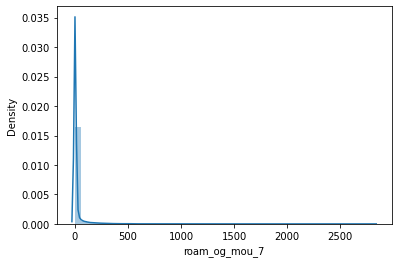

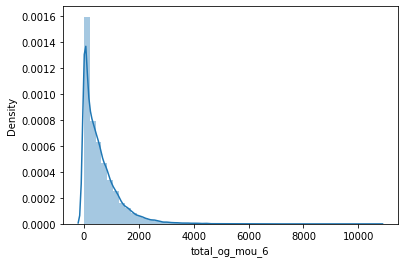

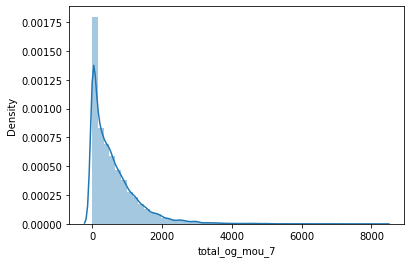

In [92]:
for cols in og_data:
    sns.distplot(high_val_customers[cols], label = cols,kde_kws={'bw':0.1})
    plt.show()

Columns representing the good and action phases' total incoming calls and roaming outgoing calls

In [93]:
ic_data =  high_val_customers.columns[high_val_customers.columns.str.contains('total_ic|roam_ic')]
ic_data

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7'], dtype='object')

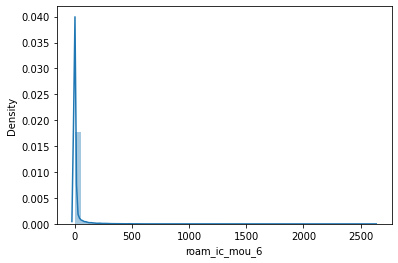

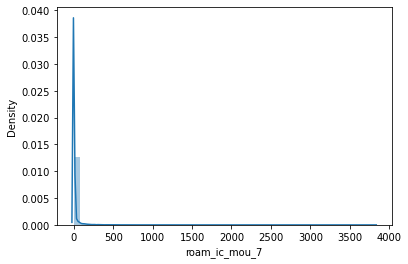

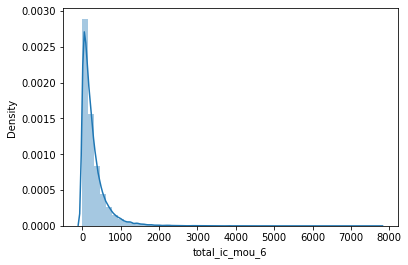

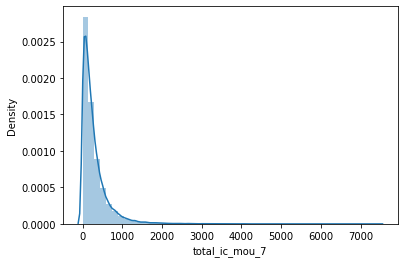

In [94]:
for cols in ic_data:
    sns.distplot(high_val_customers[cols], label = cols, kde_kws={'bw':0.1})
    plt.show()

Columns related to average revenue per user for good & action phase

In [95]:
arpu_data =  high_val_customers.columns[high_val_customers.columns.str.contains('arpu')]
arpu_data

Index(['arpu_6', 'arpu_7'], dtype='object')

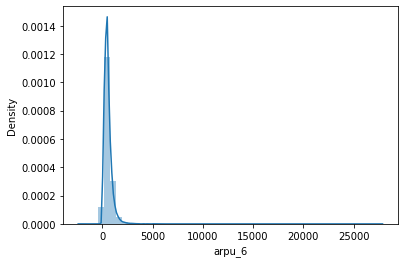

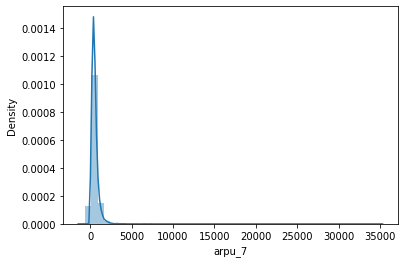

In [96]:
for cols in arpu_data:
    sns.distplot(high_val_customers[cols], label = cols, kde_kws={'bw':0.1})
    plt.show()

c) Observing Numerical columns - Outlier analysis

Outliers in all types of outgoing calls in  all the months

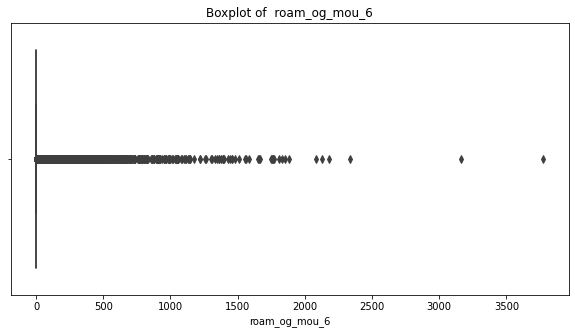

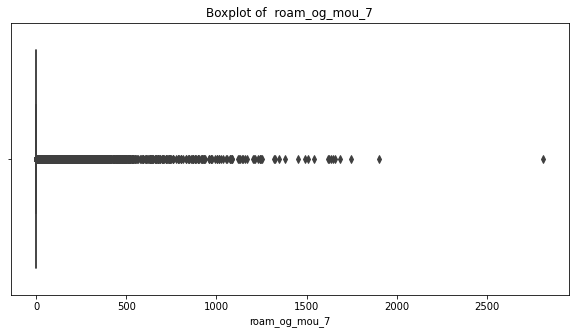

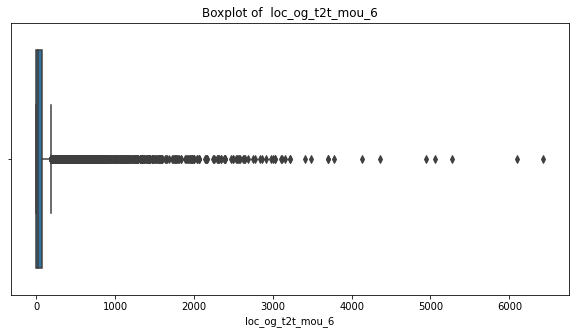

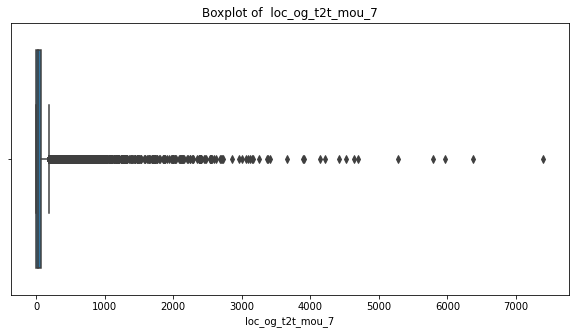

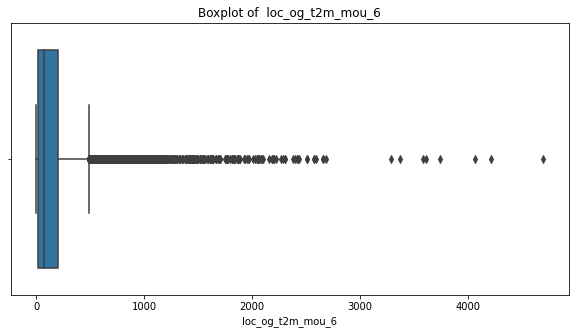

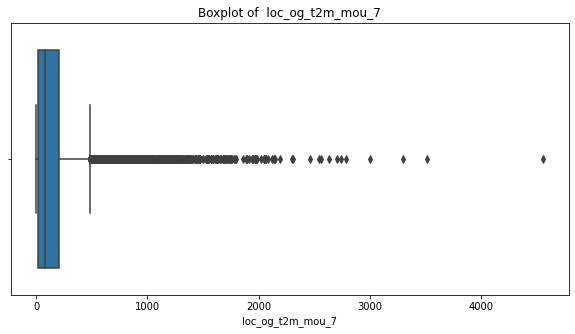

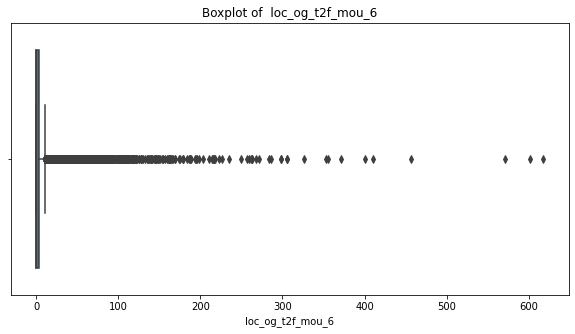

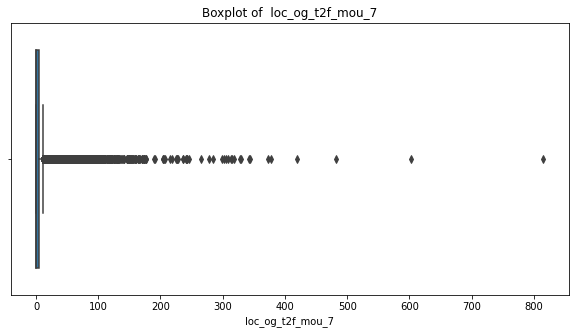

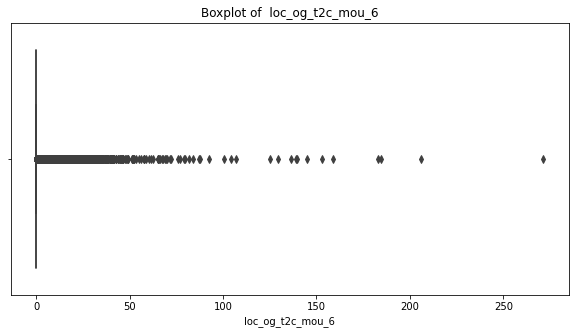

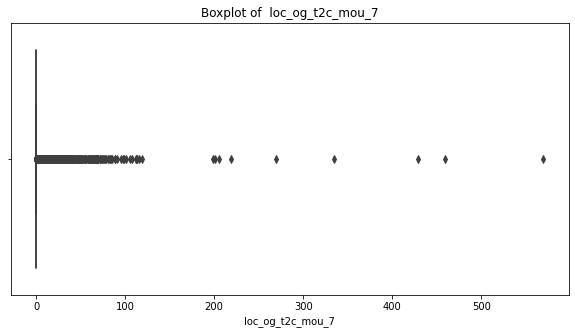

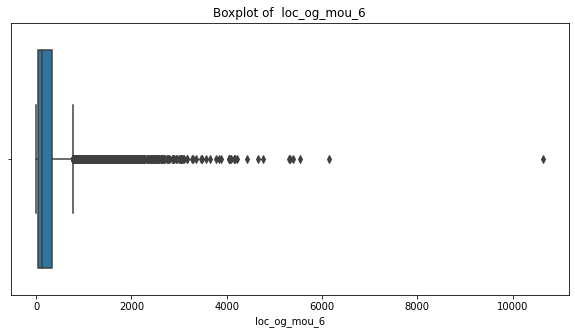

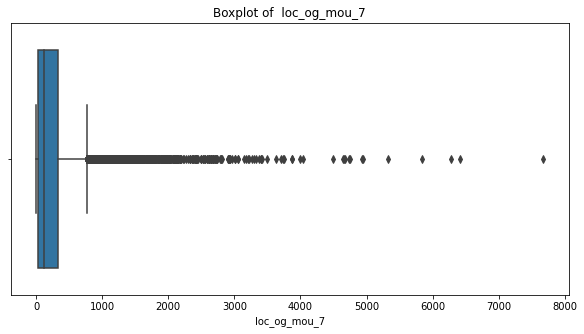

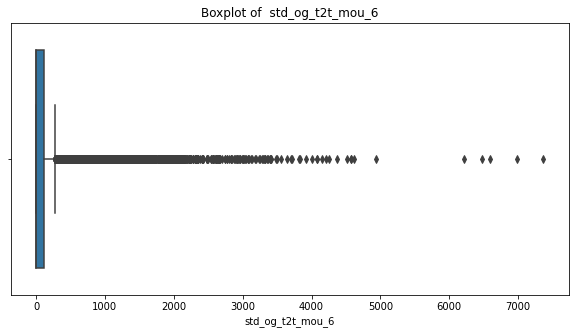

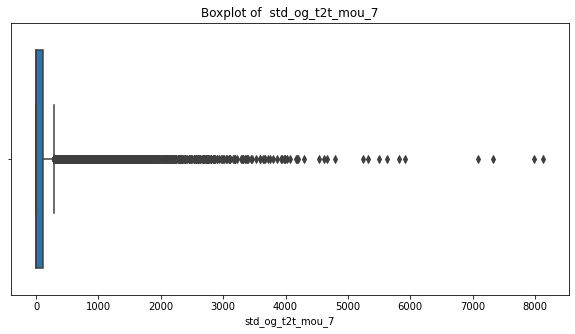

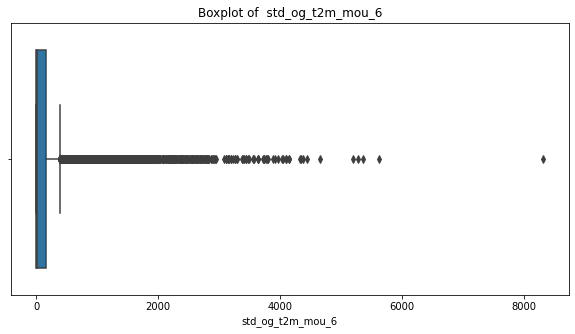

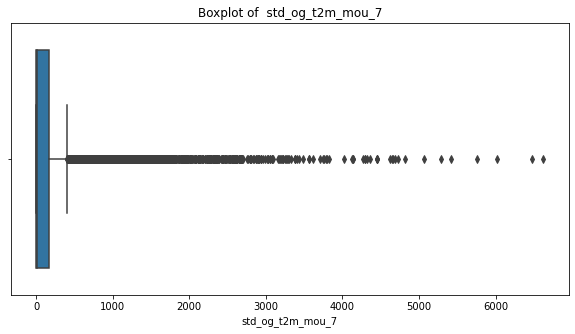

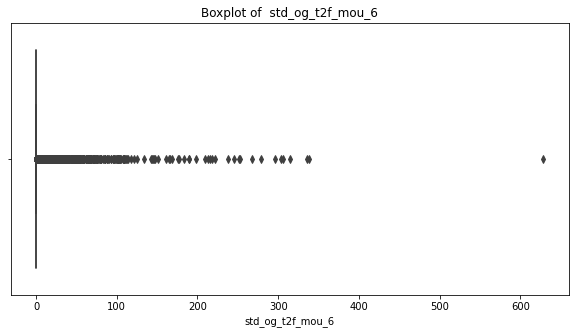

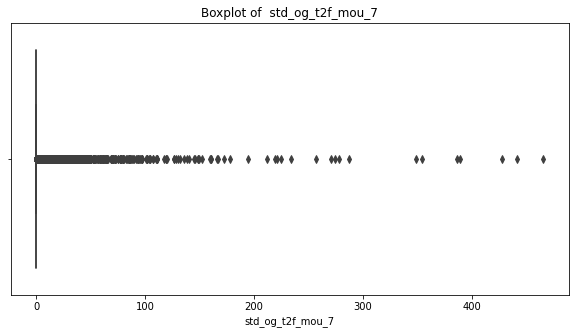

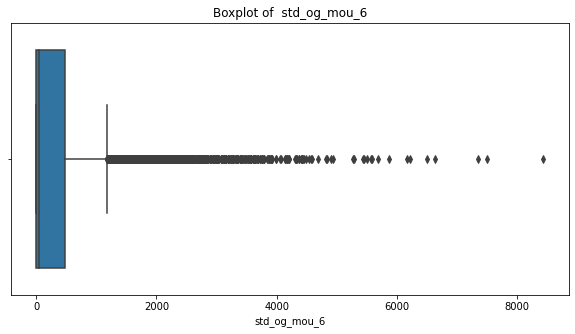

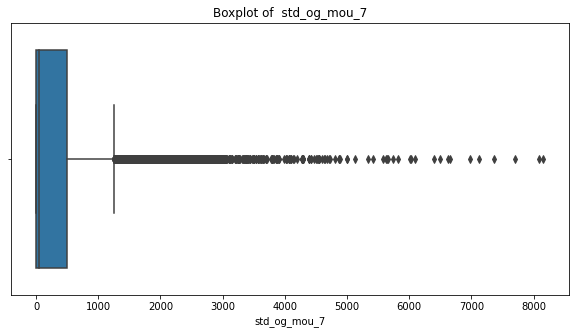

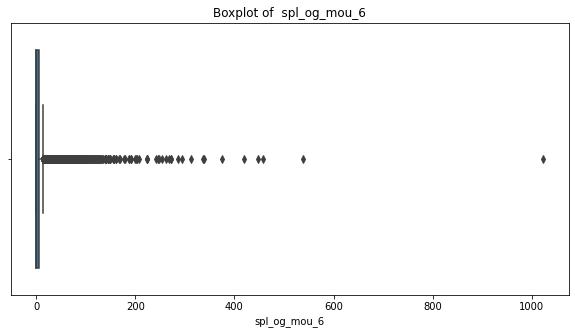

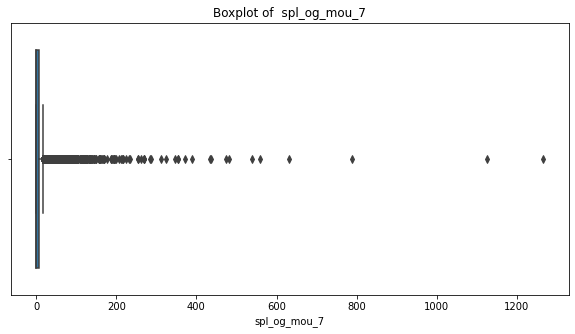

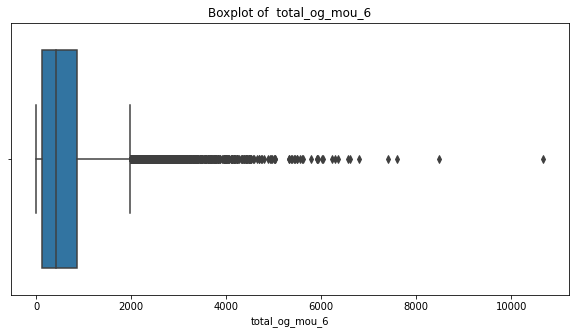

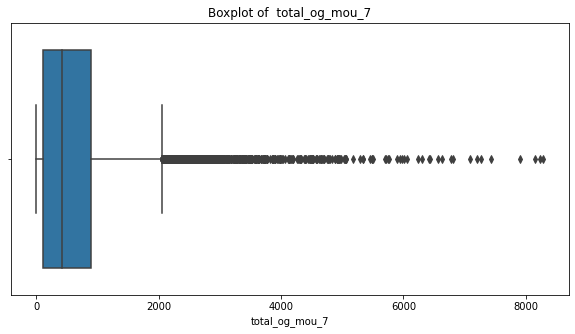

In [97]:
for i in high_val_customers.columns[high_val_customers.columns.str.contains("og")]:
    plt.figure(figsize =(10,5))
    sns.boxplot(high_val_customers[i])
    plt.title('Boxplot of '+' '+ i)
    plt.xlabel(i)
    plt.show() 

`Outliers in all types of incoming calls in  all the months`

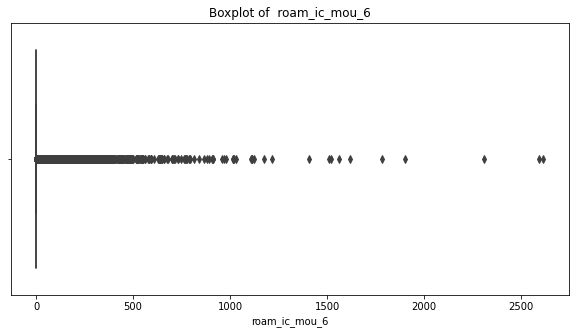

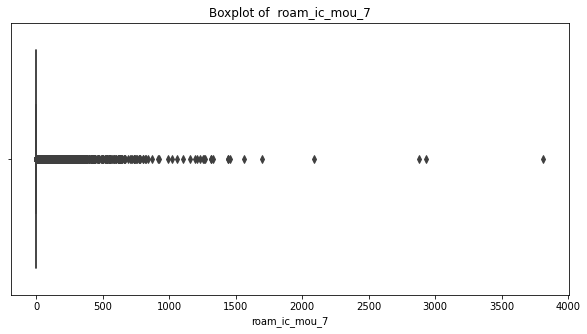

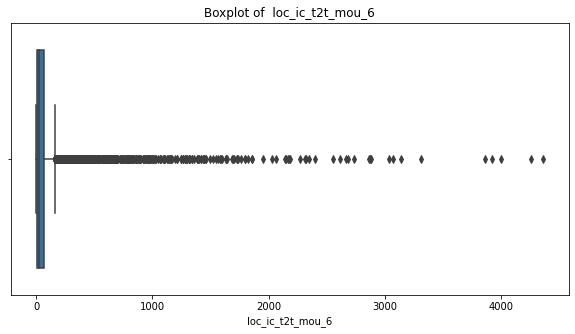

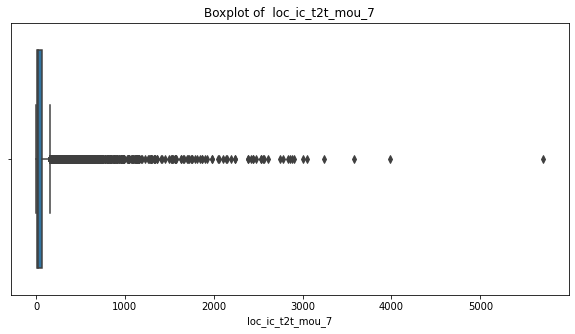

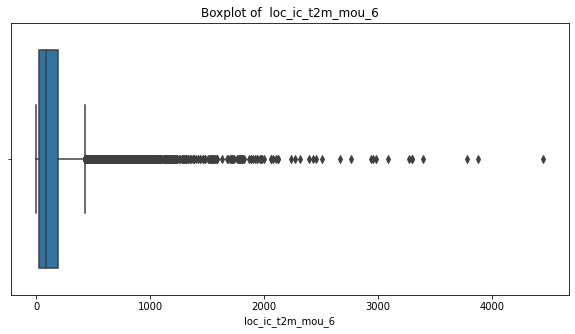

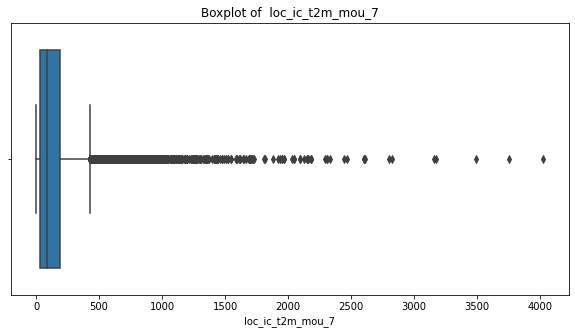

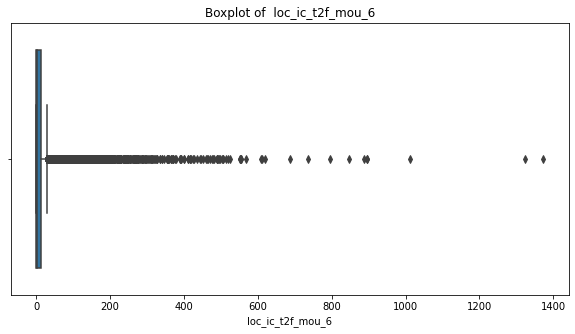

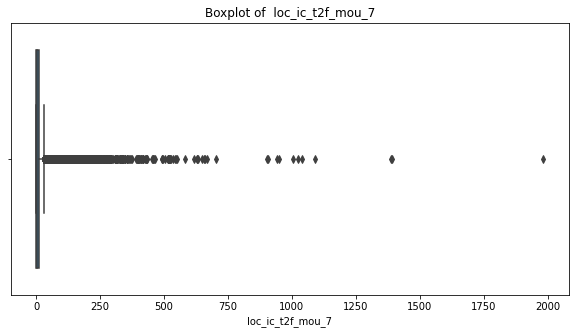

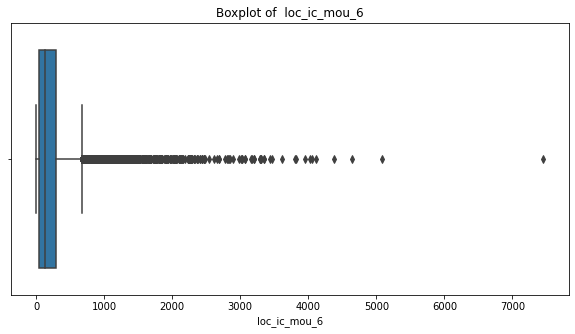

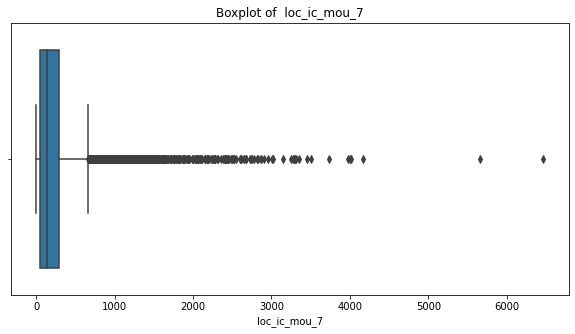

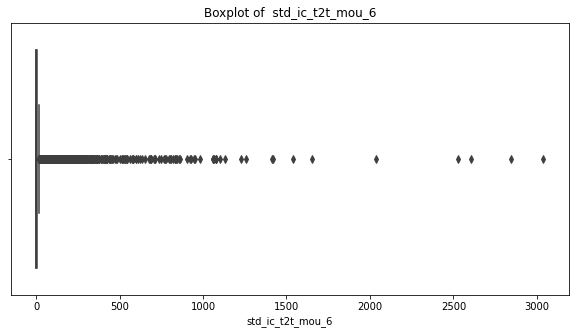

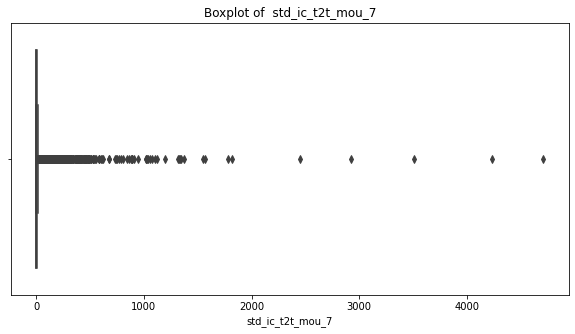

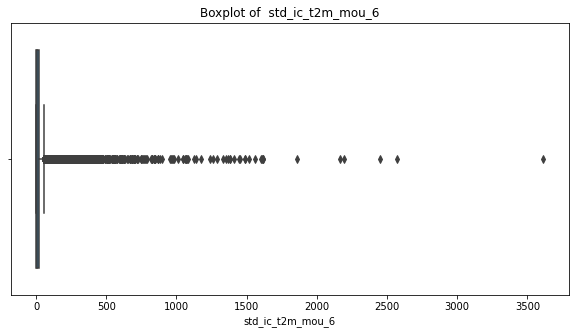

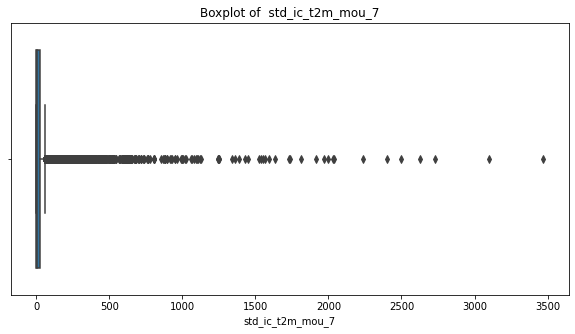

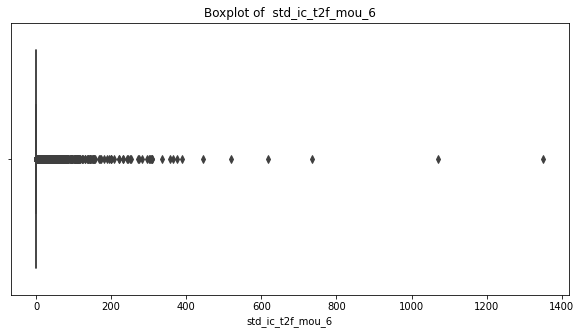

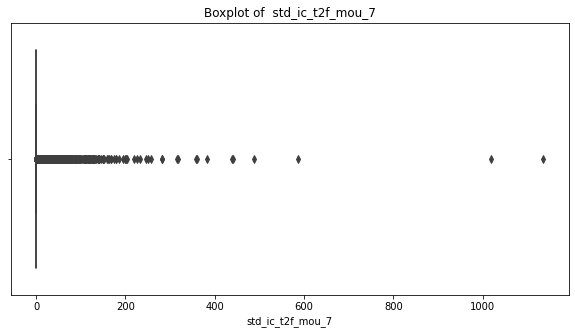

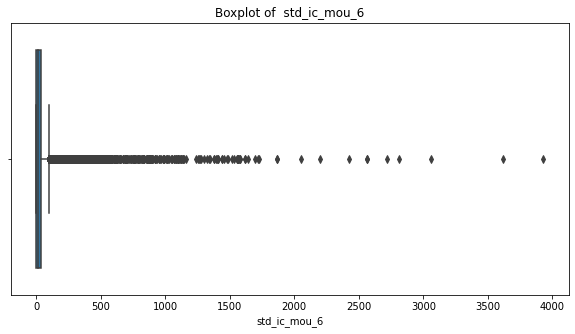

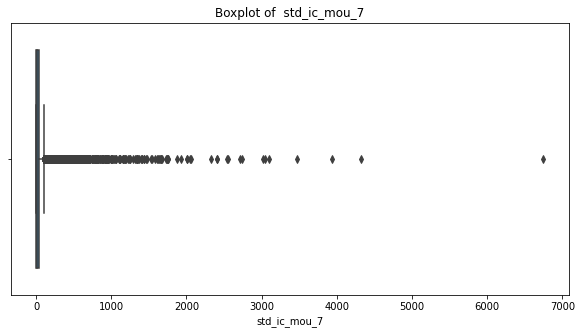

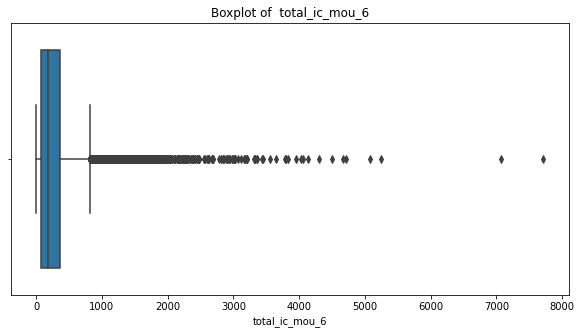

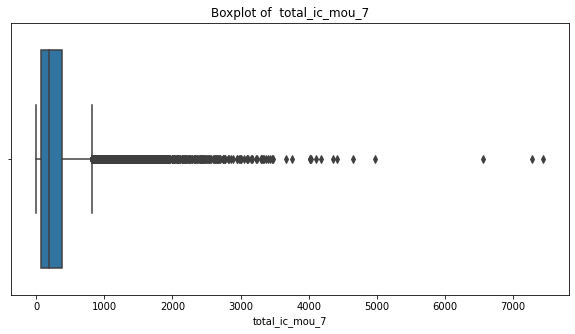

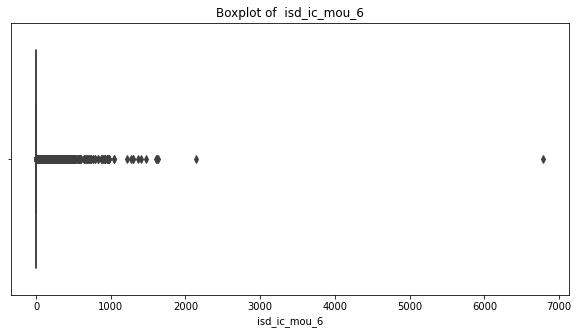

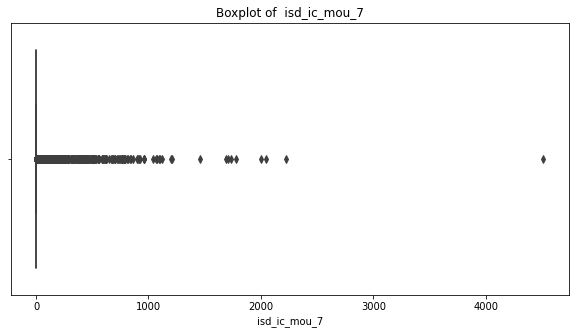

In [98]:
for i in high_val_customers.columns[high_val_customers.columns.str.contains("ic")]:
    plt.figure(figsize =(10,5))
    sns.boxplot(high_val_customers[i])
    plt.title('Boxplot of '+' '+ i)
    plt.xlabel(i)
    plt.show()

Outliers in monthly data recharges done in all the months

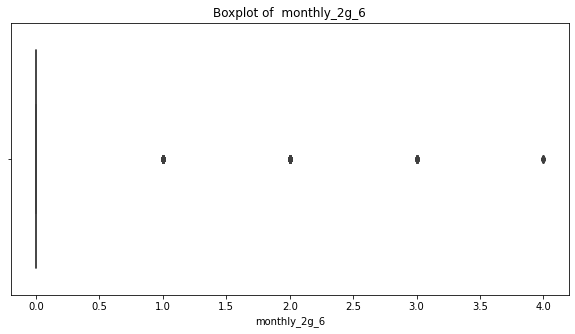

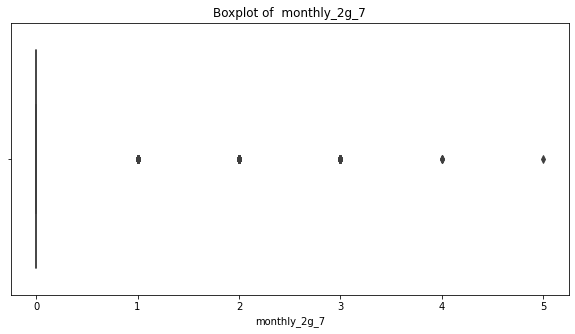

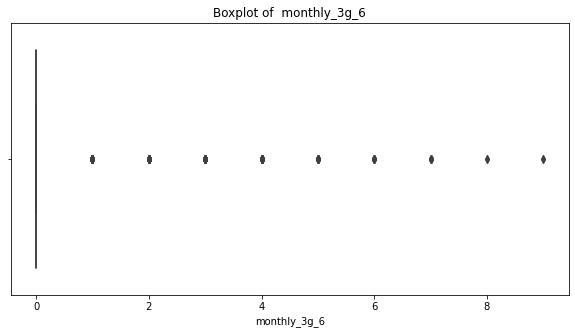

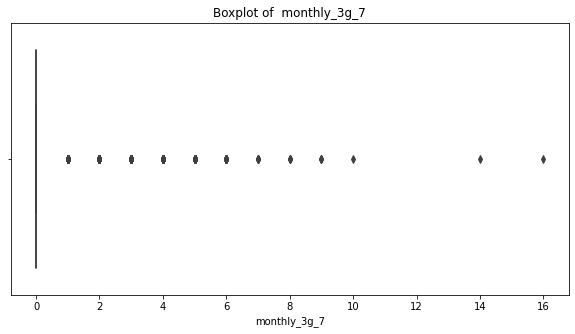

In [99]:
for i in high_val_customers.columns[high_val_customers.columns.str.contains("monthly")]:
        plt.figure(figsize =(10,5))
        sns.boxplot(high_val_customers[i].astype('int'))
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show()   

`Outliers in sachet recharges done in all the months`

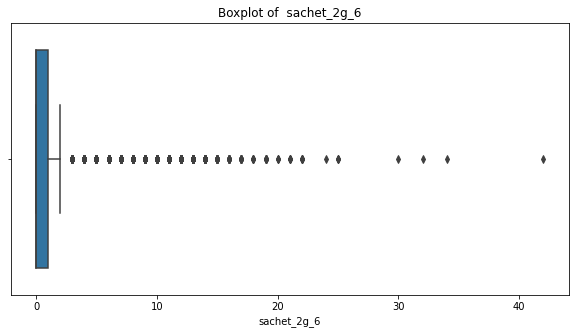

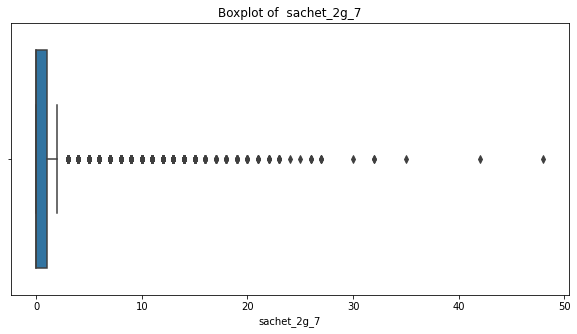

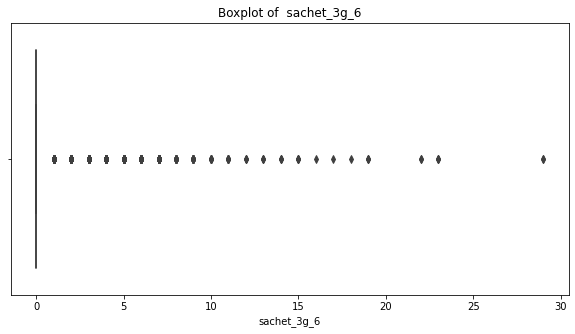

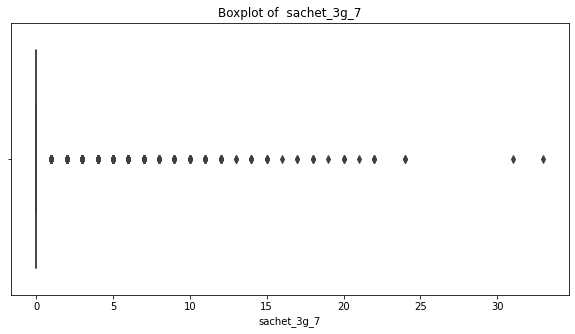

In [100]:
for i in high_val_customers.columns[high_val_customers.columns.str.contains("sachet")]:
        plt.figure(figsize =(10,5))
        sns.boxplot(high_val_customers[i].astype('int'))
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show()   

Outliers in All kind of calls within the same operator network in all the months

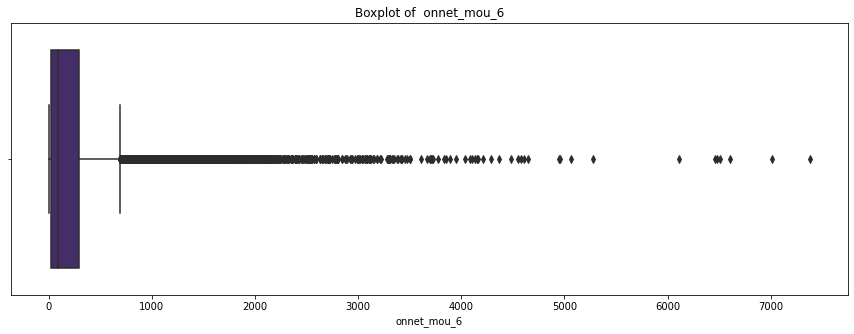

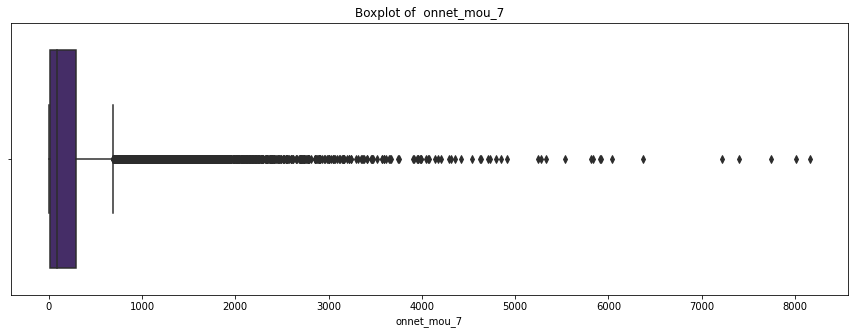

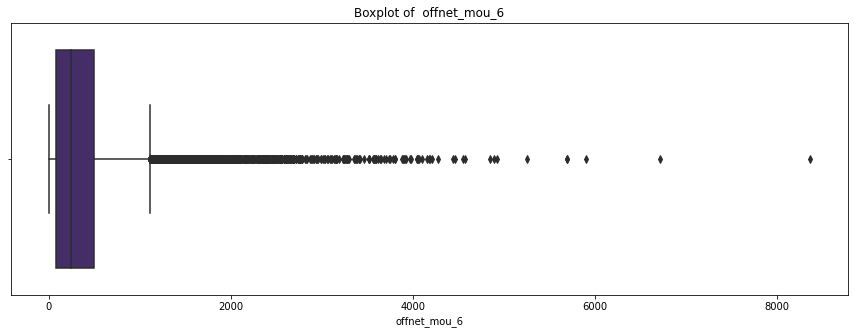

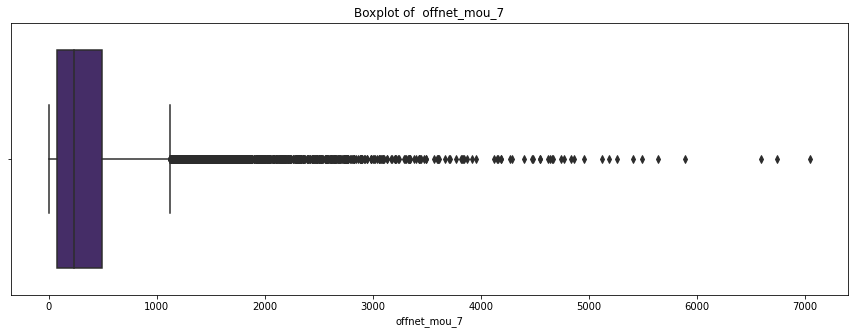

In [101]:
for i in high_val_customers.columns[high_val_customers.columns.str.contains("net")]:
        plt.figure(figsize =(15,5))
        sns.boxplot(high_val_customers[i],palette=['#432371',"#FAAE7B"])
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show() 

`Outliers in all kind of calls outside the operator network`

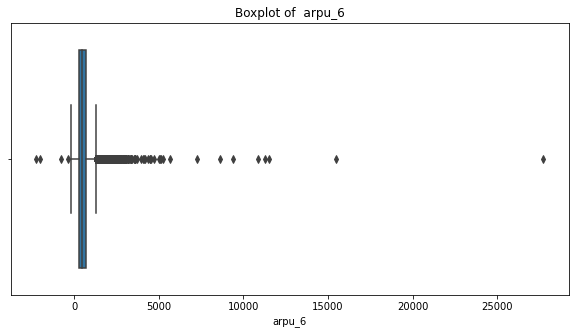

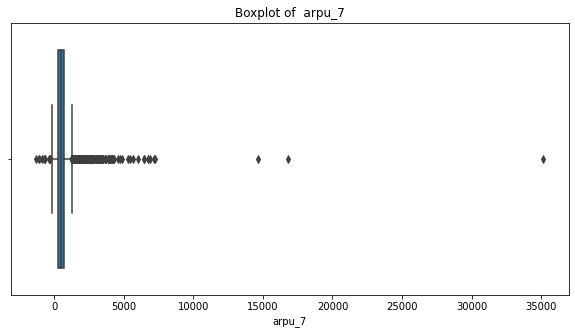

In [102]:
for i in high_val_customers.columns[high_val_customers.columns.str.contains("arpu")]:
        plt.figure(figsize =(10,5))
        sns.boxplot(high_val_customers[i])
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show() 

d) Observing categorical columns

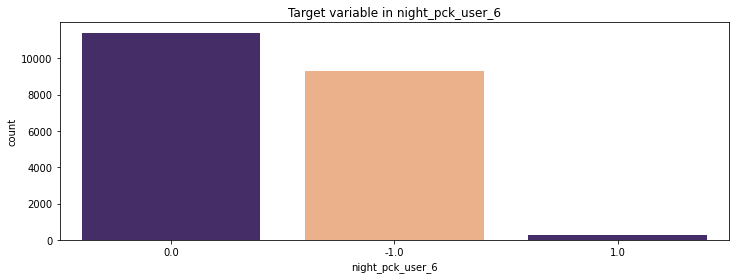

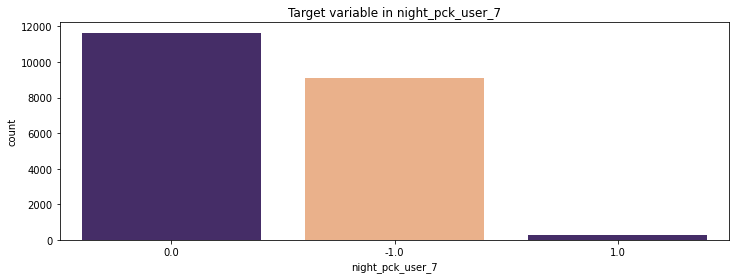

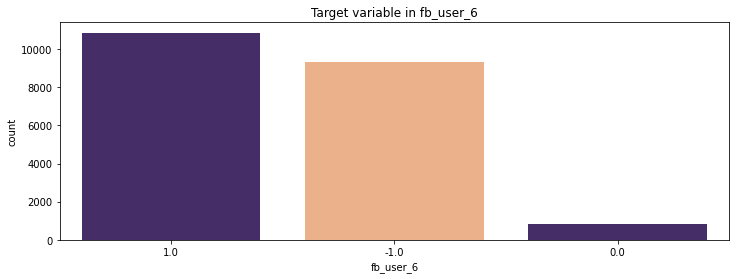

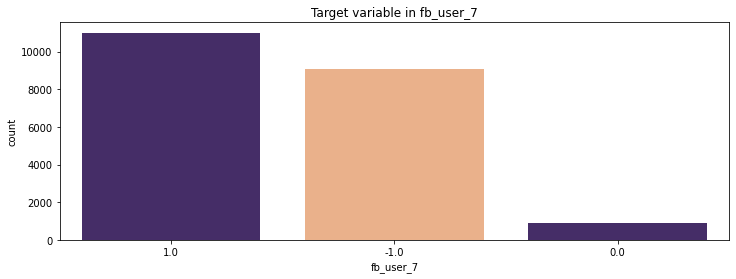

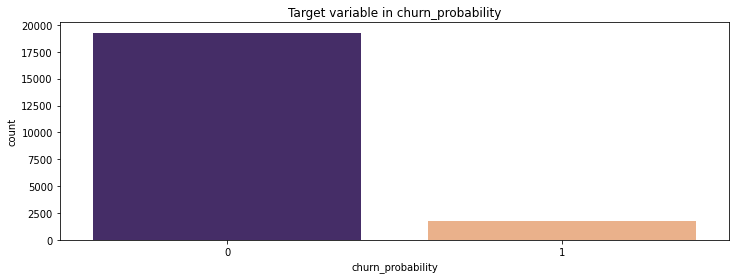

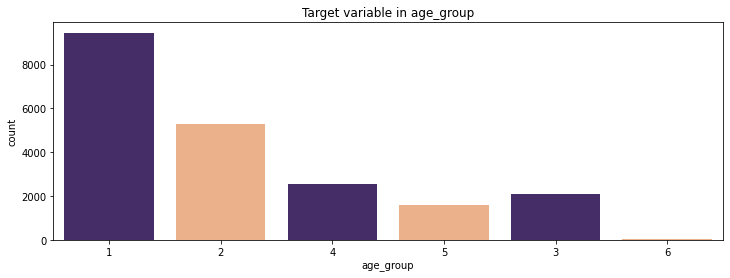

In [103]:
for i in categorical_columns:
    if (i != 'churn')|(i != 'age_group'):
        plt.figure(figsize =(12,4))
        sns.countplot(high_val_customers[i],palette=['#432371',"#FAAE7B"])
        plt.title('Target variable in'+' '+ i)
        plt.xlabel(i)
        plt.show()

<AxesSubplot:xlabel='age_group', ylabel='count'>

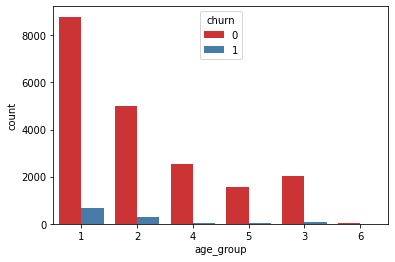

In [104]:
sns.countplot(high_val_customers['age_group'], hue = high_val_customers['churn'], palette="Set1")

###  Bivariate Analysis

In [105]:
def bivar_plot(var1, var2,fig):
    plt.figure(figsize = (20,15))
    plt.subplot(4,2, fig)
    if var1.dtype != 'object' and var2.dtype != 'object':
        sns.regplot(var1, var2)
    elif (var1.dtype == 'object' and var2.dtype != 'object') or (var1.dtype != 'object' and var2.dtype == 'object'):        
        sns.boxplot(var1, var2,palette=['#432371',"#FAAE7B"])

 a) Analyzing age of network with churn

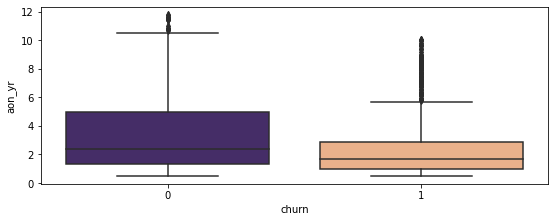

In [106]:
bivar_plot(high_val_customers.churn, high_val_customers.aon_yr,1)

- Less than 1000 days are typically spent by a customer on the network before they churn.

b) Analyzing onnet with churn

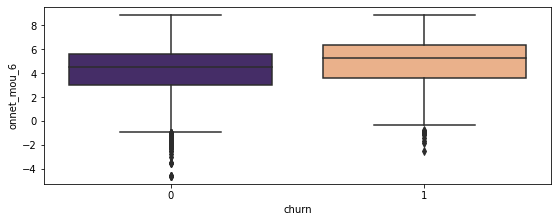

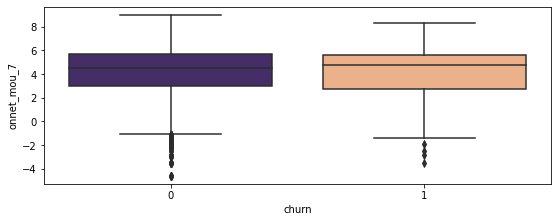

In [107]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.onnet_mou_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.onnet_mou_7),2)


People who have churned, used most of the calling in moth of June and July on same network.

c) Analyzing offnet with churn

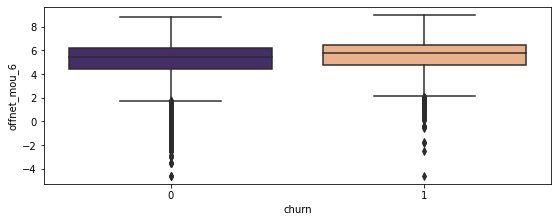

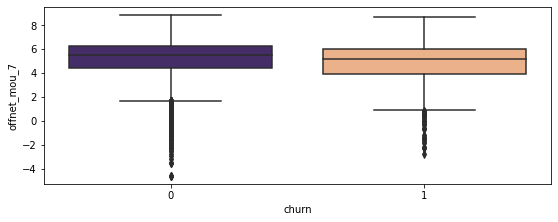

In [108]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.offnet_mou_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.offnet_mou_7),2)


People who have churned, used most of the calling in month of June and July on different network

 d) Analyzing night pack user with churn

In [109]:
pd.crosstab(high_val_customers.churn, high_val_customers.night_pck_user_7, normalize='columns')*100

night_pck_user_7      -1.0        0.0        1.0
churn                                           
0                 91.32395  97.200515  98.175182
1                  8.67605   2.799485   1.824818

e) Analyzing Sachet with churn

In [110]:
pd.crosstab(high_val_customers.churn, high_val_customers.sachet_3g_7)

sachet_3g_7     0     1    2    3   4   5   6   7   8   9   10  11  12  13  \
churn                                                                        
0            17691  1383  365  151  79  67  49  24  13  11  11  11   9   2   
1             1062    41   10    1   0   4   0   1   0   0   0   0   0   0   

sachet_3g_7  14  15  16  17  18  19  20  21  22  24  31  33  
churn                                                        
0             5   5   1   1   3   1   3   1   3   2   1   1  
1             0   0   0   1   0   0   0   0   0   0   0   0

f) Analyzing average revenue per user with churn

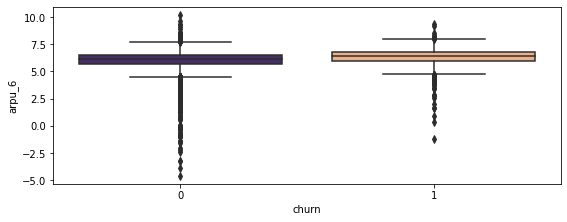

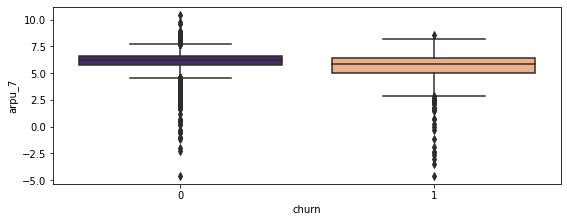

In [111]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.arpu_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.arpu_7),2)


 g) Analyzing total recharge amount with churn

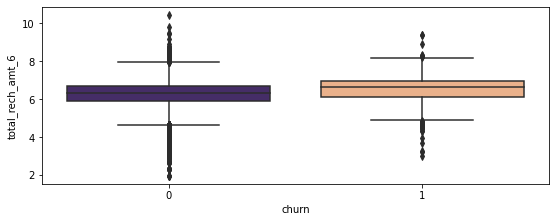

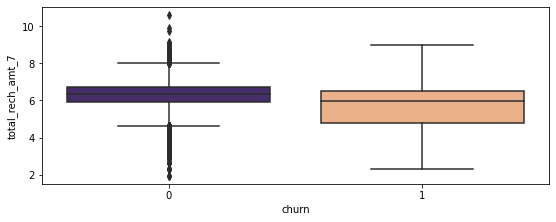

In [112]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.total_rech_amt_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.total_rech_amt_7),2)

h) Analyzing total recharge number with churn

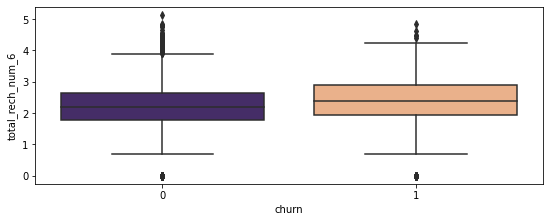

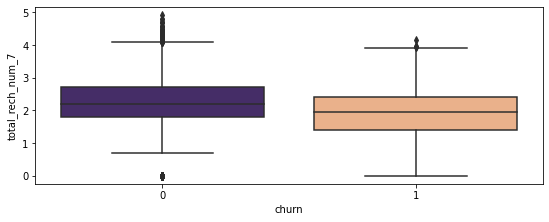

In [113]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.total_rech_num_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.total_rech_num_7),2)

#### correlation among the features

In [114]:
# Observing the correlation among these numerical predictor variables

high_val_customers.drop('id',1).corr()

arpu_6    arpu_7  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.696079     0.331551     0.214061   
arpu_7              0.696079  1.000000     0.206733     0.307403   
onnet_mou_6         0.331551  0.206733     1.000000     0.746165   
onnet_mou_7         0.214061  0.307403     0.746165     1.000000   
offnet_mou_6        0.491750  0.345705     0.084351     0.049536   
offnet_mou_7        0.335476  0.472896     0.033822     0.076019   
roam_ic_mou_6       0.122432  0.089663     0.025984     0.041417   
roam_ic_mou_7       0.075066  0.086085     0.026825     0.009168   
roam_og_mou_6       0.199235  0.137118     0.083168     0.087843   
roam_og_mou_7       0.139175  0.173429     0.081952     0.072473   
loc_og_t2t_mou_6    0.165042  0.106148     0.452061     0.348059   
loc_og_t2t_mou_7    0.126185  0.154602     0.351486     0.459695   
loc_og_t2m_mou_6    0.317185  0.203474     0.030958    -0.004863   
loc_og_t2m_mou_7    0.234936  0.291490    -0.000368     0.014843   
loc_og_t2f_mou_6    0.138259  0.114691    -0.036963    -0.043719   
loc_og_t2f_mou_7    0.113610  0.147171    -0.042772    -0.037338   
loc_og_t2c_mou_6    0.045944  0.009489     0.047728     0.035013   
loc_og_t2c_mou_7    0.008208  0.038052     0.035945     0.051358   
loc_og_mou_6        0.314966  0.203599     0.291655     0.204941   
loc_og_mou_7        0.236063  0.291957     0.225609     0.305733   
std_og_t2t_mou_6    0.268783  0.162584     0.859033     0.632097   
std_og_t2t_mou_7    0.160163  0.254642     0.633270     0.859935   
std_og_t2m_mou_6    0.285452  0.190735     0.078342     0.057938   
std_og_t2m_mou_7    0.170739  0.289840     0.039030     0.077231   
std_og_t2f_mou_6    0.064933  0.050437    -0.021634    -0.024748   
std_og_t2f_mou_7    0.047952  0.072313    -0.023751    -0.017911   
std_og_mou_6        0.371719  0.237156     0.625683     0.460412   
std_og_mou_7        0.222466  0.365964     0.448382     0.625418   
spl_og_mou_6        0.113834  0.066974     0.081750     0.055380   
spl_og_mou_7        0.064979  0.108501     0.072926     0.101098   
total_og_mou_6      0.542076  0.357641     0.712217     0.518507   
total_og_mou_7      0.358207  0.522131     0.519398     0.720320   
loc_ic_t2t_mou_6    0.080148  0.040794     0.088248     0.048668   
loc_ic_t2t_mou_7    0.058864  0.070307     0.069940     0.078982   
loc_ic_t2m_mou_6    0.177490  0.105290    -0.030309    -0.060738   
loc_ic_t2m_mou_7    0.141559  0.164309    -0.048841    -0.038909   
loc_ic_t2f_mou_6    0.048775  0.031716    -0.034298    -0.038084   
loc_ic_t2f_mou_7    0.036284  0.043831    -0.030435    -0.021607   
loc_ic_mou_6        0.171114  0.098397     0.020033    -0.022075   
loc_ic_mou_7        0.133560  0.156362    -0.000851     0.012164   
std_ic_t2t_mou_6    0.090170  0.061290     0.126519     0.095025   
std_ic_t2t_mou_7    0.054382  0.078682     0.083218     0.110345   
std_ic_t2m_mou_6    0.094511  0.068137     0.010682    -0.011660   
std_ic_t2m_mou_7    0.063744  0.096577    -0.007135     0.004158   
std_ic_t2f_mou_6    0.034512  0.036440    -0.011106    -0.011105   
std_ic_t2f_mou_7    0.036287  0.049011    -0.012803    -0.012076   
std_ic_mou_6        0.122588  0.088146     0.074645     0.041403   
std_ic_mou_7        0.079671  0.117905     0.039760     0.062916   
total_ic_mou_6      0.216304  0.131210     0.039918    -0.009917   
total_ic_mou_7      0.160430  0.196599     0.010656     0.031386   
isd_ic_mou_6        0.108974  0.065600    -0.017862    -0.024097   
isd_ic_mou_7        0.073279  0.081816    -0.021315    -0.019380   
total_rech_num_6    0.343696  0.165217     0.259524     0.160640   
total_rech_num_7    0.132652  0.289316     0.137351     0.245553   
total_rech_amt_6    0.946338  0.707220     0.328324     0.218254   
total_rech_amt_7    0.675068  0.949969     0.198634     0.300277   
max_rech_amt_6      0.313318  0.261866     0.007331    -0.009010   
max_rech_amt_7      0.254446  0.369978    -0.007708     0.005271   
last_day_r

Strong correlations between several variables are seen. Let's look at the correlations between the variables to see which ones are most correlated and which ones are least correlated.

In [115]:
# building a correlation matrix using the data provided
corrmat = np.corrcoef(high_val_customers.drop('id',1).corr().transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.995 , min negative corr:  -0.651


####  Outlier analysis

# Outlier analysis

for i  in high_val_customers.drop('churn',1).columns:
    plt.figure(figsize =(6,6))
    print(i)
    ax = high_val_customers.boxplot(column= i, return_type='axes');
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers in "+' '+ i, fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

When we look at our major components, we see a lot of severe data points. Let's handle them as though these extreme numbers would have an impact on our clusters.

####  Outlier treatment

In [116]:
# Cappign the outliers
for col in high_val_customers.select_dtypes(exclude = 'object').columns:
    perc = high_val_customers[col].quantile([0.05,0.95]).values
    high_val_customers[col]= np.clip(high_val_customers[col],perc[0],perc[1])

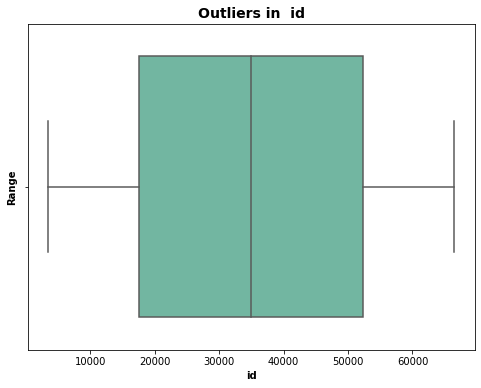

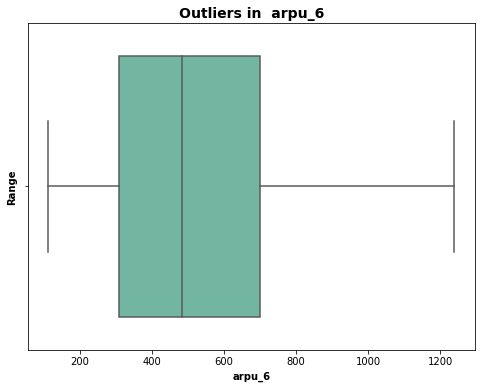

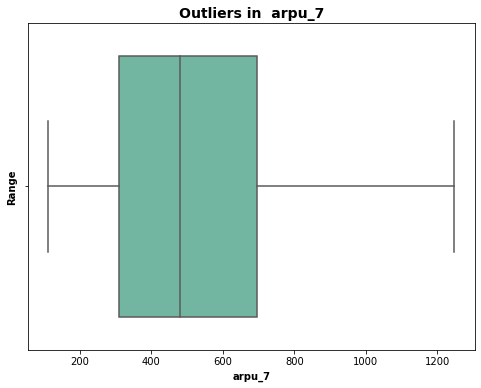

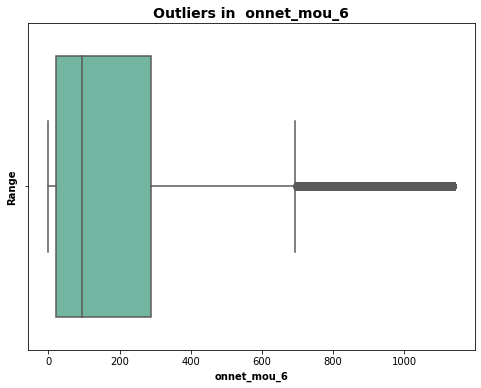

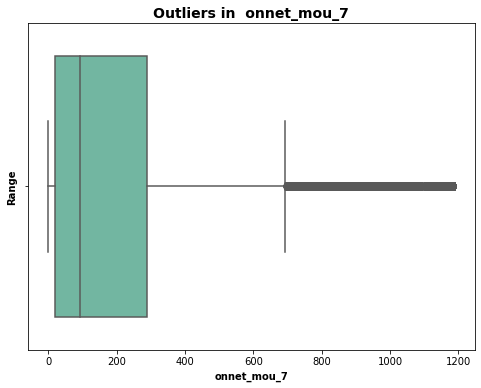

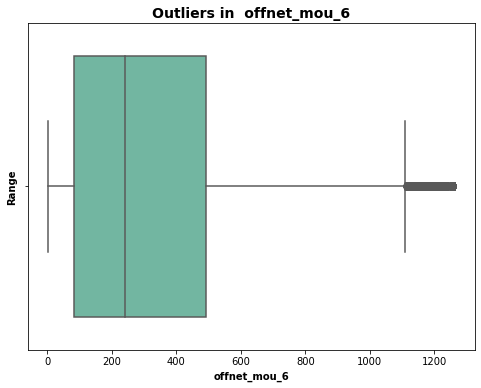

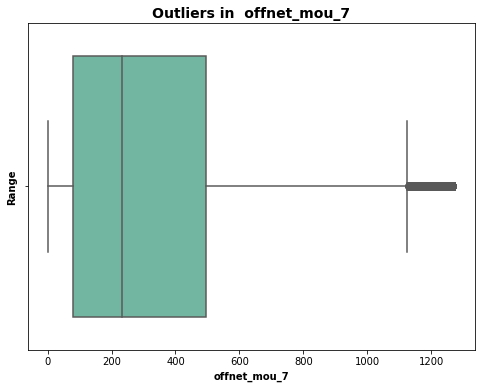

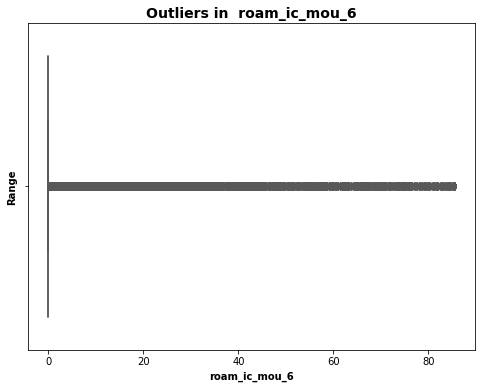

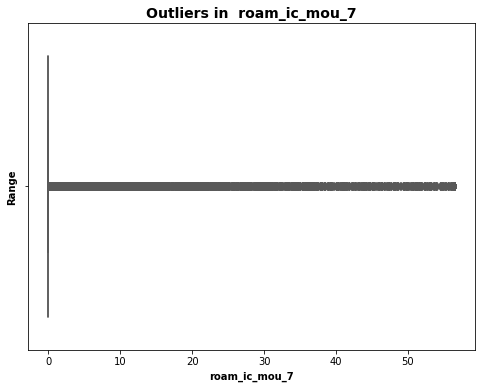

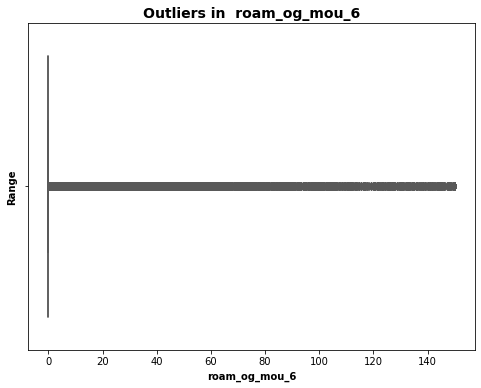

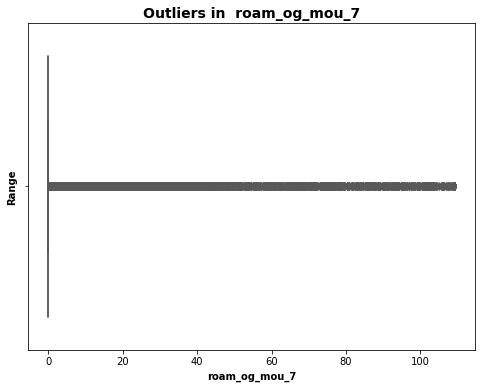

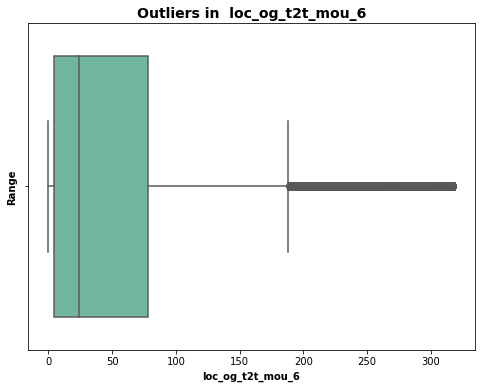

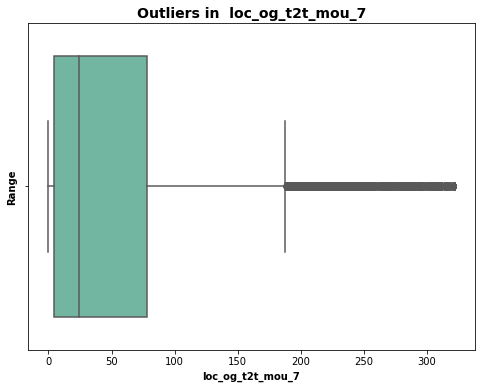

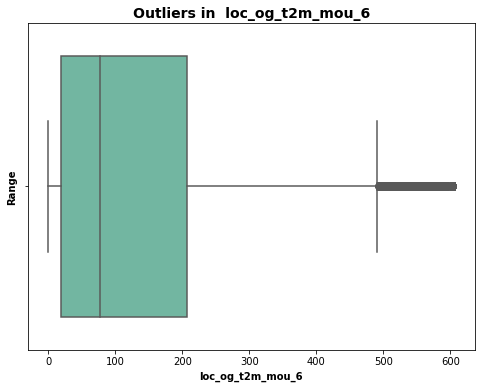

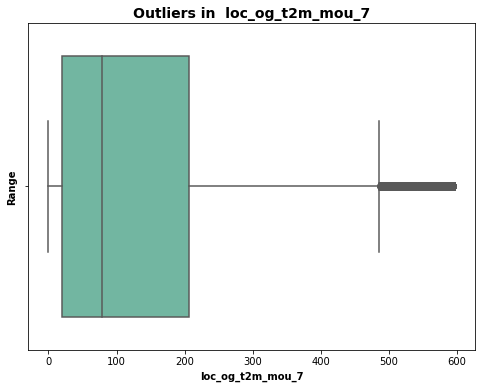

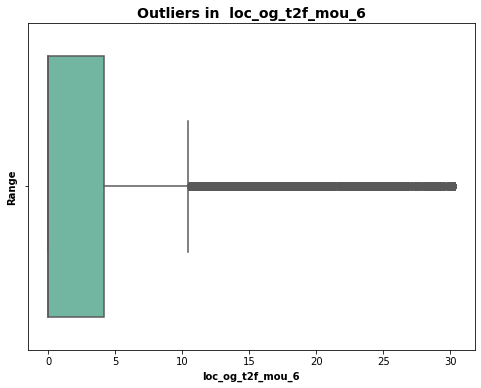

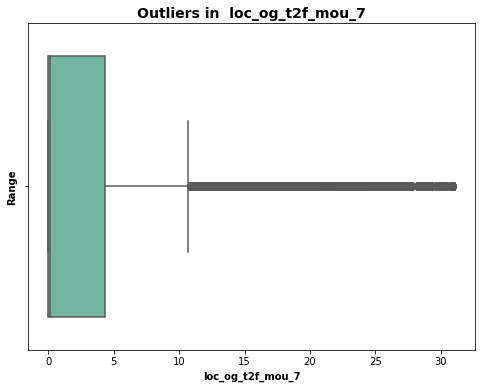

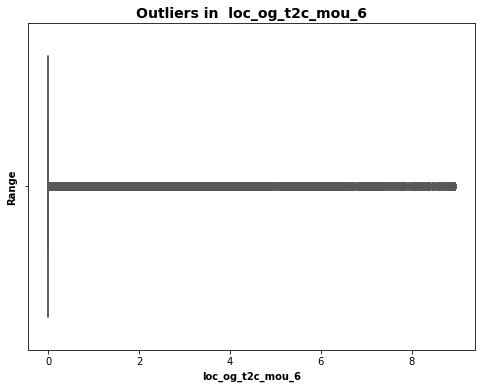

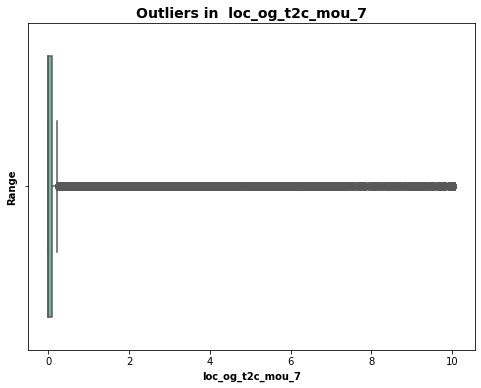

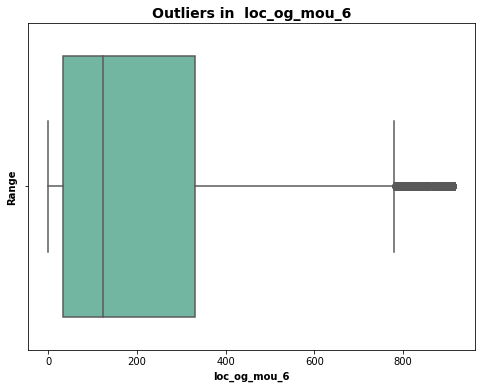

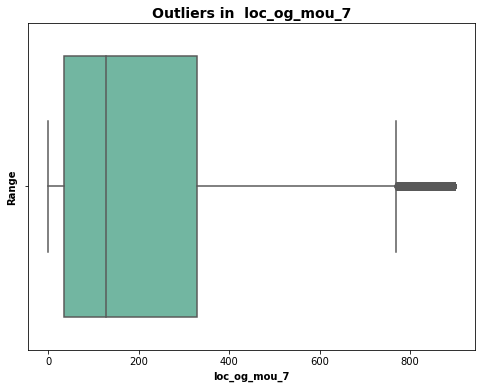

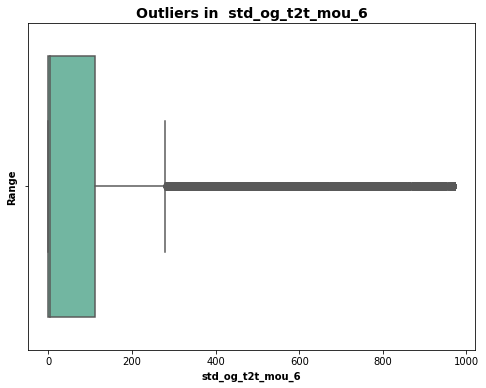

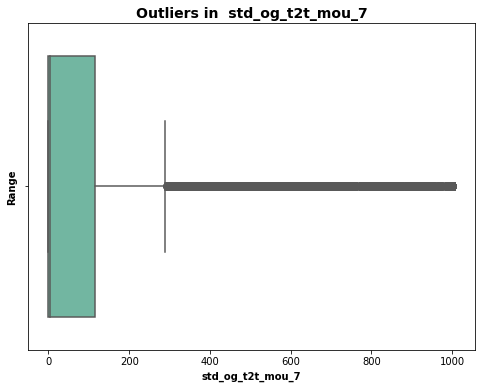

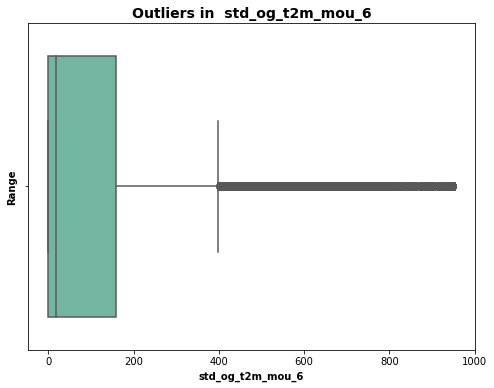

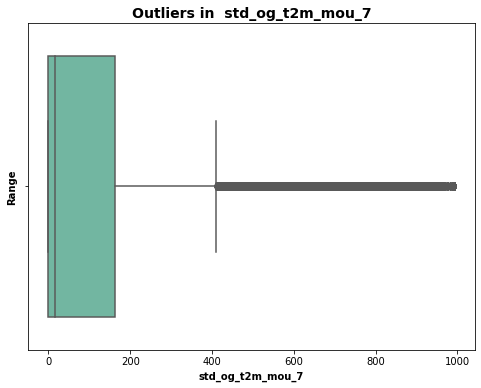

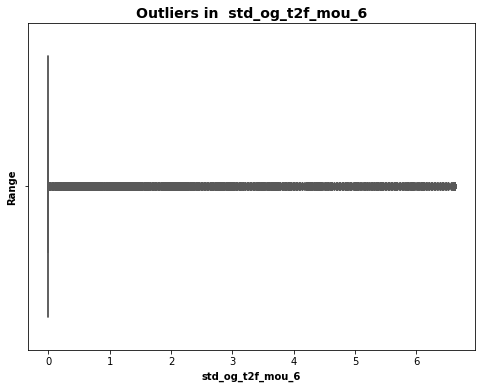

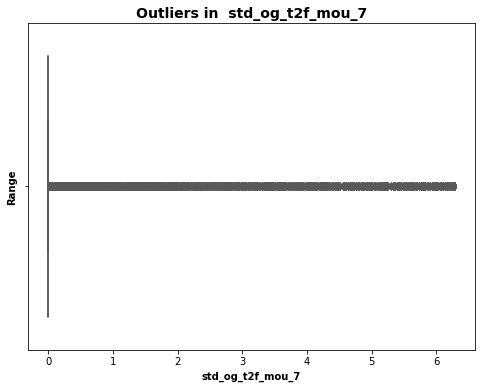

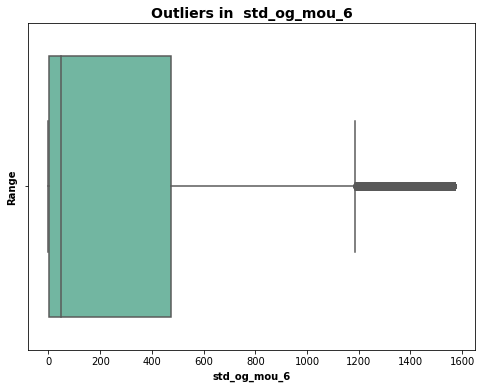

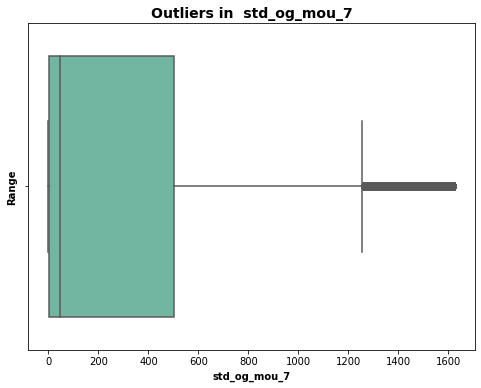

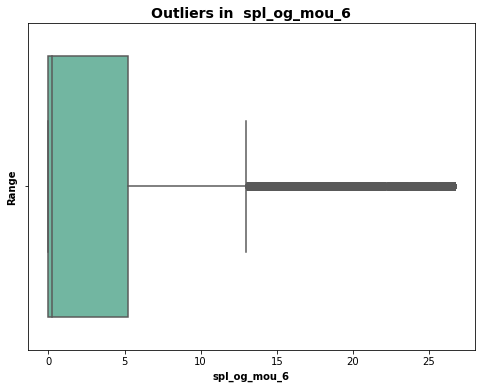

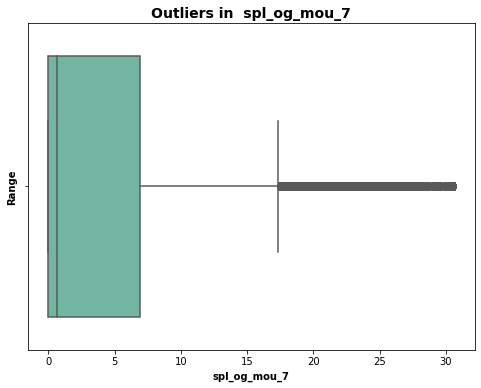

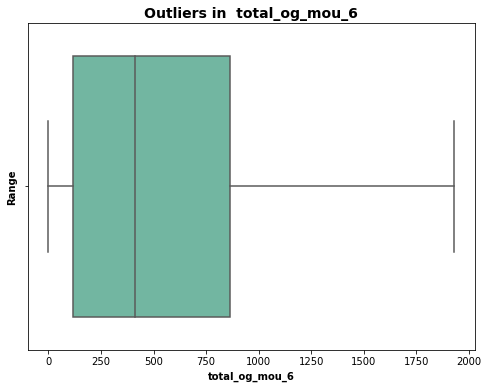

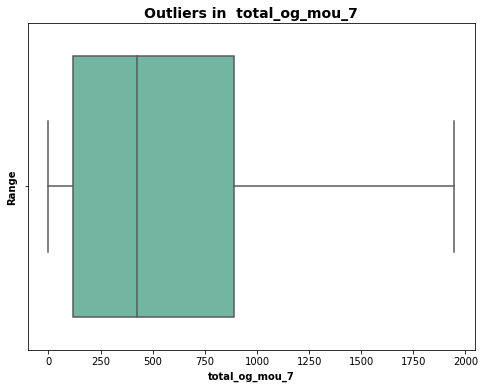

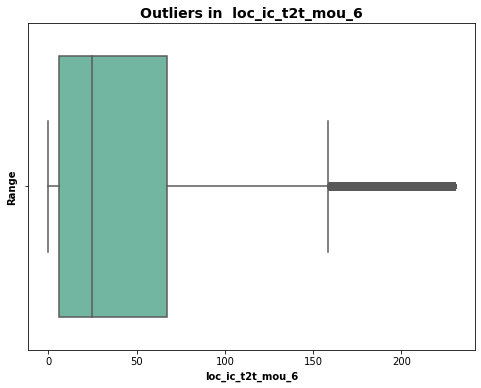

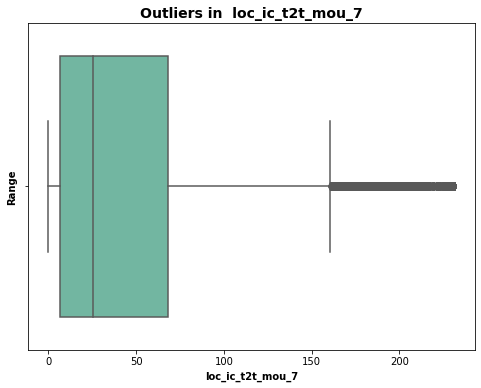

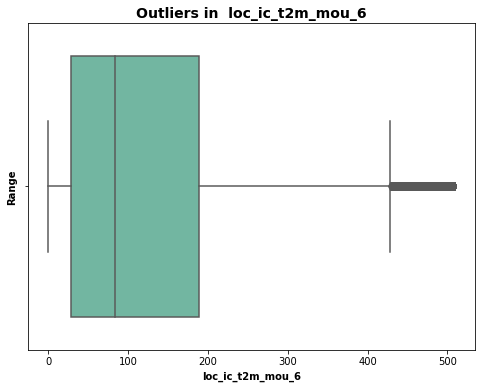

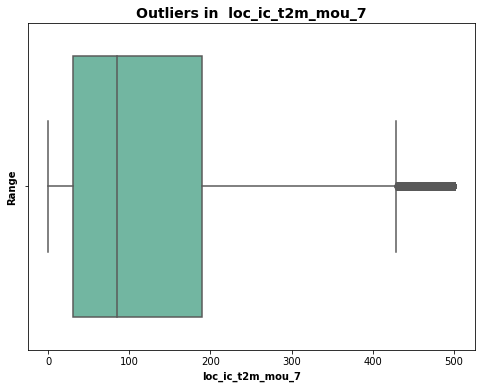

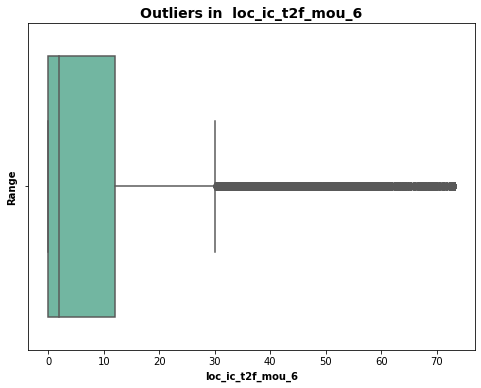

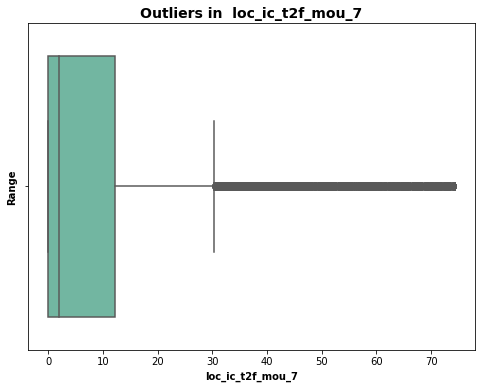

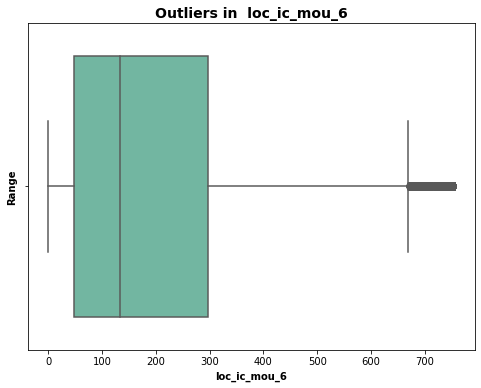

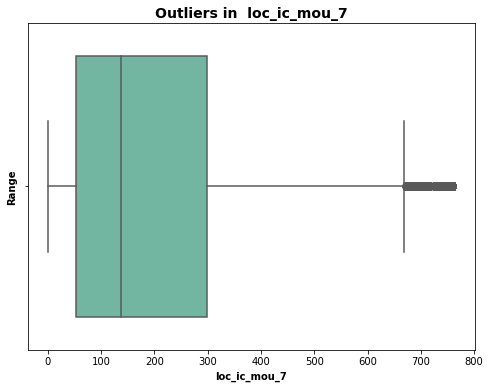

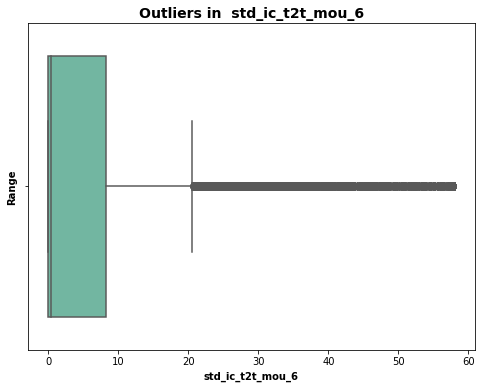

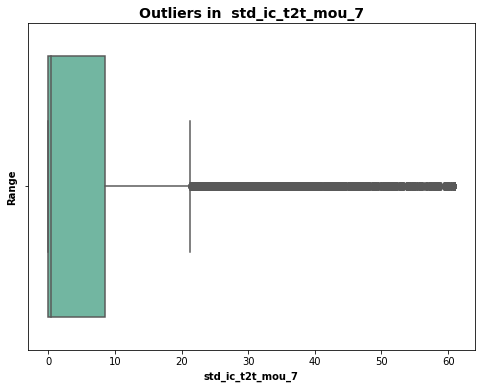

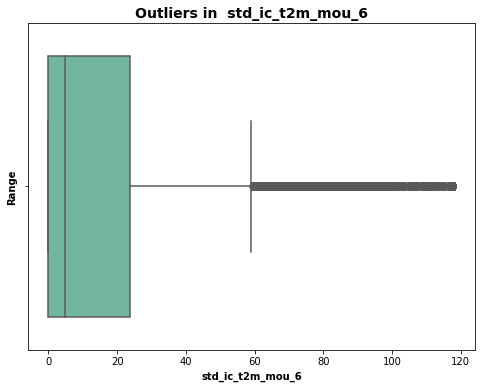

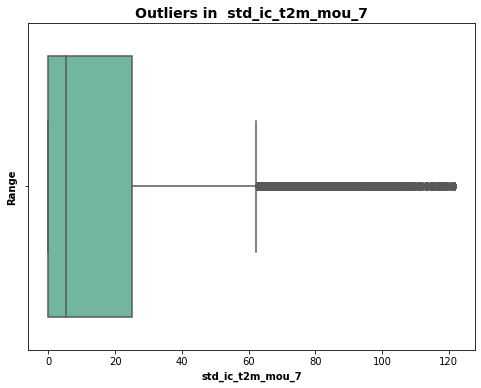

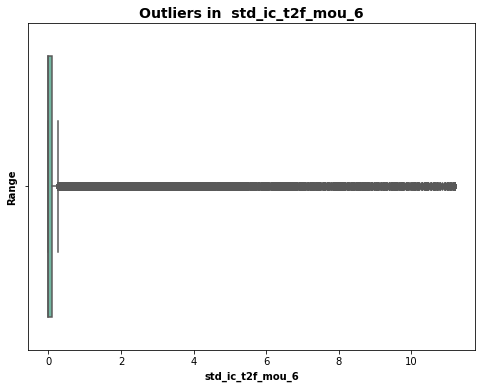

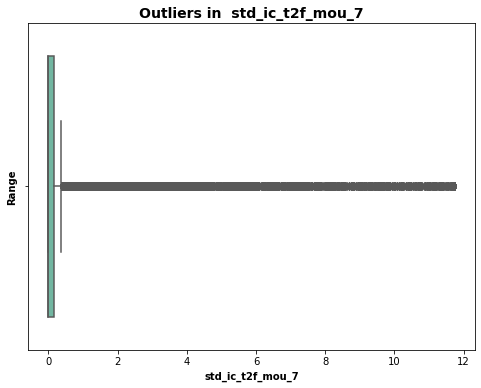

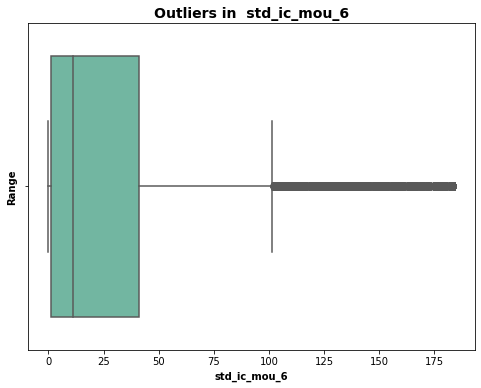

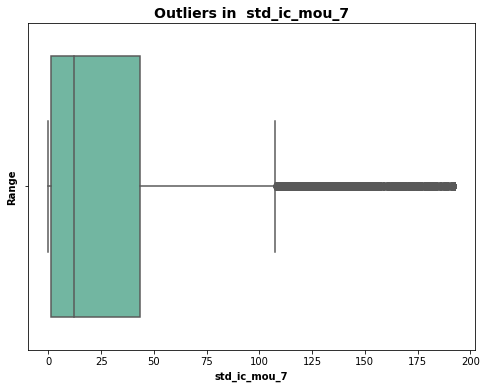

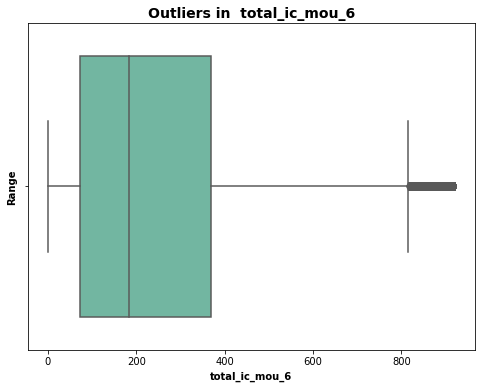

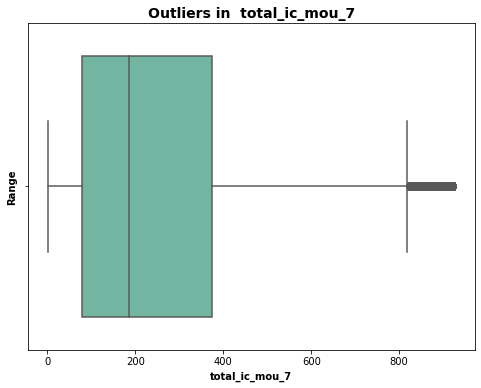

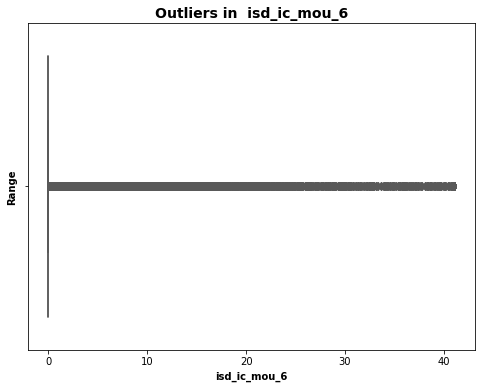

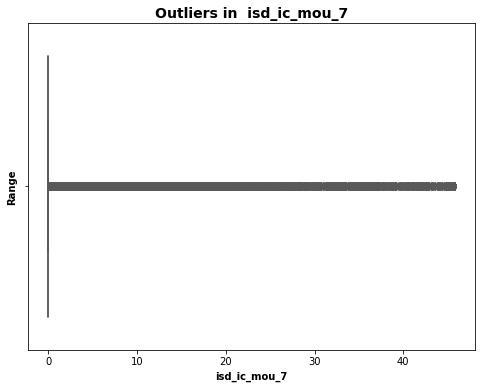

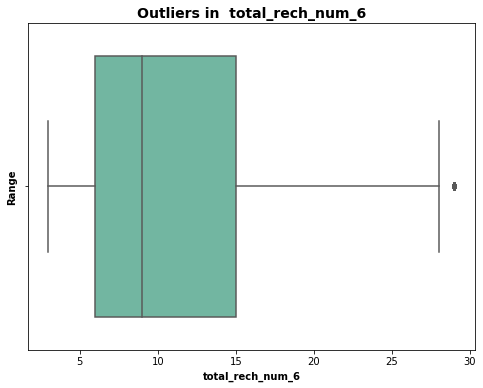

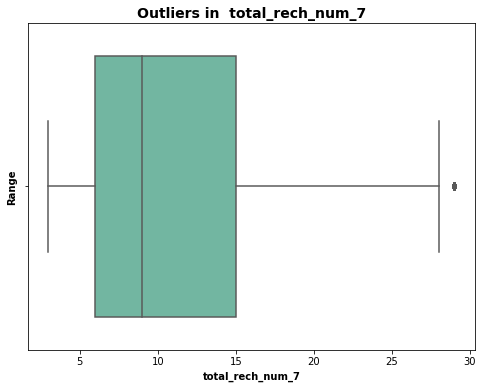

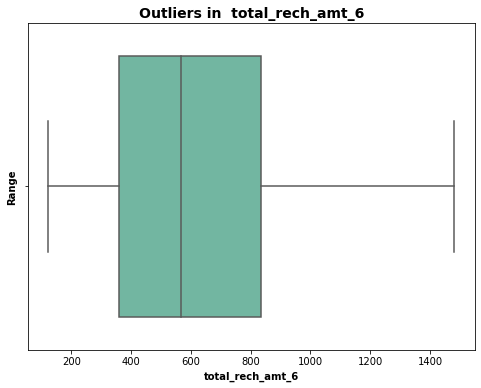

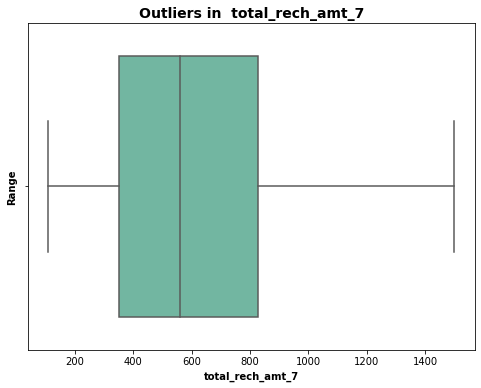

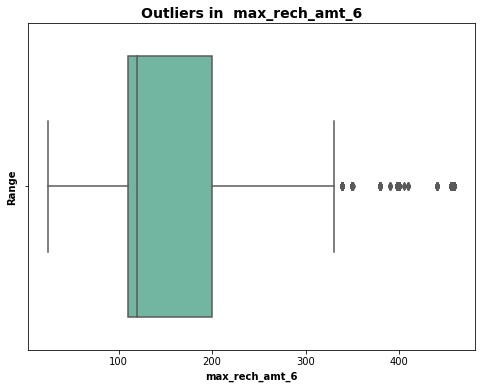

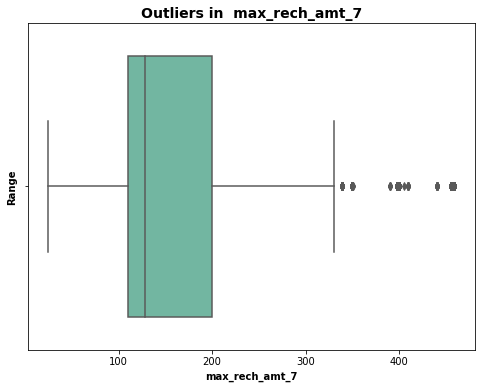

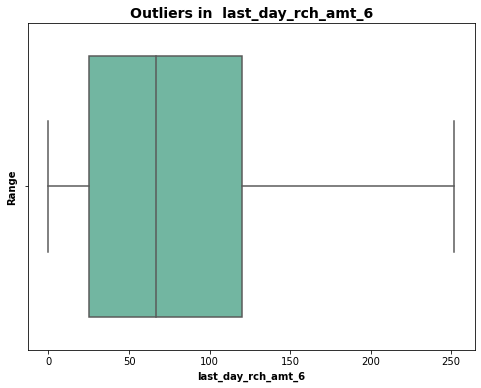

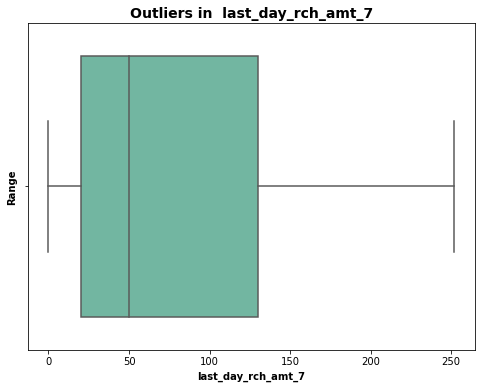

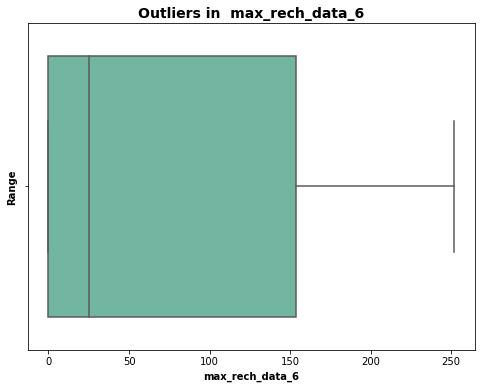

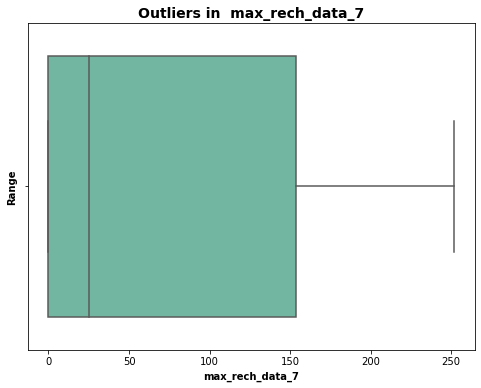

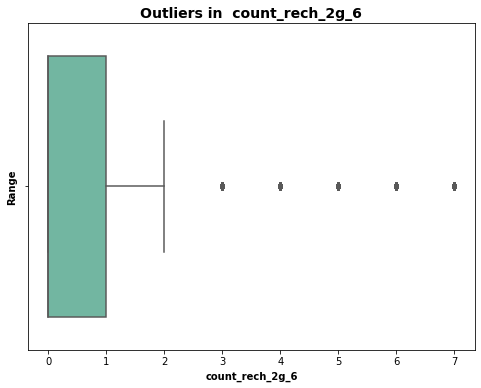

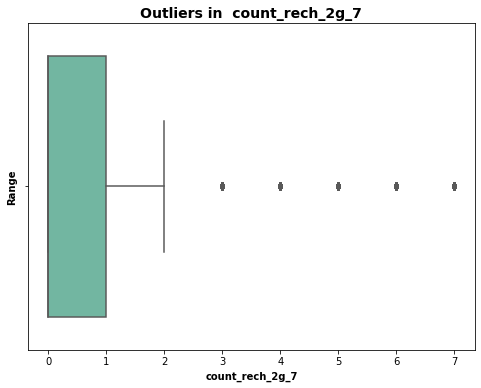

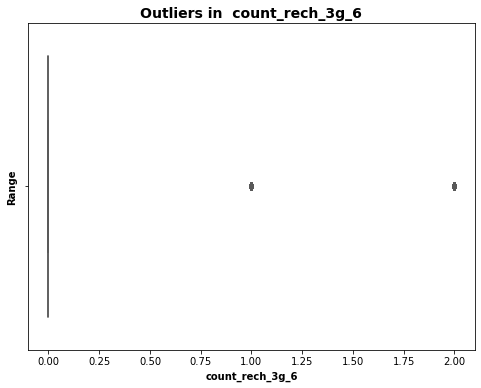

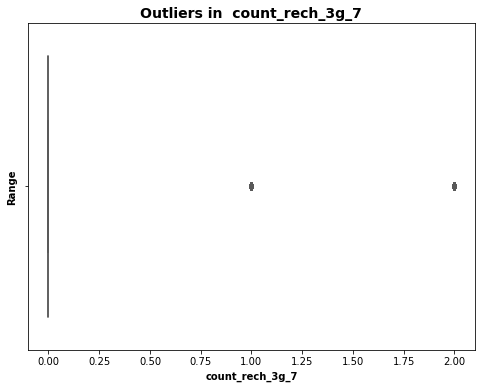

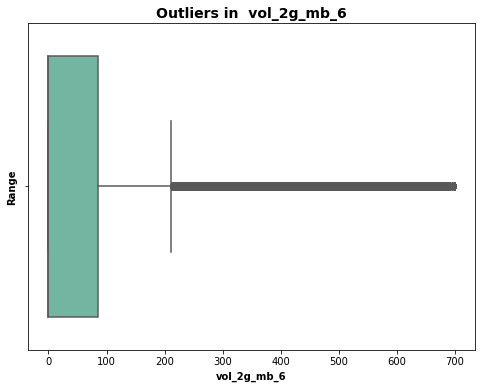

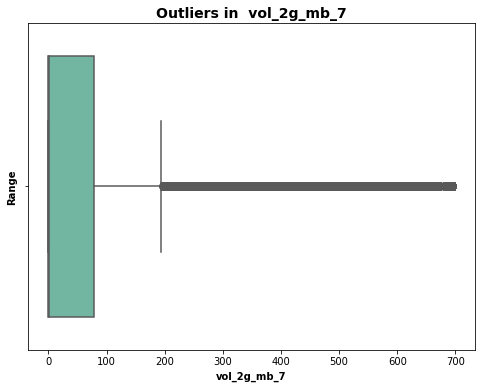

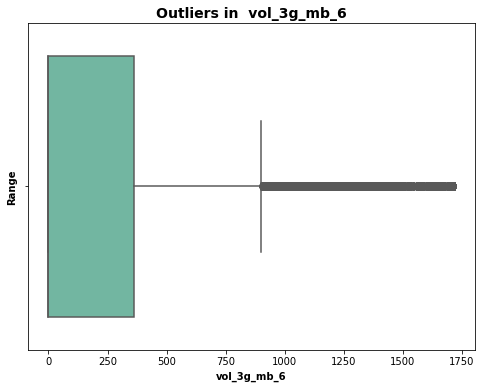

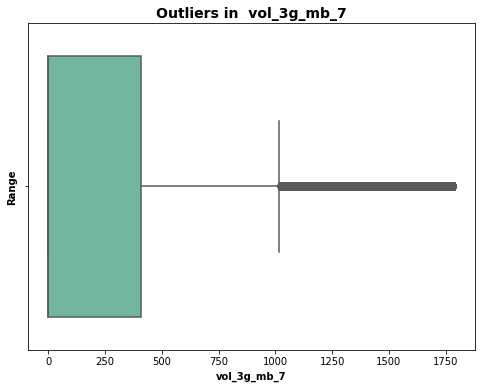

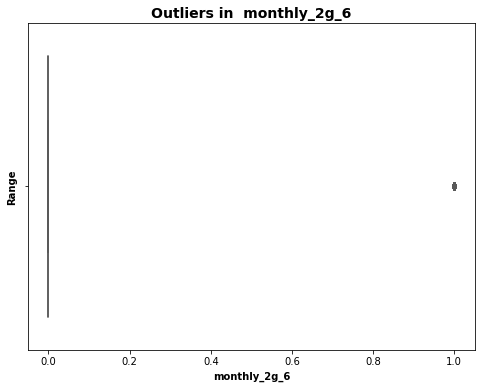

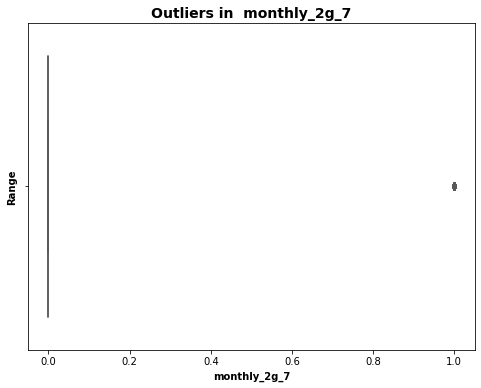

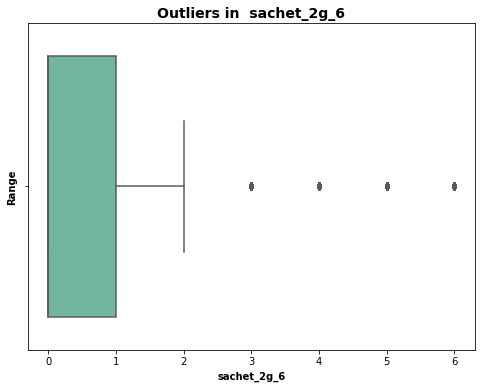

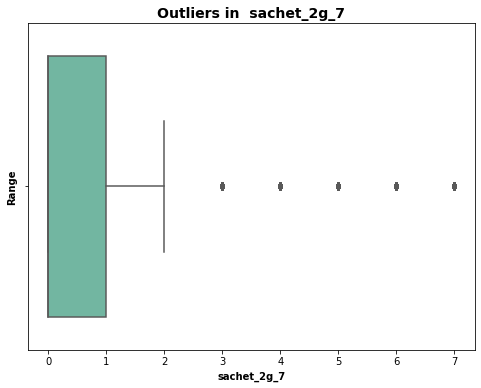

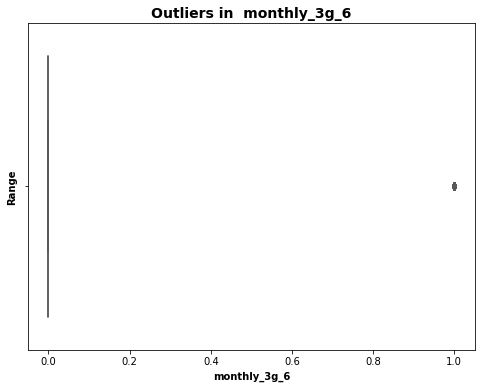

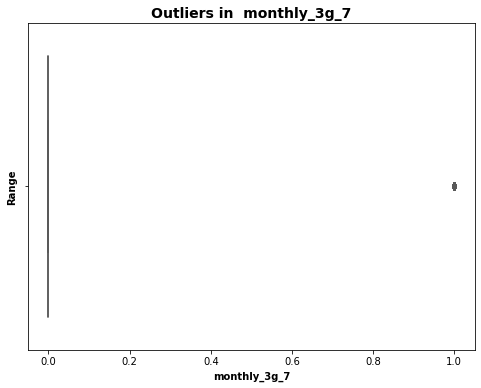

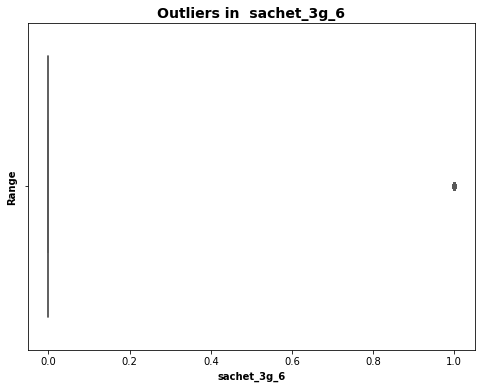

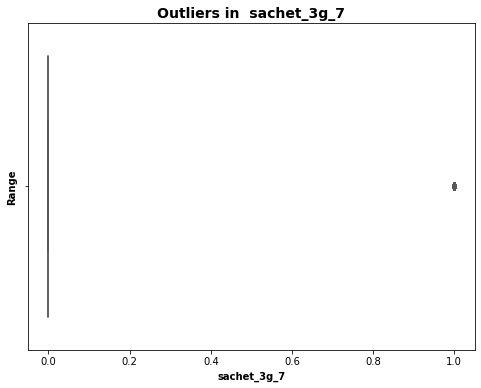

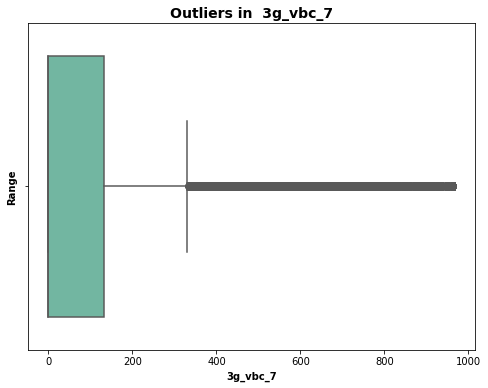

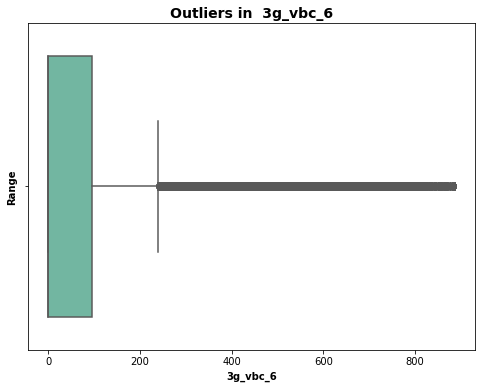

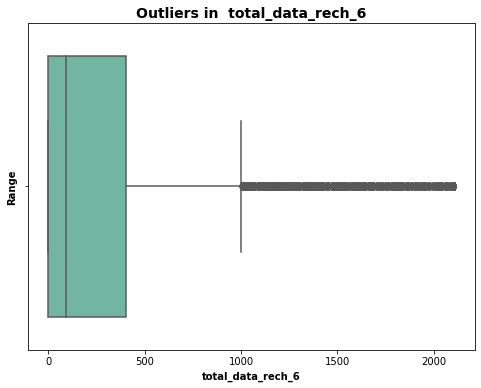

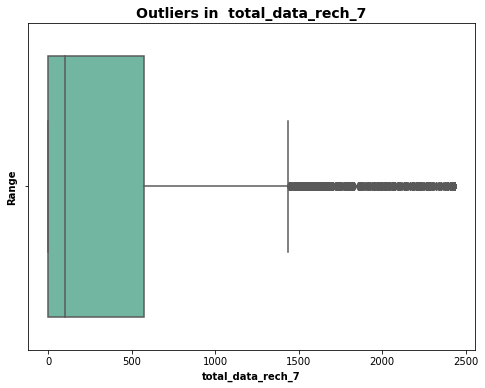

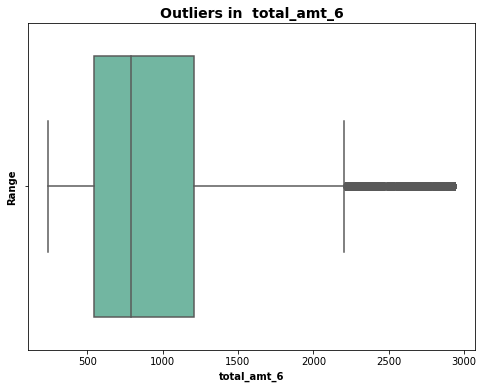

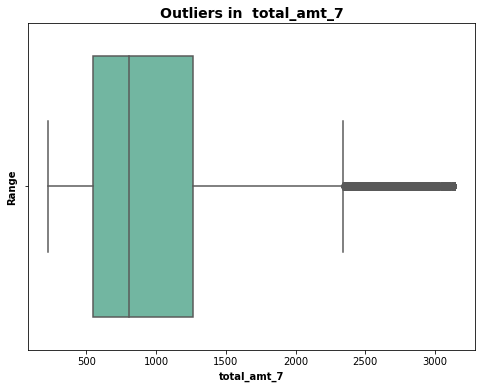

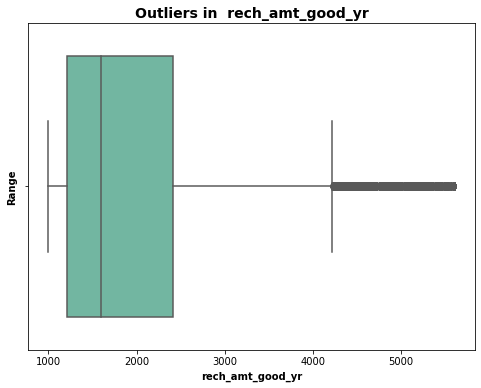

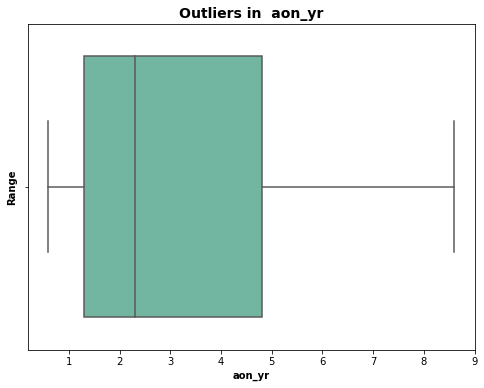

In [117]:
# Cheking whether any Outlier exists or not

for i  in high_val_customers.drop('churn',1).select_dtypes(exclude = 'object').columns:
    plt.figure(figsize =(8,6))
    ax = sns.boxplot(high_val_customers[i], orient="h", palette="Set2", whis = 1.5 )
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers in "+' '+ i, fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

We note that only a small number of extreme values remain after our dataset has been processed for outliers. As handling them beyond this stage will harm our dataset, we have decided to move on with this dataset.

### 4. Data Modeling and Model Evaluation

#### *Data Preparation*

#### 1) Copying data and changing Data type

In [118]:
#Replacing  original data with treated data
high_logreg = high_val_customers.copy()
#changing churn column to numeric
high_logreg.churn= high_logreg.churn.astype("int")


In [119]:
high_logreg.head()

id    arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
4   3500.4   240.708  128.191        21.28         4.83         56.99   
15  3500.4   580.549  377.294        10.43        24.99        317.11   
23  3500.4  1130.948  905.506       859.53       372.71        293.46   
24  3500.4   371.974  352.069        93.18        38.29        531.19   
27  3500.4   390.489  350.985         8.58        11.48        133.16   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4          38.11          53.64            0.0          15.73            0.0   
15        341.79           0.00            0.0           0.00            0.0   
23        450.11           0.00            0.0           0.00            0.0   
24        507.76           0.00            0.0           0.00            0.0   
27        158.73           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16             4.830             36.74             19.88   
15             10.43            24.990            313.76            330.88   
23            318.35           321.622             79.79            424.63   
24             93.18            38.290            159.29            219.44   
27              8.58            11.480             96.91            149.44   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4             11.990              1.23               0.0              9.85   
15             3.260             10.91               0.0              0.00   
23            11.580             25.43               0.0              0.00   
24             0.000              0.00               0.0              0.00   
27            30.318              9.28               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94               0.0               0.0   
15        327.46        366.79               0.0               0.0   
23        915.39        822.78               0.0               0.0   
24        252.48        257.74               0.0               0.0   
27        139.21        170.21               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
15              0.00              0.00               0.0               0.0   
23            202.08              0.00               0.0               0.0   
24            371.89            288.31               0.0               0.0   
27              2.53              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  spl_og_mou_6  spl_og_mou_7  total_og_mou_6  \
4           4.35          0.00          0.00         17.00           63.26   
15          0.00          0.00          0.08          0.00          327.64   
23        202.08          0.00          0.00          0.05         1152.99   
24        371.89        288.31          0.00          0.00          624.38   
27          2.53          0.00          0.00          0.00          141.74   

    total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
4            42.94              5.44              1.39             10.58   
15          366.79             13.86             20.18            219.31   
23          822.83            229.96            117.63            123.78   
24          546.06             52.49             37.84            170.61   
27          170.21             51.74             83.83            129.01   

    loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
4              4.330             5.510              3.63         21.54   
15           500.598             0.000              1.93        233.18   
23           278.490            34.310             52.08        391.38   
24           106.710             0.000

#### 2) Creating dummies for categorical columns


In [120]:
dummies = pd.get_dummies(high_logreg[categorical_columns])
dummies.head()

night_pck_user_6_-1.0  night_pck_user_6_0.0  night_pck_user_6_1.0  \
4                       0                     1                     0   
15                      0                     1                     0   
23                      1                     0                     0   
24                      0                     1                     0   
27                      0                     1                     0   

    night_pck_user_7_-1.0  night_pck_user_7_0.0  night_pck_user_7_1.0  \
4                       0                     1                     0   
15                      1                     0                     0   
23                      1                     0                     0   
24                      0                     1                     0   
27                      0                     1                     0   

    fb_user_6_-1.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_-1.0  \
4                0              0              1               0   
15               0              0              1               1   
23               1              0              0               1   
24               0              1              0               0   
27               0              0              1               0   

    fb_user_7_0.0  fb_user_7_1.0  churn_probability_0  churn_probability_1  \
4               0              1                    1                    0   
15              0              0                    1                    0   
23              0              0                    1                    0   
24              1              0                    1                    0   
27              0              1                    1                    0   

    age_group_1  age_group_2  age_group_3  age_group_4  age_group_5  \
4             1            0            0            0            0   
15            1            0            0            0            0   
23            1            0            0            0            0   
24            0            1            0            0            0   
27            1            0            0            0            0   

    age_group_6  
4             0  
15            0  
23            0  
24            0  
27            0

In [121]:
dummies.shape

(21013, 20)

In [122]:
#Dropping all the night pack & FB user categories wtih -1.0 and age_group 1
cols_to_drop = ['night_pck_user_6_-1.0','night_pck_user_7_-1.0','fb_user_6_-1.0','fb_user_7_-1.0','age_group_1']

dummies.drop(cols_to_drop, axis =1, inplace = True)
dummies.head()

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
4                      1                     0                     1   
15                     1                     0                     0   
23                     0                     0                     0   
24                     1                     0                     1   
27                     1                     0                     1   

    night_pck_user_7_1.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  \
4                      0              0              1              0   
15                     0              0              1              0   
23                     0              0              0              0   
24                     0              1              0              1   
27                     0              0              1              0   

    fb_user_7_1.0  churn_probability_0  churn_probability_1  age_group_2  \
4               1                    1                    0            0   
15              0                    1                    0            0   
23              0                    1                    0            0   
24              0                    1                    0            1   
27              1                    1                    0            0   

    age_group_3  age_group_4  age_group_5  age_group_6  
4             0            0            0            0  
15            0            0            0            0  
23            0            0            0            0  
24            0            0            0            0  
27            0            0            0            0

In [123]:
dummies.shape

(21013, 15)

In [124]:
#concatenating the dummy variables with Original DataFrame
high_logreg = pd.concat([high_logreg,dummies], axis =1)
high_logreg.shape

(21013, 109)

In [125]:
# drop duplicate columns
high_logreg.drop(categorical_columns,axis =1, inplace = True)

high_logreg.shape

(21013, 103)

#### 3) Train Test Split

In [126]:
# Putting response variable to y
y = high_logreg.pop('churn')

# Putting feature variables to X
X = high_logreg.drop('id',1)

In [127]:
X.head()

arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4    240.708  128.191        21.28         4.83         56.99         38.11   
15   580.549  377.294        10.43        24.99        317.11        341.79   
23  1130.948  905.506       859.53       372.71        293.46        450.11   
24   371.974  352.069        93.18        38.29        531.19        507.76   
27   390.489  350.985         8.58        11.48        133.16        158.73   

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4           53.64            0.0          15.73            0.0   
15           0.00            0.0           0.00            0.0   
23           0.00            0.0           0.00            0.0   
24           0.00            0.0           0.00            0.0   
27           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16             4.830             36.74             19.88   
15             10.43            24.990            313.76            330.88   
23            318.35           321.622             79.79            424.63   
24             93.18            38.290            159.29            219.44   
27              8.58            11.480             96.91            149.44   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4             11.990              1.23               0.0              9.85   
15             3.260             10.91               0.0              0.00   
23            11.580             25.43               0.0              0.00   
24             0.000              0.00               0.0              0.00   
27            30.318              9.28               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94               0.0               0.0   
15        327.46        366.79               0.0               0.0   
23        915.39        822.78               0.0               0.0   
24        252.48        257.74               0.0               0.0   
27        139.21        170.21               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
15              0.00              0.00               0.0               0.0   
23            202.08              0.00               0.0               0.0   
24            371.89            288.31               0.0               0.0   
27              2.53              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  spl_og_mou_6  spl_og_mou_7  total_og_mou_6  \
4           4.35          0.00          0.00         17.00           63.26   
15          0.00          0.00          0.08          0.00          327.64   
23        202.08          0.00          0.00          0.05         1152.99   
24        371.89        288.31          0.00          0.00          624.38   
27          2.53          0.00          0.00          0.00          141.74   

    total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
4            42.94              5.44              1.39             10.58   
15          366.79             13.86             20.18            219.31   
23          822.83            229.96            117.63            123.78   
24          546.06             52.49             37.84            170.61   
27          170.21             51.74             83.83            129.01   

    loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
4              4.330             5.510              3.63         21.54   
15           500.598             0.000              1.93        233.18   
23           278.490            34.310             52.08        391.38   
24           106.710             0.000              1.53        223.11   
27        

In [128]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (21013, 101)
Size of response variable dataset is: (21013,)


In [129]:
# Split data into train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14709, 101), (6304, 101), (14709,), (6304,))

Feature scaling

In [131]:
print("Glimpse of Feature variables train dataset - x_train:")
X_train.head()

Glimpse of Feature variables train dataset - x_train:


arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
40575   319.652  303.370       120.83       137.96        171.16   
2066    627.839  291.148        33.13        22.54         97.13   
26125   504.770  300.811        99.73        45.34        685.78   
28847   444.571  425.312        82.68        96.73        797.61   
47182  1051.351  439.122       425.44       279.99        121.83   

       offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
40575        233.49          82.59           25.8          76.46   
2066          53.93           0.00            0.0           0.00   
26125        411.78           0.00            0.0           0.00   
28847        833.76           0.00            0.0           0.00   
47182        145.01           0.00            0.0           0.00   

       roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
40575          13.36             65.44            103.91           125.530   
2066            0.00             33.13             22.54            92.240   
26125           0.00             99.73             45.34           606.082   
28847           0.00             10.53              4.23             9.440   
47182           0.00            171.51            142.71             5.580   

       loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  \
40575            225.43              5.19              0.00              0.34   
2066              43.83              0.00              0.95              0.00   
26125            407.56             19.99              4.21              0.00   
28847             11.28              5.23              3.18              8.94   
47182             42.73              0.38              2.01              0.00   

       loc_og_t2c_mou_7  loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  \
40575              0.63        196.18        329.34             18.66   
2066               4.53        125.38         67.33              0.00   
26125              0.00        781.33        457.13              0.00   
28847              6.86         25.21         18.69             72.14   
47182              0.00        177.48        187.46            253.93   

       std_og_t2t_mou_7  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  \
40575             23.66              0.33              4.44               0.0   
2066               0.00              0.00              0.96               0.0   
26125              0.00              4.18              0.00               0.0   
28847             92.49            775.93            770.09               1.5   
47182            137.28            115.86             99.81               0.0   

       std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  spl_og_mou_6  \
40575               0.0         18.99         28.11          0.34   
2066                0.0          0.00          0.96          5.40   
26125               0.0          4.18          0.00          0.00   
28847               0.0        849.58        862.59         10.94   
47182               0.0        369.79        237.09          0.00   

       spl_og_mou_7  total_og_mou_6  total_og_mou_7  loc_ic_t2t_mou_6  \
40575         0.630          215.53          358.09             56.71   
2066          9.830          130.78           78.13             80.23   
26125         0.000          785.51          457.13             22.79   
28847        30.644          885.74          936.61              0.31   
47182         0.000          548.39          425.01            229.96   

       loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  \
40575           123.910             89.63            127.01             8.610   
2066            163.830            241.88            251.38            73.188   
26125            20.280            233.78            208.01            42.240   
28847             1.300              3.26              3.99             0.000   
47182           231.418              9.09         

In [132]:
num_var = X_train.select_dtypes(exclude='object').drop(dummies.columns,1)
num_col = num_var.columns

In [133]:
## Scaling the train and test data
scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.fit_transform(X_test[num_col])
X_train.head()

arpu_6    arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
40575 -0.717155 -0.769746    -0.358348    -0.307447     -0.515643   
2066   0.304269 -0.810151    -0.634446    -0.658439     -0.728811   
26125 -0.103618 -0.778206    -0.424775    -0.589105      0.966197   
28847 -0.303136 -0.366607    -0.478452    -0.432828      1.288210   
47182  1.707915 -0.320952     0.600626     0.124467     -0.657688   

       offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
40575     -0.335190       3.493890       1.504598       1.638269   
2066      -0.845661      -0.376658      -0.353526      -0.379584   
26125      0.171670      -0.376658      -0.353526      -0.379584   
28847      1.371317      -0.376658      -0.353526      -0.379584   
47182     -0.586730      -0.376658      -0.353526      -0.379584   

       roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
40575       0.138215          0.037595          0.487495         -0.122129   
2066       -0.356715         -0.336979         -0.458439         -0.317562   
26125      -0.356715          0.435123         -0.193387          2.699006   
28847      -0.356715         -0.598983         -0.671295         -0.803648   
47182      -0.356715          1.267277          0.938549         -0.826309   

       loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  \
40575          0.470987          0.097277         -0.531588         -0.273514   
2066          -0.609478         -0.535599         -0.417719         -0.416391   
26125          1.554605          1.902009         -0.026968         -0.416391   
28847         -0.803141          0.102154         -0.150426          3.340439   
47182         -0.616023         -0.489261         -0.290665         -0.416391   

       loc_og_t2c_mou_7  loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  \
40575         -0.190311     -0.124126      0.402593         -0.441733   
2066           1.260020     -0.399551     -0.632953         -0.511071   
26125         -0.424595      2.152212      0.907659         -0.511071   
28847          2.126499     -0.789230     -0.825193         -0.243007   
47182         -0.424595     -0.196873     -0.158161          0.432506   

       std_og_t2t_mou_7  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  \
40575         -0.428181         -0.568198         -0.550156         -0.336449   
2066          -0.512778         -0.569461         -0.562895         -0.336449   
26125         -0.512778         -0.553464         -0.566409         -0.336449   
28847         -0.182079          2.400124          2.252601          0.576763   
47182         -0.021933         -0.126050         -0.201042         -0.336449   

       std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  spl_og_mou_6  \
40575         -0.333169     -0.629422     -0.613034     -0.536602   
2066          -0.333169     -0.669952     -0.668987      0.139418   
26125         -0.333169     -0.661030     -0.670965     -0.582026   
28847         -0.333169      1.143271      1.106714      0.879566   
47182         -0.333169      0.119276     -0.182355     -0.582026   

       spl_og_mou_7  total_og_mou_6  total_og_mou_7  loc_ic_t2t_mou_6  \
40575     -0.544901       -0.654466       -0.406764          0.084985   
2066       0.523245       -0.808515       -0.906305          0.456770   
26125     -0.618046        0.381575       -0.230043         -0.451196   
28847      2.939810        0.563761        0.625508         -0.806542   
47182     -0.618046       -0.049433       -0.287356          2.823584   

       loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  \
40575          1.132718         -0.317687         -0.055760         -0.131848   
2066           1.760195          0.770610          0.849096          3.195069   
26125         -0.496175          0.712711          0.533556          1.600696   
28847         -0.794510         -0.935069         -0.950794         -0.575416   
47182          2.822568         -0.893395   

####  Applying PCA

The exploratory data analysis identified considerable inter-column connection in some columns. This collinearity makes it challenging to comprehend. Principal component analysis is one of the most popular techniques for doing so in the field (PCA). Let's apply PCA to resolve this problem. PCA will also be advantageous for reduced dimensionality.

In [134]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state = 42)

In [135]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [136]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[ 1.77348908e-01,  1.72304661e-01,  1.22107059e-01, ...,
         9.93564098e-03,  7.78161166e-03,  2.77863241e-04],
       [ 4.73772067e-03, -1.22004464e-03, -1.20409146e-01, ...,
         1.80069078e-02,  1.33815096e-02,  7.55640864e-04],
       [ 1.68941217e-01,  1.80518559e-01,  9.20133707e-02, ...,
        -1.26651832e-02, -1.03602753e-02, -1.06899961e-04],
       ...,
       [-1.68840774e-16,  1.62809639e-16,  1.23741549e-16, ...,
        -3.28500514e-16, -3.54648056e-16, -2.14717335e-16],
       [-0.00000000e+00,  5.63994191e-17, -4.08580665e-17, ...,
        -1.02260122e-16,  3.94238323e-17,  8.45680526e-17],
       [ 0.00000000e+00,  4.72083567e-17,  9.46426017e-17, ...,
         1.41157487e-16,  3.26517631e-16,  1.22536691e-16]])

In [137]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([1.559e+01, 1.214e+01, 7.620e+00, 6.610e+00, 4.690e+00, 3.530e+00,
       3.260e+00, 3.180e+00, 2.790e+00, 2.610e+00, 2.320e+00, 1.940e+00,
       1.880e+00, 1.780e+00, 1.710e+00, 1.690e+00, 1.600e+00, 1.430e+00,
       1.330e+00, 1.210e+00, 1.140e+00, 1.100e+00, 1.010e+00, 9.400e-01,
       9.200e-01, 9.000e-01, 8.200e-01, 8.000e-01, 7.400e-01, 6.900e-01,
       6.800e-01, 6.300e-01, 6.000e-01, 5.600e-01, 5.400e-01, 5.400e-01,
       5.100e-01, 4.700e-01, 4.400e-01, 3.900e-01, 3.700e-01, 3.500e-01,
       3.500e-01, 3.400e-01, 3.000e-01, 2.900e-01, 2.900e-01, 2.800e-01,
       2.700e-01, 2.500e-01, 2.400e-01, 2.200e-01, 2.000e-01, 1.900e-01,
       1.800e-01, 1.700e-01, 1.600e-01, 1.600e-01, 1.400e-01, 1.200e-01,
       1.200e-01, 1.200e-01, 1.100e-01, 1.100e-01, 1.000e-01, 1.000e-01,
       9.000e-02, 9.000e-02, 9.000e-02, 8.000e-02, 7.000e-02, 7.000e-02,
       7.000e-02, 6.000e-02, 6.000e-02, 5.000e-02, 4.000e-02, 4.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 

In [138]:
var_cum = np.cumsum(var_ratio)
var_cum

array([ 15.59,  27.73,  35.35,  41.96,  46.65,  50.18,  53.44,  56.62,
        59.41,  62.02,  64.34,  66.28,  68.16,  69.94,  71.65,  73.34,
        74.94,  76.37,  77.7 ,  78.91,  80.05,  81.15,  82.16,  83.1 ,
        84.02,  84.92,  85.74,  86.54,  87.28,  87.97,  88.65,  89.28,
        89.88,  90.44,  90.98,  91.52,  92.03,  92.5 ,  92.94,  93.33,
        93.7 ,  94.05,  94.4 ,  94.74,  95.04,  95.33,  95.62,  95.9 ,
        96.17,  96.42,  96.66,  96.88,  97.08,  97.27,  97.45,  97.62,
        97.78,  97.94,  98.08,  98.2 ,  98.32,  98.44,  98.55,  98.66,
        98.76,  98.86,  98.95,  99.04,  99.13,  99.21,  99.28,  99.35,
        99.42,  99.48,  99.54,  99.59,  99.63,  99.67,  99.7 ,  99.73,
        99.76,  99.79,  99.82,  99.85,  99.87,  99.89,  99.91,  99.93,
        99.95,  99.97,  99.98,  99.99, 100.  , 100.01, 100.02, 100.02,
       100.02, 100.02, 100.02, 100.02, 100.02])

#### Making a scree plot for the explained variance

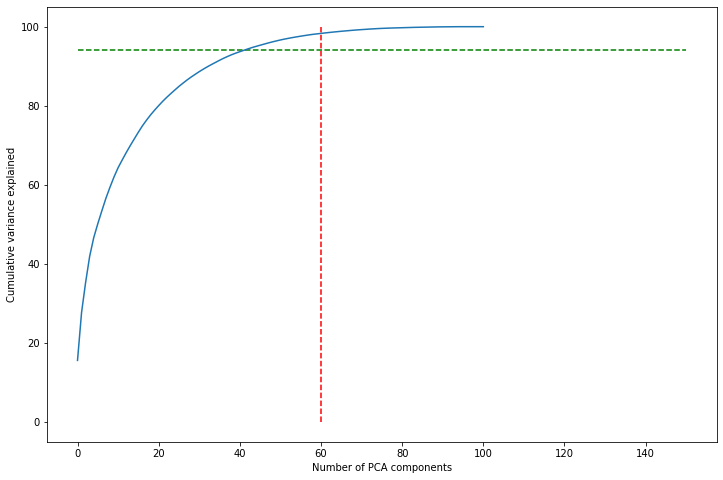

In [139]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=94, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

Looks like 60 components are enough to describe 94% of the variance in the dataset. We'll choose 60 components for our modeling

### Adopting Incremental PCA

Let us Build the dataframe using Incremental PCA for better efficiency.


In [140]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 60)

X_train_pca = pca_final.fit_transform(X_train)

In [141]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (14709, 101)
Size of dataset after PCA is: (14709, 60)


In [142]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.001 , min negative corr:  -0.002


In [143]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(6304, 60)

###  Model Building

Let us now build various models on this PCA Transformed dataset to predict churn

#### Model 1- PCA and Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model.
# default solver is very slow so changed to 'lbfgs'
lr = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [145]:
X_train_pca.shape, y_train.shape

((14709, 60), (14709,))

In [146]:
# Training the model on the data
lr.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [147]:
#prediction on test data
y_pred = lr.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[5449  519]
 [  49  287]]
sensitivity 	 0.85
specificity 	 0.91
area under the curve 	 0.88


#### Hyper Parameter tuning - Logistic Regression

In [148]:
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced")
penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(penalty=penalty,
                  C=C)

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

In [149]:
#model fitting
logreg_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [150]:
# cross validation results
pd.DataFrame(logreg_model.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.004877      0.001882         0.000000        0.000000  0.0001   
1       0.037114      0.003063         0.003637        0.000264  0.0001   
2       0.003570      0.001414         0.000000        0.000000  0.0001   
3       0.002129      0.000163         0.000000        0.000000   0.001   
4       0.054518      0.000689         0.003255        0.000303   0.001   

  param_penalty                                  params  split0_test_score  \
0            l1          {'C': 0.0001, 'penalty': 'l1'}                NaN   
1            l2          {'C': 0.0001, 'penalty': 'l2'}           0.886709   
2    elasticnet  {'C': 0.0001, 'penalty': 'elasticnet'}                NaN   
3            l1           {'C': 0.001, 'penalty': 'l1'}                NaN   
4            l2           {'C': 0.001, 'penalty': 'l2'}           0.931130   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.878620           0.890867           0.899962           0.892542   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4           0.926997           0.941737           0.946113           0.939553   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                9  
1         0.889740        0.007021                8  
2              NaN             NaN               22  
3              NaN             NaN               21  
4         0.937106        0.007021                7

In [151]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.950758930260011
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [152]:
#fitting the model with best parameters
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced", C = logreg_model.best_params_['C'],penalty=logreg_model.best_params_['penalty'])
logreg_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [153]:
#prediction on test data
y_pred = logreg_model.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[5440  528]
 [  45  291]]
sensitivity 	 0.87
specificity 	 0.91
AUC:    	 0.95


#### Model 2- PCA and SVM

In [154]:
X_train_pca.shape, y_train.shape

((14709, 60), (14709,))

In [155]:
# linear model

model_linear = SVC(kernel='linear', class_weight="balanced")
model_linear.fit(X_train_pca, y_train)

# predict
y_pred = model_linear.predict(X_test_pca)

In [156]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9076776649746193 

[[5432  536]
 [  46  290]]


In [157]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf',class_weight="balanced")

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

In [158]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9300444162436549 

[[5596  372]
 [  69  267]]


#### Hyper Parameter tuning for SVC

In [159]:
# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) 

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2],
                     'C': [1, 10]}]


# specify model
model = SVC(class_weight= "balanced",random_state = 100, kernel = 'linear')

# set up GridSearchCV()
model_cv =  GridSearchCV(estimator=model,
                    param_grid=hyper_params,
                         cv = folds,
                    refit = True, verbose = 3,return_train_score=True, n_jobs= -1)   

# fit the model
model_cv.fit(X_train_pca, y_train)                  
               


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=100),
             n_jobs=-1, param_grid=[{'C': [1, 10], 'gamma': [0.1, 0.01]}],
             return_train_score=True, verbose=3)

In [160]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      11.785850      0.491429         0.931546        0.035711       1   
1      12.321287      0.592207         0.925858        0.034906       1   
2      69.997543      2.125142         1.029803        0.056791      10   
3      71.068697      2.167091         0.985601        0.058277      10   

  param_gamma                    params  split0_test_score  split1_test_score  \
0         0.1    {'C': 1, 'gamma': 0.1}           0.911891           0.907404   
1        0.01   {'C': 1, 'gamma': 0.01}           0.911891           0.907404   
2         0.1   {'C': 10, 'gamma': 0.1}           0.911279           0.907404   
3        0.01  {'C': 10, 'gamma': 0.01}           0.911279           0.907404   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.911891         0.910395        0.002115                1   
1           0.911891         0.910395        0.002115                1   
2           0.911687         0.910123        0.001930                3   
3           0.911687         0.910123        0.001930                3   

   split0_train_score  split1_train_score  split2_train_score  \
0             0.92219             0.90414            0.908321   
1             0.92219             0.90414            0.908321   
2             0.92219             0.90414            0.908423   
3             0.92219             0.90414            0.908423   

   mean_train_score  std_train_score  
0          0.911551         0.007715  
1          0.911551         0.007715  
2          0.911585         0.007701  
3          0.911585         0.007701

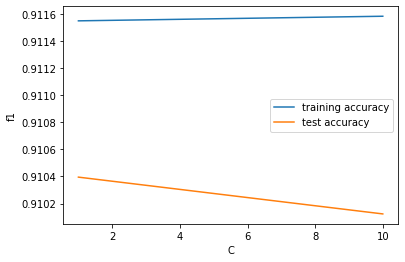

In [161]:
# plotting 'C'

plt.figure()
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_train_score"], 
label="training accuracy")
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_test_score"], 
label="test accuracy")
plt.xlabel('C')
plt.ylabel("f1")
plt.legend()
plt.show()

In [162]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9103949962607927 corresponding to hyperparameters {'C': 1, 'gamma': 0.1}


### 5. Building and Evaluating the Final Model

In [163]:
# model with optimal hyperparameters

# model
model = SVC(C=1, gamma=0.01, class_weight= 'balanced',random_state=100,kernel = 'linear',verbose = 1)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred), "\n")


[LibSVM]..........................................................................................................................................................................................................................................................................................................................................*......................................................................................................................................................................................................................................................................................*....................................................................................................................................................................................................................................................................................................*.........................................................................................

In [164]:
#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[5432  536]
 [  46  290]]
sensitivity 	 0.86
specificity 	 0.91
AUC:    	 0.95


#### Model 3: PCA and Random Forest

#### Default Hyperparameters
Fitting a random forest model with the default hyperparameters will come first.

In [165]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [166]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [167]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [168]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5968
           1       0.80      0.37      0.50       336

    accuracy                           0.96      6304
   macro avg       0.88      0.68      0.74      6304
weighted avg       0.96      0.96      0.95      6304



In [169]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5938   30]
 [ 213  123]]


In [170]:
print(accuracy_score(y_test,predictions))

0.9614530456852792


let's examine the list of hyperparameters that we can adjust to enhance model performance.

#### Hyperparameter Tuning

Let's explore the optimal max depth values and how they impact the ensemble's overall accuracy.

In [171]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9583931528073872
{'max_depth': 17}


In [172]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.043663      0.038561         0.040493        0.002739   
1       5.920362      0.090381         0.046412        0.001860   
2       7.791105      0.445791         0.063085        0.022646   
3       7.675304      0.491845         0.059405        0.005888   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.917403           0.915704   
1               7   {'max_depth': 7}           0.942896           0.938817   
2              12  {'max_depth': 12}           0.950374           0.960571   
3              17  {'max_depth': 17}           0.957512           0.959891   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.906866           0.916044           0.928596         0.916922   
1           0.937797           0.940177           0.950017         0.941941   
2           0.951054           0.950714           0.958518         0.954246   
3           0.956832           0.954453           0.963278         0.958393   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.006927                4            0.919861            0.920795   
1        0.004386                3            0.955724            0.953684   
2        0.004380                2            0.984193            0.983938   
3        0.002995                1            0.993286            0.992861   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.915951            0.919776            0.919697   
1            0.955809            0.955894            0.954113   
2            0.983853            0.985893            0.982920   
3            0.993201            0.993966            0.993372   

   mean_train_score  std_train_score  
0          0.919216         0.001680  
1          0.955045         0.000947  
2          0.984159         0.000968  
3          0.993337         0.000359

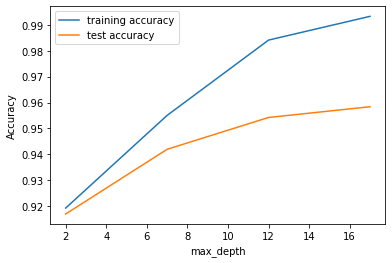

In [173]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can see that as the value of max depth is increased, both the train and test scores rise up to a certain point, but after that, the test score starts to fall. As we raise the max depth, the ensemble tries to overfit.

In order to lessen overfitting in the forest, it is possible to control the depth of the constituent trees.

#### Tuning n_estimators

Let's try to determine the ideal values for n estimators and learn how n estimators' value affects overall accuracy. Keep in mind that we'll set the max depth parameter to a suitable low value to prevent the trees from overfitting.


In [174]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.9347343668628275
{'n_estimators': 600}


In [175]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.713011      0.149249         0.045313        0.002016   
1      23.176265      0.469334         0.241441        0.010032   
2      40.553406      2.443480         0.478878        0.068410   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.933039   
1                600   {'n_estimators': 600}           0.936778   
2               1100  {'n_estimators': 1100}           0.935758   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.930659           0.929300           0.929300           0.943897   
1           0.930320           0.932019           0.932019           0.942537   
2           0.929300           0.933379           0.931339           0.942537   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.933239        0.005501                3            0.934393   
1         0.934734        0.004456                1            0.936177   
2         0.934462        0.004571                2            0.936177   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.939747            0.936517            0.936432   
1            0.938812            0.939237            0.939152   
2            0.938557            0.939322            0.938727   

   split4_train_score  mean_train_score  std_train_score  
0            0.935673          0.936552         0.001770  
1            0.936268          0.937929         0.001401  
2            0.935928          0.937742         0.001405

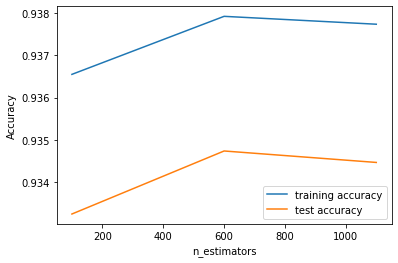

In [176]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

Let's examine how the model's performance varies with max features, the number of features that can be split at a node at most.

In [177]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9331707815453292
{'max_features': 20}


In [178]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.449498      0.272580         0.053695        0.018865   
1       4.267301      0.178678         0.040122        0.001823   
2       7.156842      0.386722         0.041921        0.002567   
3      10.001886      0.283421         0.044987        0.006813   
4      11.642237      1.110382         0.038841        0.004576   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.928960   
1                  8   {'max_features': 8}           0.933039   
2                 14  {'max_features': 14}           0.929300   
3                 20  {'max_features': 20}           0.933039   
4                 24  {'max_features': 24}           0.931339   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.931339           0.930320           0.930999           0.937776   
1           0.926241           0.933039           0.929980           0.940496   
2           0.927940           0.931679           0.928960           0.942537   
3           0.927600           0.933719           0.929300           0.942197   
4           0.926920           0.931339           0.926241           0.942537   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.931879        0.003059                4            0.936092   
1         0.932559        0.004691                2            0.935498   
2         0.932083        0.005368                3            0.933458   
3         0.933171        0.005056                1            0.934733   
4         0.931675        0.005837                5            0.933458   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.937027            0.937282            0.935243   
1            0.936857            0.935413            0.935498   
2            0.935328            0.935328            0.936262   
3            0.935753            0.937112            0.936092   
4            0.934988            0.935583            0.935073   

   split4_train_score  mean_train_score  std_train_score  
0            0.933209          0.935771         0.001470  
1            0.930999          0.934853         0.002001  
2            0.932954          0.934666         0.001250  
3            0.932954          0.935329         0.001410  
4            0.932274          0.934275         0.001227

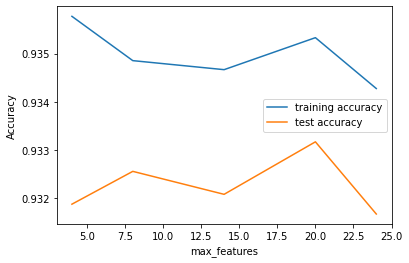

In [179]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase max features, both the training and test scores seem to rise, and the model doesn't appear to overfit any more.

#### Tuning min_samples_leaf

The minimum number of samples needed to be at a leaf node is indicated by the hyperparameter min samples leaf:

- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Now let's look at the ideal value for the minimum samples leaf in our situation.

In [180]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.9284119521678438
{'min_samples_leaf': 100}


In [181]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.968212      0.245029         0.048820        0.001737   
1       5.690928      0.266841         0.050081        0.001921   
2       5.234760      0.144625         0.047496        0.001757   
3       4.949741      0.193313         0.048617        0.001789   
4       4.770936      0.264201         0.047844        0.003118   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.932019   
1                    150  {'min_samples_leaf': 150}           0.927600   
2                    200  {'min_samples_leaf': 200}           0.919103   
3                    250  {'min_samples_leaf': 250}           0.914004   
4                    300  {'min_samples_leaf': 300}           0.909245   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.918083           0.926581           0.925561           0.939816   
1           0.916044           0.924201           0.921482           0.936416   
2           0.908566           0.918423           0.916723           0.934716   
3           0.908906           0.916383           0.913664           0.931656   
4           0.903467           0.910265           0.906526           0.931656   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.928412        0.007228                1            0.932863   
1         0.925149        0.006785                2            0.929464   
2         0.919506        0.008487                3            0.924280   
3         0.916923        0.007756                4            0.920201   
4         0.912232        0.009995                5            0.917226   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.931843            0.933798            0.937197   
1            0.929039            0.929634            0.931163   
2            0.922920            0.924450            0.925300   
3            0.923430            0.921475            0.922835   
4            0.919521            0.913827            0.918671   

   split4_train_score  mean_train_score  std_train_score  
0            0.931849          0.933510         0.001982  
1            0.926920          0.929244         0.001366  
2            0.921822          0.923754         0.001231  
3            0.917743          0.921137         0.002032  
4            0.915194          0.916888         0.002120

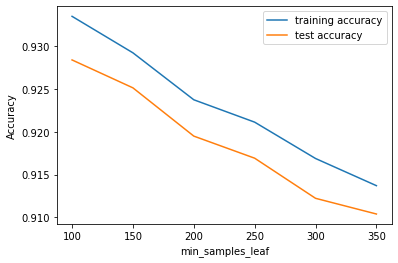

In [182]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts of overfit as you decrease the value of min_samples_leaf.

#### Tuning min_samples_split
Let's now look at the performance of the ensemble as we vary min_samples_split

In [183]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.9355499072976329
{'min_samples_split': 200}


In [184]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.448866      0.238883         0.053472        0.003402   
1       7.367861      0.338646         0.051242        0.002544   
2       6.968513      0.215057         0.050465        0.002416   
3       7.002905      0.527687         0.049128        0.002431   
4       6.728118      0.250125         0.048710        0.000648   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.939837   
1                     250  {'min_samples_split': 250}           0.932359   
2                     300  {'min_samples_split': 300}           0.930320   
3                     350  {'min_samples_split': 350}           0.927940   
4                     400  {'min_samples_split': 400}           0.927600   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.930659           0.934058           0.934058           0.939136   
1           0.921482           0.930999           0.930320           0.940496   
2           0.917743           0.928960           0.926581           0.937776   
3           0.918763           0.925561           0.922842           0.937436   
4           0.919443           0.925221           0.919443           0.936756   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.935550        0.003453                1            0.941531   
1         0.931131        0.006050                2            0.937962   
2         0.928276        0.006461                3            0.935668   
3         0.926508        0.006258                4            0.932098   
4         0.925693        0.006394                5            0.930399   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.944761            0.945101            0.945101   
1            0.938132            0.942211            0.942296   
2            0.935158            0.939237            0.937197   
3            0.934053            0.934478            0.935583   
4            0.932863            0.933288            0.931588   

   split4_train_score  mean_train_score  std_train_score  
0            0.942216          0.943742         0.001546  
1            0.936778          0.939476         0.002316  
2            0.933124          0.936077         0.002048  
3            0.930065          0.933255         0.001953  
4            0.927260          0.931080         0.002162

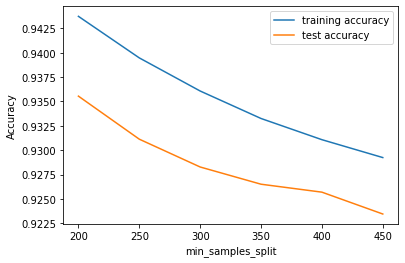

In [185]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [186]:
#Note: The Below GridSearch Step will take almost 30-35 mins to run.
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [187]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [188]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9481949826636753 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [189]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)


In [190]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=200,
                       random_state=100)

In [191]:
# predict
predictions = rfc.predict(X_test_pca)

In [192]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5968
           1       0.43      0.81      0.56       336

    accuracy                           0.93      6304
   macro avg       0.71      0.88      0.76      6304
weighted avg       0.96      0.93      0.94      6304



In [193]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[5603  365]
 [  63  273]]
sensitivity 	 0.81
specificity 	 0.94
AUC:    	 0.95


###  Final Model Selection

The most crucial business statistic for the telecom churn issue is recall. The company would like to identify the bulk of its customers, even if many of them are incorrectly classified as churning. The expense of churning is much more for the company than a few false positives.



a) Logistic Regression
- Sensitivity/Recall  - .85
- Specificity         - .91
- Roc AUC Score       - .93

b) SMV
- Sensitivity/Recall  - .83
- Specificity         - .92
- Roc AUC Score       - .93


c) Random Forest
- Sensitivity/Recall  - .80
- Specificity         - .93
- Roc AUC Score       - .93

#### Inference

Out of all the models mentioned above, we opt for logistic regression because it requires less memory and has a lower time complexity. Furthermore, it has excellent sensitivity, which is our top priority in this case study.

### Interpretable models

Now let's create models to find the indicators of churn. Recognizing these churn indications will aid in keeping clients who are likely to leave.

In [194]:
# create a copy of dataset
high_df = high_val_customers.copy()
high_df.head()


id    arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
4   3500.4   240.708  128.191        21.28         4.83         56.99   
15  3500.4   580.549  377.294        10.43        24.99        317.11   
23  3500.4  1130.948  905.506       859.53       372.71        293.46   
24  3500.4   371.974  352.069        93.18        38.29        531.19   
27  3500.4   390.489  350.985         8.58        11.48        133.16   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4          38.11          53.64            0.0          15.73            0.0   
15        341.79           0.00            0.0           0.00            0.0   
23        450.11           0.00            0.0           0.00            0.0   
24        507.76           0.00            0.0           0.00            0.0   
27        158.73           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16             4.830             36.74             19.88   
15             10.43            24.990            313.76            330.88   
23            318.35           321.622             79.79            424.63   
24             93.18            38.290            159.29            219.44   
27              8.58            11.480             96.91            149.44   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4             11.990              1.23               0.0              9.85   
15             3.260             10.91               0.0              0.00   
23            11.580             25.43               0.0              0.00   
24             0.000              0.00               0.0              0.00   
27            30.318              9.28               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94               0.0               0.0   
15        327.46        366.79               0.0               0.0   
23        915.39        822.78               0.0               0.0   
24        252.48        257.74               0.0               0.0   
27        139.21        170.21               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
15              0.00              0.00               0.0               0.0   
23            202.08              0.00               0.0               0.0   
24            371.89            288.31               0.0               0.0   
27              2.53              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  spl_og_mou_6  spl_og_mou_7  total_og_mou_6  \
4           4.35          0.00          0.00         17.00           63.26   
15          0.00          0.00          0.08          0.00          327.64   
23        202.08          0.00          0.00          0.05         1152.99   
24        371.89        288.31          0.00          0.00          624.38   
27          2.53          0.00          0.00          0.00          141.74   

    total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
4            42.94              5.44              1.39             10.58   
15          366.79             13.86             20.18            219.31   
23          822.83            229.96            117.63            123.78   
24          546.06             52.49             37.84            170.61   
27          170.21             51.74             83.83            129.01   

    loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
4              4.330             5.510              3.63         21.54   
15           500.598             0.000              1.93        233.18   
23           278.490            34.310             52.08        391.38   
24           106.710             0.000

#### Data Preparation

#### Let us drop highly correlated features

a) 2G data recharge in the month of june

<AxesSubplot:>

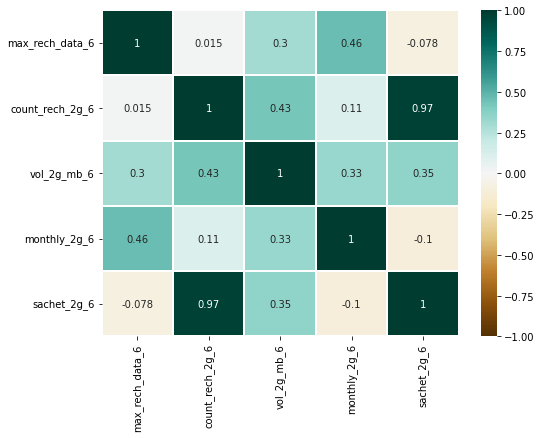

In [195]:
col_2g_6 = ['max_rech_data_6','count_rech_2g_6','vol_2g_mb_6','monthly_2g_6','sachet_2g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that count_rech_2g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [196]:
high_df.drop('count_rech_2g_6',1,inplace = True)

b) 2G data recharge in the month of july



<AxesSubplot:>

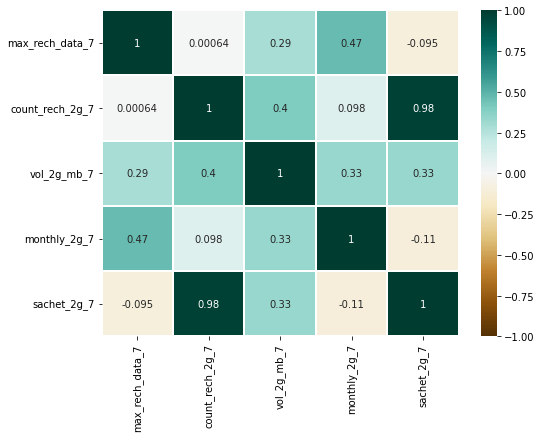

In [197]:
col_2g_7 = ['max_rech_data_7','count_rech_2g_7','vol_2g_mb_7','monthly_2g_7','sachet_2g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that count_rech_2g_7 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [198]:
high_df.drop('count_rech_2g_7',1,inplace = True)


c) 3G data recharge in the month of june

<AxesSubplot:>

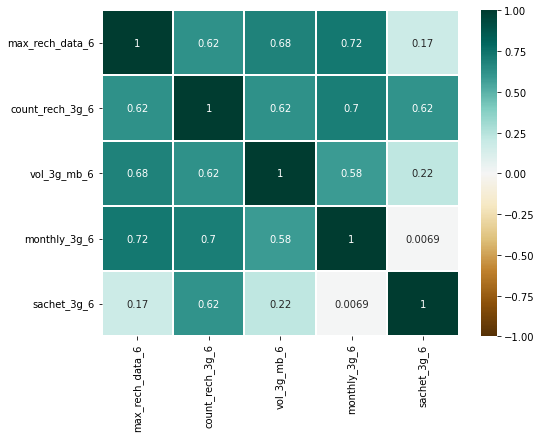

In [199]:
col_3g_6 = ['max_rech_data_6','count_rech_3g_6','vol_3g_mb_6','monthly_3g_6','sachet_3g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that count_rech_3g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [200]:
high_df.drop('count_rech_3g_6',1,inplace = True)


d) 3G data recharge in the month of july



<AxesSubplot:>

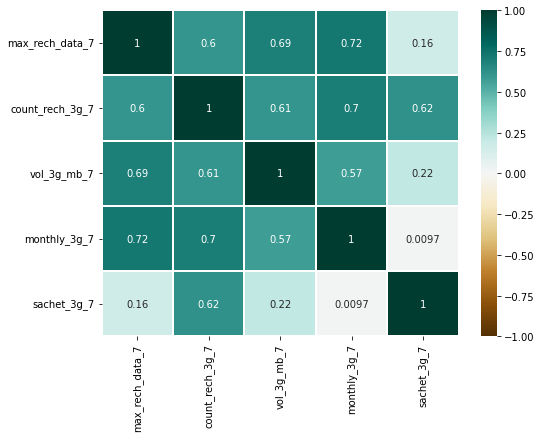

In [201]:
col_3g_7 = ['max_rech_data_7','count_rech_3g_7','vol_3g_mb_7','monthly_3g_7','sachet_3g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)


We observe that count_rech_3g_7 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [202]:
high_df.drop('count_rech_3g_7',1,inplace = True)


e) Total outgoing calls made in the month of june

<AxesSubplot:>

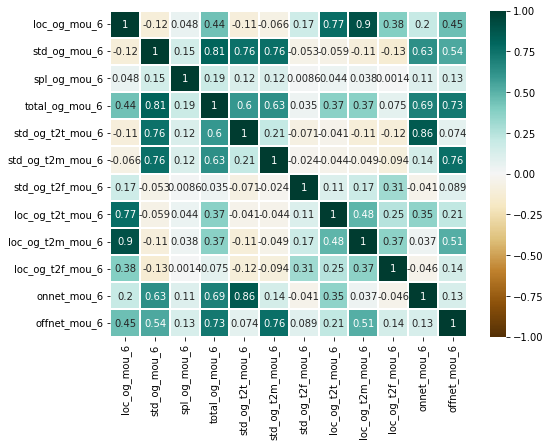

In [203]:
og_col_6 = ['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','total_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','onnet_mou_6','offnet_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that loc_og_mou_6, std_og_mou_6 tot, l_og_mou_6, onnet_7 & offnet_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [204]:
high_df.drop(['loc_og_mou_6', 'std_og_mou_6','total_og_mou_6','offnet_mou_6','onnet_mou_6'],1,inplace=True)


f) Total outgoing calls made in the month of july



<AxesSubplot:>

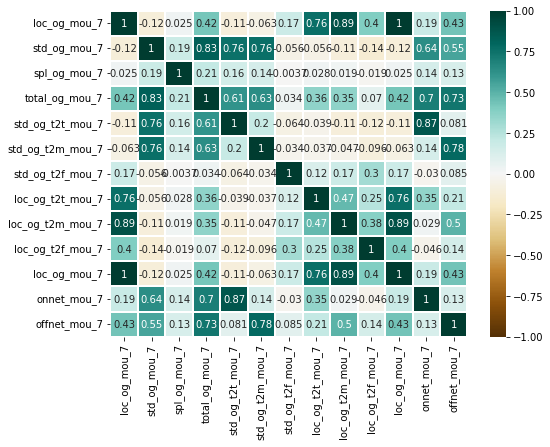

In [205]:
og_col_7 = ['loc_og_mou_7','std_og_mou_7','spl_og_mou_7','total_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7','onnet_mou_7','offnet_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that loc_og_mou_7, std_og_mou_7 and total_og_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [206]:
high_df.drop(['loc_og_mou_7', 'std_og_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7'],1,inplace=True)


g) Total incoming calls made in the month of june

<AxesSubplot:>

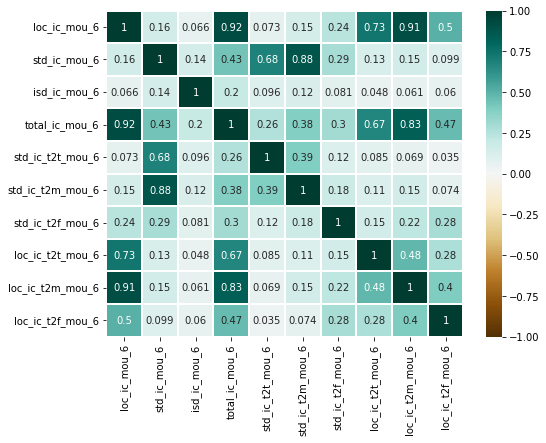

In [207]:
ic_col_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','total_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that loc_ic_mou_6, std_ic_mou_6 and total_ic_mou_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [208]:
high_df.drop(['loc_ic_mou_6', 'std_ic_mou_6','total_ic_mou_6'],1,inplace=True)


h) Total incoming calls made in the month of july



<AxesSubplot:>

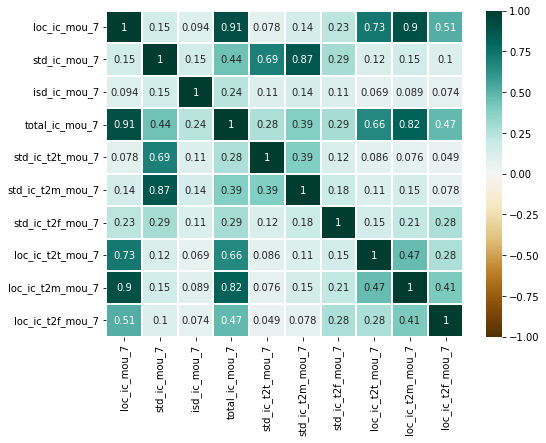

In [209]:
ic_col_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','total_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)


We observe that loc_ic_mou_7, std_ic_mou_7 and total_ic_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [210]:
high_df.drop(['loc_ic_mou_7', 'std_ic_mou_7','total_ic_mou_7'],1,inplace=True)


In [211]:
# Let us also drop age_group from our dataset as aon_year & age_group are highly correlated.
high_df.drop('age_group',1,inplace=True)

In [212]:
# The shape of final dataset

print("The shape of final dataset is :",high_df.shape)

The shape of final dataset is : (21013, 73)


In [213]:
high_df.head()


id    arpu_6   arpu_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
4   3500.4   240.708  128.191          53.64            0.0          15.73   
15  3500.4   580.549  377.294           0.00            0.0           0.00   
23  3500.4  1130.948  905.506           0.00            0.0           0.00   
24  3500.4   371.974  352.069           0.00            0.0           0.00   
27  3500.4   390.489  350.985           0.00            0.0           0.00   

    roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
4             0.0             10.16             4.830             36.74   
15            0.0             10.43            24.990            313.76   
23            0.0            318.35           321.622             79.79   
24            0.0             93.18            38.290            159.29   
27            0.0              8.58            11.480             96.91   

    loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  \
4              19.88            11.990              1.23               0.0   
15            330.88             3.260             10.91               0.0   
23            424.63            11.580             25.43               0.0   
24            219.44             0.000              0.00               0.0   
27            149.44            30.318              9.28               0.0   

    loc_og_t2c_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
4               9.85               0.0               0.0              4.35   
15              0.00               0.0               0.0              0.00   
23              0.00               0.0               0.0            202.08   
24              0.00               0.0               0.0            371.89   
27              0.00               0.0               0.0              2.53   

    std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  spl_og_mou_6  \
4               0.00               0.0               0.0          0.00   
15              0.00               0.0               0.0          0.08   
23              0.00               0.0               0.0          0.00   
24            288.31               0.0               0.0          0.00   
27              0.00               0.0               0.0          0.00   

    spl_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
4          17.00              5.44              1.39             10.58   
15          0.00             13.86             20.18            219.31   
23          0.05            229.96            117.63            123.78   
24          0.00             52.49             37.84            170.61   
27          0.00             51.74             83.83            129.01   

    loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  std_ic_t2t_mou_6  \
4              4.330             5.510              3.63               0.0   
15           500.598             0.000              1.93               0.0   
23           278.490            34.310             52.08               0.0   
24           106.710             0.000              1.53               0.0   
27           214.490            73.188             67.69               0.0   

    std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
4                0.0              0.00              0.00              0.00   
15               0.0              0.00              0.00              0.00   
23               0.0            118.15              0.00              0.00   
24               0.0              6.96              9.54              0.00   
27               0.0              0.00              0.00             11.18   

    std_ic_t2f_mou_7  isd_ic_mou_6  isd_ic_mou_7  total_rech_num_6  \
4               0.00           0.0           0.0              13.0   
15              1.03           0.0           0.0               5.0   
23              0.00           0.0           0.0              26.0   
24              0.00           0.0        

#### Encoding categorical variables

In [214]:
# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = high_df.select_dtypes(include=['object'])
df_categorical.drop('churn',1).head()

night_pck_user_6 night_pck_user_7 fb_user_6 fb_user_7 churn_probability
4               0.0              0.0       1.0       1.0                 0
15              0.0             -1.0       1.0      -1.0                 0
23             -1.0             -1.0      -1.0      -1.0                 0
24              0.0              0.0       0.0       0.0                 0
27              0.0              0.0       1.0       1.0                 0

In [215]:
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

night_pck_user_6  night_pck_user_7  fb_user_6  fb_user_7  \
4                  1                 1          2          2   
15                 1                 0          2          0   
23                 0                 0          0          0   
24                 1                 1          1          1   
27                 1                 1          2          2   

    churn_probability  churn  
4                   0      0  
15                  0      0  
23                  0      0  
24                  0      0  
27                  0      0

In [216]:
# concat df_categorical with original df
high_df = high_df.drop(df_categorical.columns, axis=1)

high_df = pd.concat([high_df, df_categorical], axis=1)
high_df.head()

id    arpu_6   arpu_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
4   3500.4   240.708  128.191          53.64            0.0          15.73   
15  3500.4   580.549  377.294           0.00            0.0           0.00   
23  3500.4  1130.948  905.506           0.00            0.0           0.00   
24  3500.4   371.974  352.069           0.00            0.0           0.00   
27  3500.4   390.489  350.985           0.00            0.0           0.00   

    roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
4             0.0             10.16             4.830             36.74   
15            0.0             10.43            24.990            313.76   
23            0.0            318.35           321.622             79.79   
24            0.0             93.18            38.290            159.29   
27            0.0              8.58            11.480             96.91   

    loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  \
4              19.88            11.990              1.23               0.0   
15            330.88             3.260             10.91               0.0   
23            424.63            11.580             25.43               0.0   
24            219.44             0.000              0.00               0.0   
27            149.44            30.318              9.28               0.0   

    loc_og_t2c_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
4               9.85               0.0               0.0              4.35   
15              0.00               0.0               0.0              0.00   
23              0.00               0.0               0.0            202.08   
24              0.00               0.0               0.0            371.89   
27              0.00               0.0               0.0              2.53   

    std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  spl_og_mou_6  \
4               0.00               0.0               0.0          0.00   
15              0.00               0.0               0.0          0.08   
23              0.00               0.0               0.0          0.00   
24            288.31               0.0               0.0          0.00   
27              0.00               0.0               0.0          0.00   

    spl_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
4          17.00              5.44              1.39             10.58   
15          0.00             13.86             20.18            219.31   
23          0.05            229.96            117.63            123.78   
24          0.00             52.49             37.84            170.61   
27          0.00             51.74             83.83            129.01   

    loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  std_ic_t2t_mou_6  \
4              4.330             5.510              3.63               0.0   
15           500.598             0.000              1.93               0.0   
23           278.490            34.310             52.08               0.0   
24           106.710             0.000              1.53               0.0   
27           214.490            73.188             67.69               0.0   

    std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
4                0.0              0.00              0.00              0.00   
15               0.0              0.00              0.00              0.00   
23               0.0            118.15              0.00              0.00   
24               0.0              6.96              9.54              0.00   
27               0.0              0.00              0.00             11.18   

    std_ic_t2f_mou_7  isd_ic_mou_6  isd_ic_mou_7  total_rech_num_6  \
4               0.00           0.0           0.0              13.0   
15              1.03           0.0           0.0               5.0   
23              0.00           0.0           0.0              26.0   
24              0.00           0.0        

### Model Building 

Finding critical predictor features that aid in the understanding of churn indicators is the major goal of these models' construction.
#### MODEL 1 - Tree Model Regression

In [217]:
high_tree = high_df.copy()


In [218]:
# Putting response variable to y
y = high_tree.pop('churn')

# Putting feature variables to X
X = high_tree

In [219]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)


Size of Feature variables dataset is: (21013, 72)
Size of response variable dataset is: (21013,)


In [220]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

id    arpu_6   arpu_7  roam_ic_mou_6  roam_ic_mou_7  \
40575  40575.0   319.652  303.370          82.59           25.8   
2066    3500.4   627.839  291.148           0.00            0.0   
26125  26125.0   504.770  300.811           0.00            0.0   
28847  28847.0   444.571  425.312           0.00            0.0   
47182  47182.0  1051.351  439.122           0.00            0.0   

       roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
40575          76.46          13.36             65.44            103.91   
2066            0.00           0.00             33.13             22.54   
26125           0.00           0.00             99.73             45.34   
28847           0.00           0.00             10.53              4.23   
47182           0.00           0.00            171.51            142.71   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
40575           125.530            225.43              5.19              0.00   
2066             92.240             43.83              0.00              0.95   
26125           606.082            407.56             19.99              4.21   
28847             9.440             11.28              5.23              3.18   
47182             5.580             42.73              0.38              2.01   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
40575              0.34              0.63             18.66             23.66   
2066               0.00              4.53              0.00              0.00   
26125              0.00              0.00              0.00              0.00   
28847              8.94              6.86             72.14             92.49   
47182              0.00              0.00            253.93            137.28   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
40575              0.33              4.44               0.0               0.0   
2066               0.00              0.96               0.0               0.0   
26125              4.18              0.00               0.0               0.0   
28847            775.93            770.09               1.5               0.0   
47182            115.86             99.81               0.0               0.0   

       spl_og_mou_6  spl_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
40575          0.34         0.630             56.71           123.910   
2066           5.40         9.830             80.23           163.830   
26125          0.00         0.000             22.79            20.280   
28847         10.94        30.644              0.31             1.300   
47182          0.00         0.000            229.96           231.418   

       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
40575             89.63            127.01             8.610              1.39   
2066             241.88            251.38            73.188             74.25   
26125            233.78            208.01            42.240              4.54   
28847              3.26              3.99             0.000              8.55   
47182              9.09             19.36             0.000              2.43   

       std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
40575             0.810              1.76              1.51              4.49   
2066              0.000              0.00              1.96              6.95   
26125             0.000              0.00              0.75              2.35   
28847             1.080              3.63              0.00              0.95   
47182            57.992             27.31             11.11              6.61   

       std_ic_t2f_mou_6  std_ic_t2f_mou_7  isd_ic_mou_6  isd_ic_mou_7  \
40575              0.00              0.00           0.0          0.00   
2066              11.18             11.73           0.0          0.00   
26125              1.54              0.40           0.0          

#### Decision tree with default parameters

In [221]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [222]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5968
           1       0.51      0.53      0.52       336

    accuracy                           0.95      6304
   macro avg       0.74      0.75      0.75      6304
weighted avg       0.95      0.95      0.95      6304



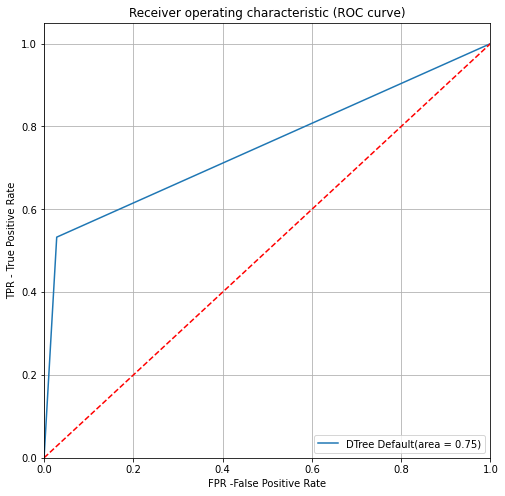

Area under curve is: 0.75
Recall for our model is: 0.53
Accuracy on test set is: 0.95
Confusion matrix for our model is: [[5799  169]
 [ 157  179]]


In [223]:
import sklearn.metrics as metrics 

# Plotting AUC curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default, drop_intermediate =True)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='DTree Default(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR -False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

#### Hyperparameter Tuning

The results of default tree are quite poor, and we need to improve it by tuning the hyperparameters.

##### Tuning max_depth



In [224]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10,1)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="recall",return_train_score=True, n_jobs=-1, 
                    error_score = 'raise',verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9566634002939736
{'max_depth': 2}


In [225]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.071112      0.002386         0.006035        0.000781   
1       0.123198      0.002922         0.005566        0.000073   
2       0.176955      0.003121         0.005768        0.000377   
3       0.227995      0.003280         0.005747        0.000208   
4       0.312661      0.012134         0.005723        0.000165   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.726115           0.802548   
1               2  {'max_depth': 2}           0.942675           0.961783   
2               3  {'max_depth': 3}           0.923567           0.955414   
3               4  {'max_depth': 4}           0.917197           0.949045   
4               5  {'max_depth': 5}           0.904459           0.898089   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.732484           0.707006           0.794872         0.752605   
1           0.949045           0.949045           0.980769         0.956663   
2           0.898089           0.936306           0.916667         0.926008   
3           0.904459           0.929936           0.897436         0.919615   
4           0.866242           0.904459           0.871795         0.889009   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.038643                9            0.759171            0.740032   
1        0.013558                1            0.966507            0.956938   
2        0.019201                2            0.961722            0.952153   
3        0.018440                3            0.956938            0.952153   
4        0.016580                4            0.974482            0.948963   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.757576            0.763955            0.742038   
1            0.966507            0.966507            0.958599   
2            0.950558            0.961722            0.926752   
3            0.961722            0.952153            0.945860   
4            0.969697            0.977671            0.957006   

   mean_train_score  std_train_score  
0          0.752554         0.009658  
1          0.963012         0.004313  
2          0.950582         0.012795  
3          0.953765         0.005312  
4          0.965564         0.010881

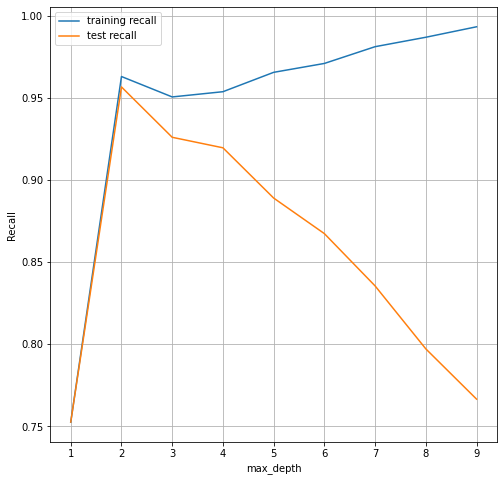

In [226]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

#### Tuning min_samples_leaf

In [227]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds, 
                   scoring="recall", n_jobs = -1,return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
0.9234770537318309
{'min_samples_leaf': 165}


In [228]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.445580      0.030098         0.006604        0.000238   
1       0.436245      0.027835         0.006320        0.000671   
2       0.432291      0.024308         0.005941        0.000196   
3       0.511704      0.147888         0.008400        0.003685   
4       0.732865      0.194111         0.009169        0.003544   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.636943   
1                     10  {'min_samples_leaf': 10}           0.770701   
2                     15  {'min_samples_leaf': 15}           0.834395   
3                     20  {'min_samples_leaf': 20}           0.821656   
4                     25  {'min_samples_leaf': 25}           0.885350   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.751592           0.668790           0.643312           0.673077   
1           0.815287           0.789809           0.764331           0.801282   
2           0.866242           0.783439           0.789809           0.820513   
3           0.885350           0.802548           0.821656           0.807692   
4           0.904459           0.821656           0.783439           0.858974   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.674743        0.040892               39            1.000000   
1         0.788282        0.018886               38            1.000000   
2         0.818880        0.030291               37            0.998405   
3         0.827780        0.029764               36            0.977671   
4         0.850776        0.043650               35            0.984051   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            0.996810            0.992026            0.993620   
3            0.979266            0.976077            0.984051   
4            0.980861            0.985646            0.972887   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.998408          0.999682         0.000637  
2            0.992038          0.994580         0.002589  
3            0.976115          0.978636         0.002952  
4            0.972930          0.979275         0.005422

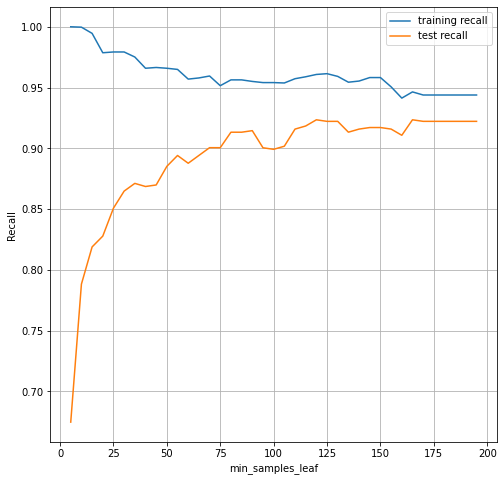

In [229]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize = (8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The above plot shows that the accuracy of the model rises as min samples leaf rises. From 0 to 115, there is a sharp rise, and then it kind of flattens out from there.

#### Tuning min_samples_split

In [230]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(300,450,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, return_train_score=True,
                    cv=n_folds, verbose=1,
                   scoring="recall",n_jobs=-1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.9004981218357015
{'min_samples_split': 435}


In [231]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.412501      0.024447         0.006231        0.000426   
1       0.409225      0.026757         0.006087        0.000492   
2       0.418010      0.022168         0.006095        0.000607   
3       0.412271      0.026168         0.005696        0.000073   
4       0.412439      0.039856         0.005753        0.000153   

  param_min_samples_split                      params  split0_test_score  \
0                     300  {'min_samples_split': 300}           0.898089   
1                     305  {'min_samples_split': 305}           0.898089   
2                     310  {'min_samples_split': 310}           0.898089   
3                     315  {'min_samples_split': 315}           0.898089   
4                     320  {'min_samples_split': 320}           0.891720   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.910828           0.898089           0.898089           0.884615   
1           0.910828           0.898089           0.898089           0.884615   
2           0.910828           0.898089           0.898089           0.884615   
3           0.898089           0.898089           0.898089           0.884615   
4           0.898089           0.898089           0.885350           0.884615   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.897942        0.008291                4            0.974482   
1         0.897942        0.008291                4            0.974482   
2         0.897942        0.008291                4            0.974482   
3         0.895394        0.005390               16            0.974482   
4         0.891573        0.005866               30            0.968102   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.963317            0.969697            0.968102   
1            0.961722            0.969697            0.968102   
2            0.961722            0.969697            0.968102   
3            0.950558            0.969697            0.968102   
4            0.936204            0.969697            0.956938   

   split4_train_score  mean_train_score  std_train_score  
0            0.960191          0.967158         0.004985  
1            0.960191          0.966839         0.005264  
2            0.960191          0.966839         0.005264  
3            0.960191          0.964606         0.008396  
4            0.960191          0.958226         0.011997

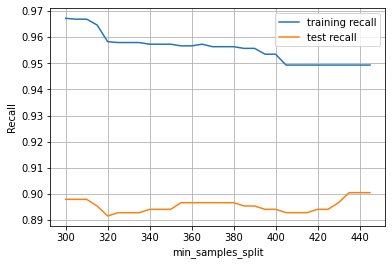

In [232]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


The test accuracy of the model increases as the min_samples_split increases.

#### Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [233]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3,10, 2),
    'min_samples_leaf': range(100, 125, 5),
    'min_samples_split': range(380,400,5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 10, 2),
                         'min_samples_leaf': range(100, 125, 5),
                         'min_samples_split': range(380, 400, 5)},
             verbose=1)

In [234]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.893942782726039
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 100, 'min_samples_split': 380}


In [235]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.223520      0.015337         0.005470        0.002183   
1         0.213195      0.002836         0.004183        0.000150   
2         0.212662      0.002689         0.004449        0.000589   
3         0.212340      0.002693         0.004405        0.000310   
4         0.234934      0.020623         0.006050        0.003110   
5         0.258200      0.008487         0.005750        0.002804   
6         0.283318      0.087233         0.004459        0.000336   
7         0.210728      0.002521         0.005343        0.002584   
8         0.211296      0.002381         0.004033        0.000036   
9         0.217289      0.005872         0.004116        0.000127   
10        0.211090      0.002656         0.003977        0.000046   
11        0.217208      0.006196         0.004046        0.000171   
12        0.210778      0.001391         0.003869        0.000093   
13        0.213325      0.002894         0.004061        0.000071   
14        0.210387      0.001093         0.003999        0.000042   
15        0.214707      0.001720         0.004039        0.000040   
16        0.211512      0.002011         0.004086        0.000086   
17        0.210490      0.001777         0.003975        0.000143   
18        0.210255      0.002146         0.006470        0.004911   
19        0.211619      0.002691         0.004504        0.000618   
20        0.310322      0.006541         0.004165        0.000118   
21        0.315152      0.006669         0.004167        0.000112   
22        0.323461      0.016524         0.005874        0.003220   
23        0.389544      0.056576         0.006370        0.003978   
24        0.324910      0.024813         0.004272        0.000231   
25        0.318462      0.012409         0.004223        0.000162   
26        0.311323      0.006237         0.004080        0.000159   
27        0.309437      0.006961         0.004149        0.000135   
28        0.312071      0.012081         0.004127        0.000043   
29        0.307763      0.007281         0.004114        0.000055   
30        0.361589      0.085000         0.005690        0.002966   
31        0.493828      0.116204         0.005767        0.002850   
32        0.308567      0.007336         0.004222        0.000159   
33        0.320816      0.018447         0.004246        0.000300   
34        0.309856      0.008137         0.004229        0.000152   
35        0.354374      0.035642         0.004245        0.000275   
36        0.378088      0.092972         0.005697        0.003143   
37        0.311663      0.005724         0.004100        0.000098   
38        0.308318      0.007756         0.004211        0.000153   
39        0.311965      0.011335         0.004167        0.000236   
40        0.345214      0.012549         0.004108        0.000072   
41        0.346100      0.013811         0.004102        0.000079   
42        0.349352      0.012930         0.004249        0.000214   
43        0.344667      0.014071         0.004025        0.000089   
44        0.343007      0.007338         0.004404        0.000364   
45        0.364432      0.011713         0.004363        0.000135   
46        0.343763      0.007273         0.004152        0.000058   
47        0.371683      0.030091         0.004294        0.000144   
48        0.454652      0.070666         0.004588        0.000769   
49        0.350849      0.011790         0.004181        0.000073   
50        0.339069      0.008678         0.004092        0.000068   
51        0.338809      0.004384         0.004081        0.000053   
52        0.343333      0.011947         0.004041        0.000049   
53        0.339924      0.006562         0.004283        0.000071   
54        0.342956      0.008431         0.004203        0.000118   
55        0.336898      0.005836         0.004538        0.000732   
56        0.341034      0.007928         0.004188        0.000058   
57 

#### Running the model with best parameters obtained from grid search.



In [236]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'], class_weight='balanced')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=100, min_samples_split=380,
                       random_state=100)

In [237]:
# accuracy score
clf_gini.score(X_train,y_train)


0.9012849275953498


The accuracy of the Decision Tree model on the train dataset is around 82%, which is really good for a model to be classified as a good model.

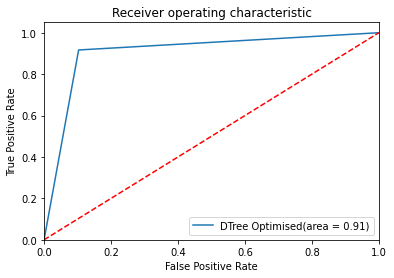

Area under curve is: 0.91
Recall for our model is: 0.92
Accuracy on test set is: 0.9
Confusion matrix for our model is: [[5352  616]
 [  28  308]]


In [238]:
# classification metrics

y_pred = clf_gini.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='DTree Optimised(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred))

In [239]:
# accuracy score on training set

y_train_pred = clf_gini.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.9


In [240]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      5968
           1       0.33      0.92      0.49       336

    accuracy                           0.90      6304
   macro avg       0.66      0.91      0.72      6304
weighted avg       0.96      0.90      0.92      6304



In [241]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5352  616]
 [  28  308]]


In [242]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.9
The sensitivity is: 0.92


INFERENCE

- The Decision Tree model's accuracy on the TEST dataset is 83% and on the train set is 82%, which is respectable.
- The RECALL score is roughly 80% for both Churns and Non-Churns.
- 81% of specificity was attained. - The sensitivity found is 84%
We can infer from the metrics above that the above is a good one.

#### MODEL 2 - Random Forest


In [243]:
high_rf = high_df.copy()


In [244]:
# Putting response variable to y
y = high_rf.pop('churn')

# Putting feature variables to X
X = high_rf

In [245]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (21013, 72)
Size of response variable dataset is: (21013,)


In [246]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

id    arpu_6   arpu_7  roam_ic_mou_6  roam_ic_mou_7  \
40575  40575.0   319.652  303.370          82.59           25.8   
2066    3500.4   627.839  291.148           0.00            0.0   
26125  26125.0   504.770  300.811           0.00            0.0   
28847  28847.0   444.571  425.312           0.00            0.0   
47182  47182.0  1051.351  439.122           0.00            0.0   

       roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
40575          76.46          13.36             65.44            103.91   
2066            0.00           0.00             33.13             22.54   
26125           0.00           0.00             99.73             45.34   
28847           0.00           0.00             10.53              4.23   
47182           0.00           0.00            171.51            142.71   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
40575           125.530            225.43              5.19              0.00   
2066             92.240             43.83              0.00              0.95   
26125           606.082            407.56             19.99              4.21   
28847             9.440             11.28              5.23              3.18   
47182             5.580             42.73              0.38              2.01   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
40575              0.34              0.63             18.66             23.66   
2066               0.00              4.53              0.00              0.00   
26125              0.00              0.00              0.00              0.00   
28847              8.94              6.86             72.14             92.49   
47182              0.00              0.00            253.93            137.28   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
40575              0.33              4.44               0.0               0.0   
2066               0.00              0.96               0.0               0.0   
26125              4.18              0.00               0.0               0.0   
28847            775.93            770.09               1.5               0.0   
47182            115.86             99.81               0.0               0.0   

       spl_og_mou_6  spl_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
40575          0.34         0.630             56.71           123.910   
2066           5.40         9.830             80.23           163.830   
26125          0.00         0.000             22.79            20.280   
28847         10.94        30.644              0.31             1.300   
47182          0.00         0.000            229.96           231.418   

       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
40575             89.63            127.01             8.610              1.39   
2066             241.88            251.38            73.188             74.25   
26125            233.78            208.01            42.240              4.54   
28847              3.26              3.99             0.000              8.55   
47182              9.09             19.36             0.000              2.43   

       std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
40575             0.810              1.76              1.51              4.49   
2066              0.000              0.00              1.96              6.95   
26125             0.000              0.00              0.75              2.35   
28847             1.080              3.63              0.00              0.95   
47182            57.992             27.31             11.11              6.61   

       std_ic_t2f_mou_6  std_ic_t2f_mou_7  isd_ic_mou_6  isd_ic_mou_7  \
40575              0.00              0.00           0.0          0.00   
2066              11.18             11.73           0.0          0.00   
26125              1.54              0.40           0.0          

#### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.



In [247]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

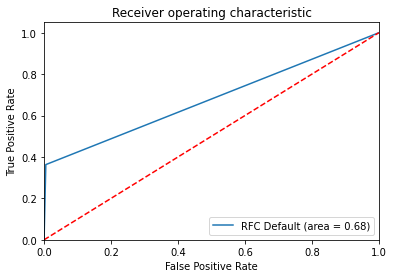

Area under curve is: 0.68
Recall for our model is: 0.36
Accuracy on test set is: 0.96
Confusion matrix for our model is: [[5937   31]
 [ 214  122]]


In [248]:
# Making Predictions
y_pred_default = rfc.predict(X_test)


logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default )
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default )
plt.figure()
plt.plot(fpr, tpr, label='RFC Default (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

In [249]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5968
           1       0.80      0.36      0.50       336

    accuracy                           0.96      6304
   macro avg       0.88      0.68      0.74      6304
weighted avg       0.96      0.96      0.95      6304



In [250]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_default)
print(cm)

[[5937   31]
 [ 214  122]]


In [251]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.99
The sensitivity is: 0.36


In [252]:
print(accuracy_score(y_test,y_pred_default))


0.9611357868020305


#### Hyperparameter Tuning

The results of default tree are poor, and we need to improve it by tuning the hyperparameters.

##### Tuning max_depth



In [253]:
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 1)}

# number of folds
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,cv=n_folds, n_jobs=-1,
                   scoring="recall",verbose = 1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
0.8660133921280417
{'max_depth': 4}


In [254]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.168074      0.024359         0.041555        0.003105   
1       1.843721      0.330615         0.066741        0.029635   
2       1.889082      0.009354         0.043560        0.001096   
3       2.440018      0.168099         0.045443        0.000848   
4       2.641198      0.089962         0.048652        0.001333   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.859873           0.866242   
1               3  {'max_depth': 3}           0.872611           0.898089   
2               4  {'max_depth': 4}           0.898089           0.923567   
3               5  {'max_depth': 5}           0.872611           0.891720   
4               6  {'max_depth': 6}           0.872611           0.878981   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.764331           0.821656           0.769231         0.816267   
1           0.777070           0.840764           0.820513         0.841810   
2           0.821656           0.866242           0.820513         0.866013   
3           0.815287           0.866242           0.833333         0.855839   
4           0.777070           0.808917           0.788462         0.825208   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.043215                5            0.837321            0.830941   
1        0.041862                3            0.877193            0.866029   
2        0.040937                1            0.937799            0.909091   
3        0.027669                2            0.933014            0.926635   
4        0.042595                4            0.950558            0.952153   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.838915            0.840510            0.845541   
1            0.878788            0.867624            0.878981   
2            0.917065            0.897927            0.891720   
3            0.936204            0.921850            0.926752   
4            0.945774            0.948963            0.958599   

   mean_train_score  std_train_score  
0          0.838646         0.004737  
1          0.873723         0.005688  
2          0.910720         0.016130  
3          0.928891         0.005094  
4          0.951209         0.004255

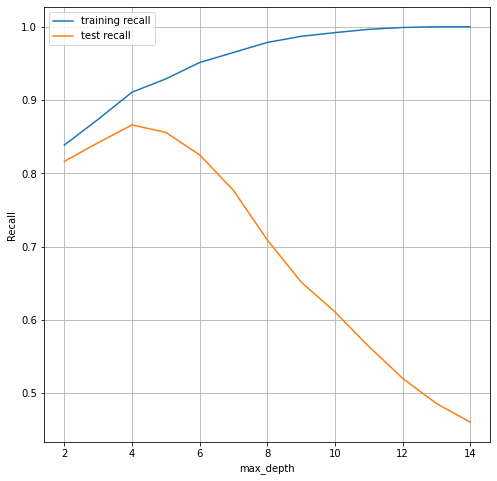

In [255]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()

The test score begins to decline after a certain point when the value of max depth is increased, but the train score continues to rise. The ensemble tries to overfit when we increase the maximum depth. The model performs best when the maximum depth is 5, and accuracy on the test dataset declines as depth increases.

##### Tuning n_estimators

Let's try to get the ideal values for n estimators and learn how n estimators' value affects overall accuracy. To prevent the trees from overfitting, we will set max depth to a suitable low value.

In [256]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [10,25,50,75,100]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state = 100,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose=1,scoring="recall",return_train_score = True, 
                  n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.36729544341009307
{'n_estimators': 25}


In [257]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.393583      0.015669         0.012583        0.000976   
1       0.922466      0.010461         0.020502        0.000604   
2       1.837119      0.090723         0.040922        0.014478   
3       2.742556      0.131527         0.048446        0.000980   
4       3.674802      0.286227         0.060633        0.004827   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.350318   
1                 25   {'n_estimators': 25}           0.414013   
2                 50   {'n_estimators': 50}           0.388535   
3                 75   {'n_estimators': 75}           0.401274   
4                100  {'n_estimators': 100}           0.382166   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.375796           0.318471           0.299363           0.314103   
1           0.420382           0.363057           0.312102           0.326923   
2           0.407643           0.292994           0.312102           0.314103   
3           0.420382           0.324841           0.305732           0.320513   
4           0.414013           0.331210           0.305732           0.294872   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.331610        0.027646                5            0.921850   
1         0.367295        0.044034                1            0.982456   
2         0.343075        0.045919                4            0.998405   
3         0.354548        0.046779                2            1.000000   
4         0.345599        0.045579                3            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.928230            0.918660            0.947368   
1            0.995215            0.990431            0.996810   
2            0.998405            0.998405            0.998405   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.926752          0.928572         0.010002  
1            0.990446          0.991072         0.005003  
2            1.000000          0.998724         0.000638  
3            1.000000          1.000000         0.000000  
4            1.000000          1.000000         0.000000

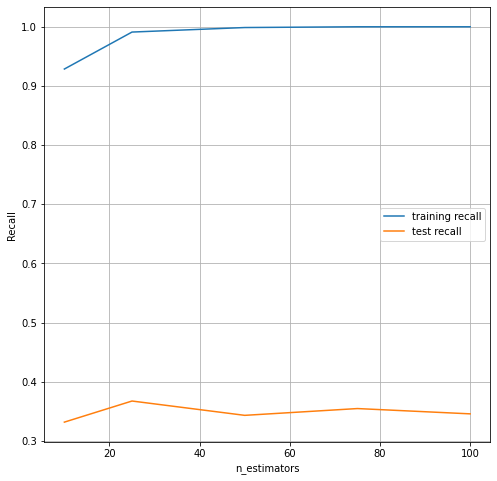

In [258]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


##### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [259]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_split": range(100,200,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 200, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [260]:
print(rf.best_score_)
print(rf.best_params_)

0.9056233121776686
{'min_samples_split': 180}


In [261]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.844273      0.154416         0.075255        0.002865   
1       2.554810      0.038116         0.075968        0.004616   
2       2.660694      0.181818         0.076994        0.002696   
3       2.612588      0.129255         0.072565        0.002762   
4       2.525502      0.062204         0.073697        0.003131   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.915709   
1                     110  {'min_samples_split': 110}           0.923372   
2                     120  {'min_samples_split': 120}           0.911877   
3                     130  {'min_samples_split': 130}           0.931034   
4                     140  {'min_samples_split': 140}           0.934866   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.827586           0.832061         0.858452        0.040528   
1           0.862069           0.828244         0.871228        0.039372   
2           0.869732           0.832061         0.871223        0.032602   
3           0.873563           0.843511         0.882703        0.036311   
4           0.881226           0.862595         0.892896        0.030636   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            0.967495            0.969407   
1                8            0.965583            0.969407   
2                9            0.967495            0.961759   
3                7            0.965583            0.967495   
4                4            0.963671            0.967495   

   split2_train_score  mean_train_score  std_train_score  
0            0.965517          0.967473         0.001588  
1            0.963602          0.966197         0.002410  
2            0.965517          0.964924         0.002379  
3            0.967433          0.966837         0.000887  
4            0.963602          0.964923         0.001819

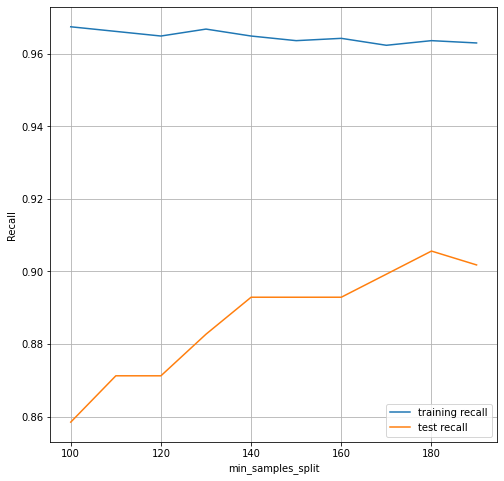

In [262]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

#### Tuning min_samples_leaf



In [263]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_leaf": range(1,200,20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 200, 20)},
             return_train_score=True, scoring='recall', verbose=1)

In [264]:
print(rf.best_score_)
print(rf.best_params_)

0.8559367474871555
{'min_samples_leaf': 61}


In [265]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.886311      0.042038         0.090232        0.004835   
1       2.822837      0.184738         0.083401        0.006242   
2       2.984625      0.267610         0.077248        0.002862   
3       2.403159      0.015896         0.071678        0.002459   
4       2.489918      0.105103         0.070191        0.001883   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}           0.379310   
1                     21  {'min_samples_leaf': 21}           0.873563   
2                     41  {'min_samples_leaf': 41}           0.892720   
3                     61  {'min_samples_leaf': 61}           0.923372   
4                     81  {'min_samples_leaf': 81}           0.858238   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.363985           0.290076         0.344457        0.038959   
1           0.816092           0.782443         0.824033        0.037621   
2           0.835249           0.816794         0.848254        0.032332   
3           0.842912           0.801527         0.855937        0.050588   
4           0.816092           0.820611         0.831647        0.018893   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            1.000000            1.000000   
1                9            0.971319            0.963671   
2                2            0.965583            0.965583   
3                1            0.961759            0.959847   
4                7            0.925430            0.933078   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.969349          0.968113         0.003242  
2            0.965517          0.965561         0.000031  
3            0.950192          0.957266         0.005063  
4            0.948276          0.935595         0.009495

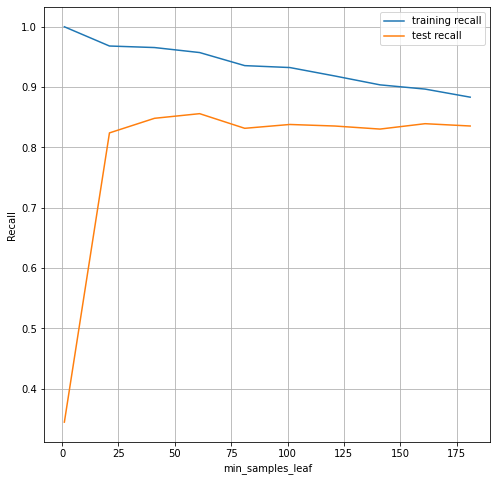

In [266]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The above plot shows that recall of the model rises as min samples leaf rises. Between 0 and 25, there is a sharp increase seen. By the time min_samples_leaf = 125, the curve becomes flat. So, let's decide that this is the ideal minimal sample size.

##### Tuning max_features

Let's look at how the model performs as a function of max features, the maximum number of features that a node will split.

In [267]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [25,50,75]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight = 'balanced',random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs  = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=100),
             n_jobs=-1, param_grid={'max_features': [25, 50, 75]},
             return_train_score=True, scoring='recall', verbose=1)

In [268]:
print(rf.best_score_)
print(rf.best_params_)

0.9158111783802755
{'max_features': 25}


In [269]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.297071      0.142231         0.060202        0.003543   
1       7.949845      0.374860         0.049712        0.004776   
2       0.075752      0.007145         0.000000        0.000000   

  param_max_features                params  split0_test_score  \
0                 25  {'max_features': 25}           0.934866   
1                 50  {'max_features': 50}           0.919540   
2                 75  {'max_features': 75}                NaN   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.892720           0.919847         0.915811        0.017441   
1           0.888889           0.916031         0.908153        0.013697   
2                NaN                NaN              NaN             NaN   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.944551            0.942639   
1                2            0.946463            0.948375   
2                3                 NaN                 NaN   

   split2_train_score  mean_train_score  std_train_score  
0            0.944444          0.943878         0.000877  
1            0.942529          0.945789         0.002434  
2                 NaN               NaN              NaN

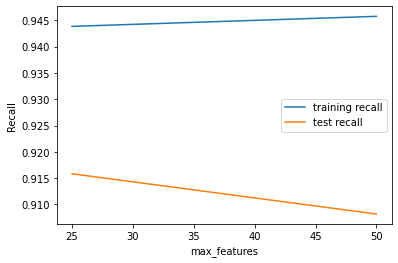

In [270]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

##### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.



In [271]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,8,10],
    'min_samples_split': [170,190,200], 'min_samples_leaf': [120,130,140] }

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9012169420082943
{'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 170}


In [272]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.9012169420082943 using {'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 170}


#### Fitting the final model with the best parameters obtained from grid search.



In [273]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')


In [274]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=170, random_state=100)

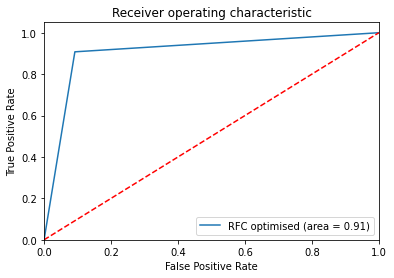

Area under curve is: 0.91
Recall for our model is: 0.91
Accuracy on test set is: 0.91
Confusion matrix for our model is: [[5419  549]
 [  31  305]]


In [275]:
# predict
predictions = rfc.predict(X_test)

# Plotting ROC
logit_roc_auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, predictions),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, predictions),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, predictions),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, predictions))

In [276]:
# accuracy score on training set

y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.9


In [277]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5968
           1       0.36      0.91      0.51       336

    accuracy                           0.91      6304
   macro avg       0.68      0.91      0.73      6304
weighted avg       0.96      0.91      0.93      6304



In [278]:


# confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[5419  549]
 [  31  305]]


In [279]:
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.9080093833780161
The sensitivity is: 0.9077380952380952


INFERENCE

- The accuracy of the Random Forest Tree model is 85% on the TEST dataset and 82% on the training dataset, which is respectable for a model.
- Churn scores 78% on the RECALL scale while Non-Churns score around 91%.
- 91% specificity was attained. - The sensitivity found is 78%
We can infer from the numbers above that the aforementioned model performs well.

### 6. Summary:

Because it is more crucial to identify the customers who are most likely to churn than it is to predict accuracy, recall has been selected as the performance indicator in our case study.



In [280]:
features = clf_gini.feature_importances_
cols = X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns
cols

Index(['loc_og_t2t_mou_6', 'loc_ic_t2m_mou_6', 'roam_og_mou_6', 'arpu_7',
       'loc_ic_t2f_mou_7', 'loc_og_t2t_mou_7', '3g_vbc_6', 'total_amt_7',
       'roam_og_mou_7', 'churn_probability'],
      dtype='object')

1. Customers in the telecom sector have access to a variety of service providers and can actively switch from one operator to another. The telecoms business has an average annual churn rate of 15 to 25 percent in this fiercely competitive market.
2. Customer retention is now even more crucial than acquiring new customers because it costs 5–10 times more to do so than to keep an existing customer.
3. We have identified customers who are more likely to churn and the variables that affect high churn in order to manage high value customer churn.
4. From the exploratory analysis, we found that in the Seventht month, which is the action phase, there is a significant decrease in recharge, call usage, and data usage. This is once more clear from the list of critical predictors affecting churn as follows:
   - 'loc_og_t2t_mou_6',
   - 'loc_ic_t2m_mou_6',
   - 'roam_og_mou_6', 
   - 'arpu_7',
   - 'loc_ic_t2f_mou_7', 
   - 'loc_og_t2t_mou_7', 
   - '3g_vbc_6', 
   - 'total_amt_7',
   - 'roam_og_mou_7', 
   - 'churn_probability'
5. STD and local The features that have the biggest effects on customer churn are minutes of usage (both incoming and outgoing).
6. Outgoing roaming calls made by clients in the 7th month also play key role in indicating churn.

In [281]:
X_test.head()

id   arpu_6   arpu_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
61007  61007.0  426.731  548.525           0.00          0.000           0.00   
36019  36019.0  308.036  493.384           0.00         56.458           0.00   
39186  39186.0  328.534  426.890           0.00          0.000           0.00   
41771  41771.0  642.845  408.480          19.59          5.610          29.51   
51833  51833.0  973.091  993.426           0.00          0.000           0.00   

       roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
61007          0.000              7.09            122.16            144.73   
36019        109.174              0.66              0.00              7.36   
39186          0.000            108.03             86.88             81.41   
41771          9.910             28.44             62.56             83.08   
51833          0.000             14.49             18.63             22.59   

       loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  \
61007            152.64              4.63             21.35              0.00   
36019              7.88              0.78              0.48              0.00   
39186             94.29              8.51              3.01              0.00   
41771             45.89              7.01              5.09              2.29   
51833             37.86              0.00              0.00              0.00   

       loc_og_t2c_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
61007              0.00              0.00              0.00             0.000   
36019              0.00              6.68              0.00           273.330   
39186              0.00              3.65              0.00            32.280   
41771              9.51             37.64             25.44             9.410   
51833              1.45             17.96             59.49           952.408   

       std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  spl_og_mou_6  \
61007            53.240             0.000              0.00          0.00   
36019            94.860             0.000              0.00          0.00   
39186            10.640             0.000              0.00          0.00   
41771             0.000             6.618              6.28          5.03   
51833           992.424             0.000              0.00          0.85   

       spl_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
61007          0.00             42.89           170.140             89.84   
36019          0.66              1.11             0.000              5.16   
39186          0.00            229.96           231.418            302.23   
41771          9.51             47.54            53.760             38.58   
51833          2.70              5.71             3.460             49.33   

       loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  std_ic_t2t_mou_6  \
61007            131.31              0.00              0.90              0.00   
36019              1.13              0.00              0.00              0.00   
39186            299.61             11.99             11.48              0.06   
41771             34.46              0.00              0.40             21.71   
51833             47.11              0.00              0.00              0.01   

       std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
61007              0.00              0.00              1.23              0.00   
36019              0.00              8.24              6.83              6.59   
39186              1.08              9.53             13.24              0.00   
41771              8.38              6.06              0.00              0.00   
51833              0.08             29.58             48.14              0.00   

       std_ic_t2f_mou_7  isd_ic_mou_6  isd_ic_mou_7  total_rech_num_6  \
61007               0.0        41.068         45.76               3.0   
36019               0.0         0.00

In [282]:
final_test_data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c43/test.csv")
final_test_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [283]:
# Converting the date columns to date time-dataframe

date_column= [column for column in final_test_data.columns if 'date' in column]

for i in final_test_data[date_column]:
    final_test_data[i] = pd.to_datetime(final_test_data[i])